In [357]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

from catboost import CatBoostClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [358]:
def import_data_set(file_name:str):
    return pd.read_csv(file_name)

In [359]:
def fill_data_with_0(data:pd.DataFrame()):
    return data.fillna(0)

In [360]:
def split_data_into_X_and_y(train_data:pd.DataFrame(),label:str):
    X = train_data.drop(label,axis=1)
    y = train_data[label]
    return X,y

In [361]:
# li = []
# li_test = []

# descriptors = import_data_set("train_data.csv")
# descriptors_test = import_data_set("test_data.csv")

train_data = import_data_set("train_data.csv")
test_data = import_data_set("test_data.csv")

# li.append(descriptors)
# li_test.append(descriptors_test)

# fingerprints = pd.read_csv("./Morgan_fingerprints.csv")
# fingerprints_test = pd.read_csv("./Morgan_fingerprints_test.csv")

# li.append(fingerprints)
# li_test.append(fingerprints_test)

# train_data = pd.concat([descriptors, fingerprints], axis=1)
# test_data = pd.concat([descriptors_test, fingerprints_test], axis=1)

In [342]:
# null_counts = train_data.isnull().sum()
# # Filter for columns with non-zero null counts
# null_cols = null_counts[null_counts > 0]
# print(null_cols)

MaxPartialCharge        420
MinPartialCharge        420
MaxAbsPartialCharge     420
MinAbsPartialCharge     420
BCUT2D_MWHI            3819
BCUT2D_MWLOW           3819
BCUT2D_CHGHI           3819
BCUT2D_CHGLO           3819
BCUT2D_LOGPHI          3819
BCUT2D_LOGPLOW         3819
BCUT2D_MRHI            3819
BCUT2D_MRLOW           3819
dtype: int64


In [249]:
train_data

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,label,Assay_id
0,9.316200,-1.533785,9.316200,0.150485,0.794714,317.599,306.511,315.982463,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1644
1,10.532611,0.333788,10.532611,0.333788,0.516641,156.269,136.109,156.151415,66.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2,2451
2,2.433032,0.000000,2.433032,0.000000,0.251327,362.086,313.702,361.347528,148.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2,1384
3,10.355080,-0.613825,10.355080,0.282361,0.487998,255.665,245.585,255.052302,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,16
4,0.000000,0.000000,0.000000,0.000000,0.237972,149.894,149.894,149.894242,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75378,11.460021,-3.868472,11.460021,0.053611,0.712426,230.245,220.165,230.036128,82.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,33
75379,5.928972,-2.841623,5.928972,0.082346,0.720533,313.747,296.611,313.041677,104.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1632
75380,4.975926,0.848333,4.975926,0.848333,0.596343,167.258,162.218,166.986341,50.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1373
75381,10.241948,0.324028,10.241948,0.324028,0.519485,128.215,112.087,128.120115,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2


In [250]:
test_data

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Assay_id
0,9.626968,0.025579,9.626968,0.025579,0.624614,164.248,148.120,164.120115,66.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1682
1,12.473362,-4.605249,12.473362,0.061165,0.617511,431.452,414.316,431.056940,152.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1656
2,14.627193,-4.140552,14.627193,0.064351,0.224134,696.264,655.944,695.250845,254.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
3,10.420833,-3.973958,10.420833,0.000000,0.393203,201.244,197.212,200.949810,56.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1850
4,12.865865,-0.601027,12.865865,0.094949,0.639062,418.574,380.270,418.271924,168.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,12.851673,-4.443395,12.851673,0.048352,0.391778,408.376,389.224,408.129692,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38
10990,11.617073,-0.992448,11.617073,0.147894,0.635519,320.344,304.216,320.104859,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
10991,12.406479,-4.356493,12.406479,0.049357,0.705120,381.370,366.250,381.074304,138.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1640
10992,11.026605,-3.480301,11.026605,0.167292,0.540194,220.976,213.920,219.945901,66.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28


In [362]:
# Filling data with null values
train_data = fill_data_with_0(train_data)
test_data = fill_data_with_0(test_data)

In [377]:
# from sklearn.feature_selection import VarianceThreshold

# train_data = train_data[["MaxEStateIndex", "MinEStateIndex", "MaxAbsEStateIndex", 
#                                    "MinAbsEStateIndex", "qed", "NumRadicalElectrons", "MaxPartialCharge",
# "MinPartialCharge", "MaxAbsPartialCharge", "MinAbsPartialCharge", 
# "FpDensityMorgan3", "BalabanJ", "Chi0", "Chi0n", "Chi0v", "Chi1", "Chi1n", "Chi1v", "Chi2n", "Chi2v", "Chi3n", "Chi3v", 
# "Chi4n", "Chi4v", "HallKierAlpha", "PEOE_VSA12", "PEOE_VSA13", "PEOE_VSA2", "SMR_VSA2", 
# "NHOHCount", "NOCount", "NumAliphaticCarbocycles", "SlogP_VSA7", "SlogP_VSA9", 
# "NumAliphaticHeterocycles", "NumAliphaticRings", "NumAromaticCarbocycles", "NumAromaticHeterocycles", 
# "NumAromaticRings", "NumHAcceptors", "NumHDonors", "NumHeteroatoms", "NumRotatableBonds",
# "NumSaturatedCarbocycles", "NumSaturatedHeterocycles", "NumSaturatedRings", "RingCount", "MolLogP", "fr_Al_COO",
# "fr_Al_OH", "fr_Al_OH_noTert", "fr_ArN", "fr_Ar_COO", "fr_Ar_N", "fr_Ar_NH", "fr_Ar_OH", "fr_COO", "fr_COO2", 
# "fr_C_O", "fr_C_O_noCOO", "fr_C_S", "fr_HOCCN", "fr_Imine", "fr_NH0", "fr_NH1", "fr_NH2", "fr_N_O", 
# "fr_Ndealkylation1", "fr_Ndealkylation2", "fr_Nhpyrrole", "fr_SH", "fr_aldehyde", "fr_alkyl_carbamate", 
# "fr_alkyl_halide", "fr_allylic_oxid", "fr_amide", "fr_amidine", "fr_aniline", "fr_aryl_methyl",
# "fr_azide", "fr_azo", "fr_barbitur", "fr_benzene", "fr_benzodiazepine", "fr_bicyclic", "fr_diazo", 
# "fr_dihydropyridine", "fr_epoxide", "fr_ester", "fr_ether", "fr_furan", "fr_guanido", "fr_halogen", "fr_hdrzine", 
# "fr_hdrzone", "fr_imidazole", "fr_imide", "fr_isocyan", "fr_isothiocyan", "fr_ketone", "fr_ketone_Topliss", 
# "fr_lactam", "fr_lactone", "fr_methoxy", "fr_morpholine", "fr_nitrile", "fr_nitro", "fr_nitro_arom", 
# "fr_nitro_arom_nonortho", "fr_nitroso", "fr_oxazole", "fr_oxime", "fr_para_hydroxylation", "fr_phenol", 
# "fr_phenol_noOrthoHbond", "fr_phos_acid", "fr_phos_ester", "fr_piperdine", "fr_piperzine",
# "fr_priamide", "fr_prisulfonamd", "fr_pyridine", "fr_quatN", "fr_sulfide", "fr_sulfonamd", "fr_sulfone", 
# "fr_term_acetylene","fr_tetrazole", "fr_thiazole", "fr_thiocyan", "fr_thiophene", "fr_unbrch_alkane", "fr_urea",
# "Assay_id","label"]]
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=25)

df = v_threshold.fit_transform(train_data)

In [378]:
selected_columns = train_data.columns[v_threshold.get_support()]
df_subset = train_data[selected_columns]

df_subset_test = test_data[selected_columns]

In [379]:
len(selected_columns)

202

In [366]:
df_subset["label"] = train_data["label"]
df_subset["Assay_id"] = train_data["Assay_id"]
df_subset_test["Assay_id"] = df_subset_test["Assay_id"]


# # df_subset.fillna(df_subset.mean(), inplace=True)
# # df_subset_test.fillna(df_subset_test.mean(), inplace=True)

/var/folders/cm/7kqvpmg9373g7w5z2d9hl5w80000gn/T/ipykernel_22945/2785201887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["label"] = train_data["label"]
/var/folders/cm/7kqvpmg9373g7w5z2d9hl5w80000gn/T/ipykernel_22945/2785201887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Assay_id"] = train_data["Assay_id"]
/var/folders/cm/7kqvpmg9373g7w5z2d9hl5w80000gn/T/ipykernel_22945/2785201887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [367]:
# Divide data into X and y for training 
# X , y = split_data_into_X_and_y(train_data, "label")
X , y = split_data_into_X_and_y(df_subset, "label")


# X , y = split_data_into_X_and_y(df_subset, "label")

In [368]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

In [369]:
import xgboost as xgb 
# model = xgb.XGBClassifier(random_state=42,n_estimators=700,eta=0.35)
model = CatBoostClassifier(iterations=27000, learning_rate=0.1, depth=6, l2_leaf_reg=3, loss_function='Logloss',random_seed=60)
# model = CatBoostClassifier(iterations=27000, learning_rate=0.1, depth=6, l2_leaf_reg=2, loss_function='Logloss', random_seed=60)

# ,eta=0.35

In [327]:
# bag_clf = BaggingClassifier(base_estimator=model, n_estimators=100, random_state=42)


In [370]:
model.fit(X,y)

0:	learn: 0.6224683	total: 39.8ms	remaining: 17m 54s
1:	learn: 0.5684218	total: 59.2ms	remaining: 13m 18s
2:	learn: 0.5297108	total: 77.4ms	remaining: 11m 36s
3:	learn: 0.4982098	total: 95.3ms	remaining: 10m 43s
4:	learn: 0.4684013	total: 114ms	remaining: 10m 17s
5:	learn: 0.4463444	total: 133ms	remaining: 9m 59s
6:	learn: 0.4279118	total: 156ms	remaining: 10m 2s
7:	learn: 0.4148546	total: 176ms	remaining: 9m 53s
8:	learn: 0.4027652	total: 196ms	remaining: 9m 47s
9:	learn: 0.3935177	total: 215ms	remaining: 9m 40s
10:	learn: 0.3843041	total: 239ms	remaining: 9m 46s
11:	learn: 0.3776041	total: 260ms	remaining: 9m 44s
12:	learn: 0.3705498	total: 289ms	remaining: 9m 58s
13:	learn: 0.3672829	total: 308ms	remaining: 9m 53s
14:	learn: 0.3625801	total: 333ms	remaining: 9m 59s
15:	learn: 0.3599278	total: 363ms	remaining: 10m 11s
16:	learn: 0.3563210	total: 409ms	remaining: 10m 49s
17:	learn: 0.3530123	total: 431ms	remaining: 10m 46s
18:	learn: 0.3514757	total: 456ms	remaining: 10m 48s
19:	learn

162:	learn: 0.2745618	total: 3.63s	remaining: 9m 58s
163:	learn: 0.2743749	total: 3.66s	remaining: 9m 58s
164:	learn: 0.2742124	total: 3.68s	remaining: 9m 58s
165:	learn: 0.2734933	total: 3.7s	remaining: 9m 58s
166:	learn: 0.2732340	total: 3.72s	remaining: 9m 58s
167:	learn: 0.2729082	total: 3.75s	remaining: 9m 58s
168:	learn: 0.2719450	total: 3.77s	remaining: 9m 58s
169:	learn: 0.2713718	total: 3.8s	remaining: 9m 59s
170:	learn: 0.2708723	total: 3.82s	remaining: 10m
171:	learn: 0.2704688	total: 3.84s	remaining: 9m 59s
172:	learn: 0.2702365	total: 3.86s	remaining: 9m 58s
173:	learn: 0.2700978	total: 3.88s	remaining: 9m 58s
174:	learn: 0.2699277	total: 3.9s	remaining: 9m 58s
175:	learn: 0.2697403	total: 3.92s	remaining: 9m 58s
176:	learn: 0.2693177	total: 3.95s	remaining: 9m 58s
177:	learn: 0.2690615	total: 3.97s	remaining: 9m 58s
178:	learn: 0.2683184	total: 3.99s	remaining: 9m 58s
179:	learn: 0.2677489	total: 4.02s	remaining: 9m 58s
180:	learn: 0.2675771	total: 4.04s	remaining: 9m 58s

324:	learn: 0.2383940	total: 7.25s	remaining: 9m 54s
325:	learn: 0.2382687	total: 7.27s	remaining: 9m 54s
326:	learn: 0.2381456	total: 7.29s	remaining: 9m 54s
327:	learn: 0.2380317	total: 7.31s	remaining: 9m 54s
328:	learn: 0.2378501	total: 7.33s	remaining: 9m 54s
329:	learn: 0.2377491	total: 7.35s	remaining: 9m 54s
330:	learn: 0.2375813	total: 7.37s	remaining: 9m 54s
331:	learn: 0.2374208	total: 7.39s	remaining: 9m 53s
332:	learn: 0.2372845	total: 7.41s	remaining: 9m 53s
333:	learn: 0.2371329	total: 7.43s	remaining: 9m 53s
334:	learn: 0.2369502	total: 7.47s	remaining: 9m 54s
335:	learn: 0.2368362	total: 7.49s	remaining: 9m 54s
336:	learn: 0.2366499	total: 7.51s	remaining: 9m 54s
337:	learn: 0.2363567	total: 7.54s	remaining: 9m 54s
338:	learn: 0.2362094	total: 7.56s	remaining: 9m 54s
339:	learn: 0.2360903	total: 7.59s	remaining: 9m 55s
340:	learn: 0.2360037	total: 7.61s	remaining: 9m 55s
341:	learn: 0.2358877	total: 7.64s	remaining: 9m 55s
342:	learn: 0.2358022	total: 7.66s	remaining: 

485:	learn: 0.2180886	total: 11.4s	remaining: 10m 20s
486:	learn: 0.2180835	total: 11.4s	remaining: 10m 20s
487:	learn: 0.2180098	total: 11.4s	remaining: 10m 20s
488:	learn: 0.2179146	total: 11.4s	remaining: 10m 19s
489:	learn: 0.2177949	total: 11.5s	remaining: 10m 19s
490:	learn: 0.2176905	total: 11.5s	remaining: 10m 19s
491:	learn: 0.2175763	total: 11.5s	remaining: 10m 19s
492:	learn: 0.2174863	total: 11.5s	remaining: 10m 19s
493:	learn: 0.2173948	total: 11.5s	remaining: 10m 18s
494:	learn: 0.2173184	total: 11.6s	remaining: 10m 18s
495:	learn: 0.2172017	total: 11.6s	remaining: 10m 19s
496:	learn: 0.2171251	total: 11.6s	remaining: 10m 19s
497:	learn: 0.2170132	total: 11.6s	remaining: 10m 19s
498:	learn: 0.2167661	total: 11.7s	remaining: 10m 19s
499:	learn: 0.2166925	total: 11.7s	remaining: 10m 19s
500:	learn: 0.2165743	total: 11.7s	remaining: 10m 20s
501:	learn: 0.2164918	total: 11.7s	remaining: 10m 20s
502:	learn: 0.2163927	total: 11.8s	remaining: 10m 20s
503:	learn: 0.2162141	total:

642:	learn: 0.2040202	total: 14.8s	remaining: 10m 6s
643:	learn: 0.2039515	total: 14.8s	remaining: 10m 6s
644:	learn: 0.2038501	total: 14.8s	remaining: 10m 6s
645:	learn: 0.2038028	total: 14.9s	remaining: 10m 6s
646:	learn: 0.2037637	total: 14.9s	remaining: 10m 6s
647:	learn: 0.2036986	total: 14.9s	remaining: 10m 6s
648:	learn: 0.2036054	total: 14.9s	remaining: 10m 5s
649:	learn: 0.2035156	total: 14.9s	remaining: 10m 5s
650:	learn: 0.2034293	total: 15s	remaining: 10m 6s
651:	learn: 0.2033787	total: 15s	remaining: 10m 6s
652:	learn: 0.2032964	total: 15s	remaining: 10m 6s
653:	learn: 0.2031997	total: 15.1s	remaining: 10m 6s
654:	learn: 0.2031198	total: 15.1s	remaining: 10m 6s
655:	learn: 0.2030204	total: 15.1s	remaining: 10m 6s
656:	learn: 0.2029106	total: 15.1s	remaining: 10m 6s
657:	learn: 0.2028457	total: 15.1s	remaining: 10m 6s
658:	learn: 0.2027919	total: 15.2s	remaining: 10m 5s
659:	learn: 0.2026948	total: 15.2s	remaining: 10m 5s
660:	learn: 0.2025992	total: 15.2s	remaining: 10m 5s

797:	learn: 0.1925691	total: 18.5s	remaining: 10m 6s
798:	learn: 0.1925243	total: 18.5s	remaining: 10m 6s
799:	learn: 0.1924804	total: 18.5s	remaining: 10m 6s
800:	learn: 0.1921828	total: 18.5s	remaining: 10m 6s
801:	learn: 0.1921380	total: 18.6s	remaining: 10m 6s
802:	learn: 0.1920672	total: 18.6s	remaining: 10m 6s
803:	learn: 0.1919935	total: 18.6s	remaining: 10m 5s
804:	learn: 0.1919262	total: 18.6s	remaining: 10m 5s
805:	learn: 0.1918724	total: 18.6s	remaining: 10m 5s
806:	learn: 0.1918179	total: 18.7s	remaining: 10m 5s
807:	learn: 0.1917476	total: 18.7s	remaining: 10m 5s
808:	learn: 0.1916762	total: 18.7s	remaining: 10m 5s
809:	learn: 0.1916406	total: 18.7s	remaining: 10m 5s
810:	learn: 0.1915850	total: 18.7s	remaining: 10m 4s
811:	learn: 0.1915194	total: 18.8s	remaining: 10m 4s
812:	learn: 0.1914697	total: 18.8s	remaining: 10m 4s
813:	learn: 0.1914091	total: 18.8s	remaining: 10m 4s
814:	learn: 0.1913724	total: 18.8s	remaining: 10m 4s
815:	learn: 0.1912991	total: 18.8s	remaining: 

957:	learn: 0.1819439	total: 21.7s	remaining: 9m 48s
958:	learn: 0.1819064	total: 21.7s	remaining: 9m 48s
959:	learn: 0.1818559	total: 21.7s	remaining: 9m 48s
960:	learn: 0.1818132	total: 21.7s	remaining: 9m 48s
961:	learn: 0.1817800	total: 21.7s	remaining: 9m 48s
962:	learn: 0.1817800	total: 21.8s	remaining: 9m 48s
963:	learn: 0.1817155	total: 21.8s	remaining: 9m 48s
964:	learn: 0.1816552	total: 21.8s	remaining: 9m 48s
965:	learn: 0.1816542	total: 21.8s	remaining: 9m 47s
966:	learn: 0.1816017	total: 21.8s	remaining: 9m 47s
967:	learn: 0.1815373	total: 21.8s	remaining: 9m 47s
968:	learn: 0.1814964	total: 21.9s	remaining: 9m 47s
969:	learn: 0.1814551	total: 21.9s	remaining: 9m 47s
970:	learn: 0.1813752	total: 21.9s	remaining: 9m 47s
971:	learn: 0.1812895	total: 21.9s	remaining: 9m 47s
972:	learn: 0.1812432	total: 21.9s	remaining: 9m 47s
973:	learn: 0.1812264	total: 22s	remaining: 9m 46s
974:	learn: 0.1811514	total: 22s	remaining: 9m 46s
975:	learn: 0.1811135	total: 22s	remaining: 9m 46s

1116:	learn: 0.1736154	total: 24.8s	remaining: 9m 35s
1117:	learn: 0.1735527	total: 24.9s	remaining: 9m 35s
1118:	learn: 0.1735087	total: 24.9s	remaining: 9m 35s
1119:	learn: 0.1734446	total: 24.9s	remaining: 9m 35s
1120:	learn: 0.1733892	total: 24.9s	remaining: 9m 35s
1121:	learn: 0.1733530	total: 25s	remaining: 9m 35s
1122:	learn: 0.1733047	total: 25s	remaining: 9m 35s
1123:	learn: 0.1732609	total: 25s	remaining: 9m 35s
1124:	learn: 0.1731918	total: 25s	remaining: 9m 35s
1125:	learn: 0.1730871	total: 25s	remaining: 9m 35s
1126:	learn: 0.1730605	total: 25.1s	remaining: 9m 35s
1127:	learn: 0.1730162	total: 25.1s	remaining: 9m 35s
1128:	learn: 0.1729564	total: 25.1s	remaining: 9m 34s
1129:	learn: 0.1729212	total: 25.1s	remaining: 9m 34s
1130:	learn: 0.1728954	total: 25.1s	remaining: 9m 34s
1131:	learn: 0.1728491	total: 25.1s	remaining: 9m 34s
1132:	learn: 0.1728367	total: 25.2s	remaining: 9m 34s
1133:	learn: 0.1727827	total: 25.2s	remaining: 9m 34s
1134:	learn: 0.1726174	total: 25.2s	re

1273:	learn: 0.1667474	total: 28.3s	remaining: 9m 31s
1274:	learn: 0.1666864	total: 28.3s	remaining: 9m 31s
1275:	learn: 0.1666545	total: 28.3s	remaining: 9m 31s
1276:	learn: 0.1666038	total: 28.3s	remaining: 9m 30s
1277:	learn: 0.1665701	total: 28.4s	remaining: 9m 30s
1278:	learn: 0.1665335	total: 28.4s	remaining: 9m 30s
1279:	learn: 0.1665088	total: 28.4s	remaining: 9m 30s
1280:	learn: 0.1664663	total: 28.4s	remaining: 9m 30s
1281:	learn: 0.1664441	total: 28.4s	remaining: 9m 30s
1282:	learn: 0.1664166	total: 28.5s	remaining: 9m 30s
1283:	learn: 0.1663924	total: 28.5s	remaining: 9m 30s
1284:	learn: 0.1663462	total: 28.5s	remaining: 9m 30s
1285:	learn: 0.1662988	total: 28.5s	remaining: 9m 30s
1286:	learn: 0.1662190	total: 28.5s	remaining: 9m 30s
1287:	learn: 0.1661227	total: 28.6s	remaining: 9m 30s
1288:	learn: 0.1660779	total: 28.6s	remaining: 9m 30s
1289:	learn: 0.1660305	total: 28.6s	remaining: 9m 30s
1290:	learn: 0.1660271	total: 28.6s	remaining: 9m 30s
1291:	learn: 0.1659917	total

1427:	learn: 0.1603903	total: 31.5s	remaining: 9m 23s
1428:	learn: 0.1603504	total: 31.5s	remaining: 9m 23s
1429:	learn: 0.1603096	total: 31.5s	remaining: 9m 23s
1430:	learn: 0.1602829	total: 31.5s	remaining: 9m 23s
1431:	learn: 0.1602420	total: 31.6s	remaining: 9m 23s
1432:	learn: 0.1602116	total: 31.6s	remaining: 9m 23s
1433:	learn: 0.1601949	total: 31.6s	remaining: 9m 23s
1434:	learn: 0.1601728	total: 31.6s	remaining: 9m 23s
1435:	learn: 0.1601485	total: 31.6s	remaining: 9m 23s
1436:	learn: 0.1601350	total: 31.6s	remaining: 9m 22s
1437:	learn: 0.1600750	total: 31.7s	remaining: 9m 22s
1438:	learn: 0.1600345	total: 31.7s	remaining: 9m 23s
1439:	learn: 0.1599963	total: 31.7s	remaining: 9m 22s
1440:	learn: 0.1599301	total: 31.7s	remaining: 9m 22s
1441:	learn: 0.1598944	total: 31.8s	remaining: 9m 22s
1442:	learn: 0.1598598	total: 31.8s	remaining: 9m 22s
1443:	learn: 0.1598399	total: 31.8s	remaining: 9m 22s
1444:	learn: 0.1598133	total: 31.8s	remaining: 9m 22s
1445:	learn: 0.1597478	total

1589:	learn: 0.1543930	total: 34.6s	remaining: 9m 13s
1590:	learn: 0.1543824	total: 34.7s	remaining: 9m 13s
1591:	learn: 0.1543486	total: 34.7s	remaining: 9m 13s
1592:	learn: 0.1543032	total: 34.7s	remaining: 9m 13s
1593:	learn: 0.1542899	total: 34.7s	remaining: 9m 13s
1594:	learn: 0.1542594	total: 34.7s	remaining: 9m 13s
1595:	learn: 0.1542239	total: 34.8s	remaining: 9m 13s
1596:	learn: 0.1541892	total: 34.8s	remaining: 9m 13s
1597:	learn: 0.1541597	total: 34.8s	remaining: 9m 13s
1598:	learn: 0.1541372	total: 34.8s	remaining: 9m 13s
1599:	learn: 0.1540930	total: 34.8s	remaining: 9m 13s
1600:	learn: 0.1540649	total: 34.9s	remaining: 9m 12s
1601:	learn: 0.1540338	total: 34.9s	remaining: 9m 12s
1602:	learn: 0.1540022	total: 34.9s	remaining: 9m 12s
1603:	learn: 0.1539873	total: 34.9s	remaining: 9m 12s
1604:	learn: 0.1539358	total: 34.9s	remaining: 9m 12s
1605:	learn: 0.1539100	total: 35s	remaining: 9m 12s
1606:	learn: 0.1538883	total: 35s	remaining: 9m 12s
1607:	learn: 0.1538708	total: 35

1743:	learn: 0.1488212	total: 37.8s	remaining: 9m 7s
1744:	learn: 0.1487912	total: 37.8s	remaining: 9m 7s
1745:	learn: 0.1487587	total: 37.9s	remaining: 9m 7s
1746:	learn: 0.1487282	total: 37.9s	remaining: 9m 7s
1747:	learn: 0.1487052	total: 37.9s	remaining: 9m 7s
1748:	learn: 0.1486817	total: 37.9s	remaining: 9m 7s
1749:	learn: 0.1486673	total: 37.9s	remaining: 9m 7s
1750:	learn: 0.1486386	total: 38s	remaining: 9m 7s
1751:	learn: 0.1486181	total: 38s	remaining: 9m 7s
1752:	learn: 0.1485894	total: 38s	remaining: 9m 7s
1753:	learn: 0.1485430	total: 38s	remaining: 9m 7s
1754:	learn: 0.1485103	total: 38s	remaining: 9m 7s
1755:	learn: 0.1484387	total: 38.1s	remaining: 9m 7s
1756:	learn: 0.1483997	total: 38.1s	remaining: 9m 7s
1757:	learn: 0.1483698	total: 38.1s	remaining: 9m 7s
1758:	learn: 0.1483569	total: 38.1s	remaining: 9m 6s
1759:	learn: 0.1483225	total: 38.1s	remaining: 9m 6s
1760:	learn: 0.1482859	total: 38.2s	remaining: 9m 6s
1761:	learn: 0.1482378	total: 38.2s	remaining: 9m 6s
176

1906:	learn: 0.1433004	total: 41s	remaining: 8m 59s
1907:	learn: 0.1432776	total: 41s	remaining: 8m 59s
1908:	learn: 0.1432619	total: 41s	remaining: 8m 59s
1909:	learn: 0.1432472	total: 41.1s	remaining: 8m 59s
1910:	learn: 0.1432120	total: 41.1s	remaining: 8m 59s
1911:	learn: 0.1431961	total: 41.1s	remaining: 8m 59s
1912:	learn: 0.1431751	total: 41.1s	remaining: 8m 59s
1913:	learn: 0.1431476	total: 41.1s	remaining: 8m 59s
1914:	learn: 0.1431168	total: 41.2s	remaining: 8m 59s
1915:	learn: 0.1430949	total: 41.2s	remaining: 8m 59s
1916:	learn: 0.1430698	total: 41.2s	remaining: 8m 59s
1917:	learn: 0.1430434	total: 41.2s	remaining: 8m 59s
1918:	learn: 0.1430251	total: 41.2s	remaining: 8m 59s
1919:	learn: 0.1429754	total: 41.3s	remaining: 8m 58s
1920:	learn: 0.1429563	total: 41.3s	remaining: 8m 58s
1921:	learn: 0.1429173	total: 41.3s	remaining: 8m 58s
1922:	learn: 0.1428517	total: 41.3s	remaining: 8m 58s
1923:	learn: 0.1428111	total: 41.3s	remaining: 8m 58s
1924:	learn: 0.1427171	total: 41.4

2066:	learn: 0.1381558	total: 44.2s	remaining: 8m 52s
2067:	learn: 0.1381290	total: 44.2s	remaining: 8m 52s
2068:	learn: 0.1380820	total: 44.2s	remaining: 8m 52s
2069:	learn: 0.1380539	total: 44.2s	remaining: 8m 52s
2070:	learn: 0.1380227	total: 44.2s	remaining: 8m 52s
2071:	learn: 0.1380030	total: 44.3s	remaining: 8m 52s
2072:	learn: 0.1379707	total: 44.3s	remaining: 8m 52s
2073:	learn: 0.1379403	total: 44.3s	remaining: 8m 52s
2074:	learn: 0.1379199	total: 44.3s	remaining: 8m 52s
2075:	learn: 0.1379009	total: 44.3s	remaining: 8m 52s
2076:	learn: 0.1378628	total: 44.3s	remaining: 8m 52s
2077:	learn: 0.1378135	total: 44.4s	remaining: 8m 52s
2078:	learn: 0.1377814	total: 44.4s	remaining: 8m 52s
2079:	learn: 0.1377518	total: 44.4s	remaining: 8m 51s
2080:	learn: 0.1377296	total: 44.4s	remaining: 8m 51s
2081:	learn: 0.1376832	total: 44.4s	remaining: 8m 51s
2082:	learn: 0.1376366	total: 44.5s	remaining: 8m 51s
2083:	learn: 0.1376307	total: 44.5s	remaining: 8m 51s
2084:	learn: 0.1376156	total

2221:	learn: 0.1337221	total: 47.3s	remaining: 8m 47s
2222:	learn: 0.1337144	total: 47.3s	remaining: 8m 47s
2223:	learn: 0.1336885	total: 47.4s	remaining: 8m 47s
2224:	learn: 0.1336677	total: 47.4s	remaining: 8m 47s
2225:	learn: 0.1336286	total: 47.4s	remaining: 8m 47s
2226:	learn: 0.1336060	total: 47.4s	remaining: 8m 47s
2227:	learn: 0.1335917	total: 47.4s	remaining: 8m 47s
2228:	learn: 0.1335541	total: 47.5s	remaining: 8m 47s
2229:	learn: 0.1335185	total: 47.5s	remaining: 8m 47s
2230:	learn: 0.1334898	total: 47.5s	remaining: 8m 47s
2231:	learn: 0.1334738	total: 47.5s	remaining: 8m 47s
2232:	learn: 0.1334341	total: 47.5s	remaining: 8m 47s
2233:	learn: 0.1333973	total: 47.6s	remaining: 8m 47s
2234:	learn: 0.1333684	total: 47.6s	remaining: 8m 47s
2235:	learn: 0.1333420	total: 47.6s	remaining: 8m 47s
2236:	learn: 0.1333235	total: 47.6s	remaining: 8m 47s
2237:	learn: 0.1333157	total: 47.6s	remaining: 8m 46s
2238:	learn: 0.1332808	total: 47.6s	remaining: 8m 46s
2239:	learn: 0.1332645	total

2382:	learn: 0.1296700	total: 50.4s	remaining: 8m 41s
2383:	learn: 0.1296515	total: 50.5s	remaining: 8m 41s
2384:	learn: 0.1296378	total: 50.5s	remaining: 8m 41s
2385:	learn: 0.1296010	total: 50.5s	remaining: 8m 41s
2386:	learn: 0.1295600	total: 50.5s	remaining: 8m 40s
2387:	learn: 0.1295215	total: 50.5s	remaining: 8m 40s
2388:	learn: 0.1294946	total: 50.6s	remaining: 8m 40s
2389:	learn: 0.1294752	total: 50.6s	remaining: 8m 40s
2390:	learn: 0.1294520	total: 50.6s	remaining: 8m 40s
2391:	learn: 0.1294255	total: 50.6s	remaining: 8m 40s
2392:	learn: 0.1294053	total: 50.6s	remaining: 8m 40s
2393:	learn: 0.1293881	total: 50.7s	remaining: 8m 40s
2394:	learn: 0.1293618	total: 50.7s	remaining: 8m 40s
2395:	learn: 0.1293486	total: 50.7s	remaining: 8m 40s
2396:	learn: 0.1292986	total: 50.7s	remaining: 8m 40s
2397:	learn: 0.1292798	total: 50.7s	remaining: 8m 40s
2398:	learn: 0.1292592	total: 50.8s	remaining: 8m 40s
2399:	learn: 0.1292474	total: 50.8s	remaining: 8m 40s
2400:	learn: 0.1292165	total

2543:	learn: 0.1260764	total: 53.6s	remaining: 8m 35s
2544:	learn: 0.1260482	total: 53.6s	remaining: 8m 35s
2545:	learn: 0.1260481	total: 53.7s	remaining: 8m 35s
2546:	learn: 0.1260401	total: 53.7s	remaining: 8m 35s
2547:	learn: 0.1260076	total: 53.7s	remaining: 8m 35s
2548:	learn: 0.1259904	total: 53.7s	remaining: 8m 35s
2549:	learn: 0.1259605	total: 53.7s	remaining: 8m 35s
2550:	learn: 0.1259160	total: 53.8s	remaining: 8m 35s
2551:	learn: 0.1259120	total: 53.8s	remaining: 8m 35s
2552:	learn: 0.1258614	total: 53.8s	remaining: 8m 35s
2553:	learn: 0.1258402	total: 53.8s	remaining: 8m 35s
2554:	learn: 0.1258340	total: 53.8s	remaining: 8m 35s
2555:	learn: 0.1258097	total: 53.8s	remaining: 8m 34s
2556:	learn: 0.1258088	total: 53.9s	remaining: 8m 34s
2557:	learn: 0.1258087	total: 53.9s	remaining: 8m 34s
2558:	learn: 0.1257641	total: 53.9s	remaining: 8m 34s
2559:	learn: 0.1257426	total: 53.9s	remaining: 8m 34s
2560:	learn: 0.1257374	total: 53.9s	remaining: 8m 34s
2561:	learn: 0.1257305	total

2699:	learn: 0.1227839	total: 56.6s	remaining: 8m 29s
2700:	learn: 0.1227469	total: 56.6s	remaining: 8m 29s
2701:	learn: 0.1227227	total: 56.6s	remaining: 8m 29s
2702:	learn: 0.1226912	total: 56.6s	remaining: 8m 29s
2703:	learn: 0.1226881	total: 56.7s	remaining: 8m 29s
2704:	learn: 0.1226663	total: 56.7s	remaining: 8m 29s
2705:	learn: 0.1226492	total: 56.7s	remaining: 8m 28s
2706:	learn: 0.1226331	total: 56.7s	remaining: 8m 28s
2707:	learn: 0.1226176	total: 56.7s	remaining: 8m 28s
2708:	learn: 0.1226007	total: 56.7s	remaining: 8m 28s
2709:	learn: 0.1225769	total: 56.8s	remaining: 8m 28s
2710:	learn: 0.1225458	total: 56.8s	remaining: 8m 28s
2711:	learn: 0.1225145	total: 56.8s	remaining: 8m 28s
2712:	learn: 0.1224956	total: 56.8s	remaining: 8m 28s
2713:	learn: 0.1224796	total: 56.8s	remaining: 8m 28s
2714:	learn: 0.1224520	total: 56.9s	remaining: 8m 28s
2715:	learn: 0.1224342	total: 56.9s	remaining: 8m 28s
2716:	learn: 0.1224013	total: 56.9s	remaining: 8m 28s
2717:	learn: 0.1223773	total

2861:	learn: 0.1194668	total: 59.7s	remaining: 8m 23s
2862:	learn: 0.1194467	total: 59.7s	remaining: 8m 23s
2863:	learn: 0.1194330	total: 59.8s	remaining: 8m 23s
2864:	learn: 0.1194064	total: 59.8s	remaining: 8m 23s
2865:	learn: 0.1193999	total: 59.8s	remaining: 8m 23s
2866:	learn: 0.1193720	total: 59.8s	remaining: 8m 23s
2867:	learn: 0.1193464	total: 59.8s	remaining: 8m 23s
2868:	learn: 0.1193202	total: 59.8s	remaining: 8m 23s
2869:	learn: 0.1192966	total: 59.9s	remaining: 8m 23s
2870:	learn: 0.1192657	total: 59.9s	remaining: 8m 23s
2871:	learn: 0.1192318	total: 59.9s	remaining: 8m 23s
2872:	learn: 0.1192103	total: 59.9s	remaining: 8m 23s
2873:	learn: 0.1191895	total: 59.9s	remaining: 8m 23s
2874:	learn: 0.1191595	total: 60s	remaining: 8m 23s
2875:	learn: 0.1191511	total: 60s	remaining: 8m 23s
2876:	learn: 0.1191416	total: 1m	remaining: 8m 23s
2877:	learn: 0.1191174	total: 1m	remaining: 8m 23s
2878:	learn: 0.1190806	total: 1m	remaining: 8m 23s
2879:	learn: 0.1190648	total: 1m	remainin

3018:	learn: 0.1163187	total: 1m 2s	remaining: 8m 19s
3019:	learn: 0.1163091	total: 1m 2s	remaining: 8m 19s
3020:	learn: 0.1162905	total: 1m 2s	remaining: 8m 19s
3021:	learn: 0.1162767	total: 1m 2s	remaining: 8m 19s
3022:	learn: 0.1162598	total: 1m 2s	remaining: 8m 19s
3023:	learn: 0.1162445	total: 1m 2s	remaining: 8m 19s
3024:	learn: 0.1162240	total: 1m 2s	remaining: 8m 19s
3025:	learn: 0.1162105	total: 1m 3s	remaining: 8m 19s
3026:	learn: 0.1161773	total: 1m 3s	remaining: 8m 19s
3027:	learn: 0.1161707	total: 1m 3s	remaining: 8m 19s
3028:	learn: 0.1161335	total: 1m 3s	remaining: 8m 19s
3029:	learn: 0.1161302	total: 1m 3s	remaining: 8m 19s
3030:	learn: 0.1160931	total: 1m 3s	remaining: 8m 19s
3031:	learn: 0.1160760	total: 1m 3s	remaining: 8m 19s
3032:	learn: 0.1160607	total: 1m 3s	remaining: 8m 19s
3033:	learn: 0.1160502	total: 1m 3s	remaining: 8m 18s
3034:	learn: 0.1160312	total: 1m 3s	remaining: 8m 18s
3035:	learn: 0.1160095	total: 1m 3s	remaining: 8m 18s
3036:	learn: 0.1160022	total

3170:	learn: 0.1134898	total: 1m 6s	remaining: 8m 15s
3171:	learn: 0.1134607	total: 1m 6s	remaining: 8m 15s
3172:	learn: 0.1134451	total: 1m 6s	remaining: 8m 15s
3173:	learn: 0.1134278	total: 1m 6s	remaining: 8m 15s
3174:	learn: 0.1134074	total: 1m 6s	remaining: 8m 15s
3175:	learn: 0.1133863	total: 1m 6s	remaining: 8m 15s
3176:	learn: 0.1133724	total: 1m 6s	remaining: 8m 15s
3177:	learn: 0.1133523	total: 1m 6s	remaining: 8m 15s
3178:	learn: 0.1133335	total: 1m 6s	remaining: 8m 15s
3179:	learn: 0.1133184	total: 1m 6s	remaining: 8m 15s
3180:	learn: 0.1133068	total: 1m 6s	remaining: 8m 15s
3181:	learn: 0.1132896	total: 1m 6s	remaining: 8m 15s
3182:	learn: 0.1132728	total: 1m 6s	remaining: 8m 15s
3183:	learn: 0.1132319	total: 1m 6s	remaining: 8m 15s
3184:	learn: 0.1132007	total: 1m 6s	remaining: 8m 15s
3185:	learn: 0.1131846	total: 1m 6s	remaining: 8m 15s
3186:	learn: 0.1131463	total: 1m 6s	remaining: 8m 15s
3187:	learn: 0.1131167	total: 1m 6s	remaining: 8m 15s
3188:	learn: 0.1130778	total

3327:	learn: 0.1104302	total: 1m 9s	remaining: 8m 11s
3328:	learn: 0.1103784	total: 1m 9s	remaining: 8m 11s
3329:	learn: 0.1103471	total: 1m 9s	remaining: 8m 11s
3330:	learn: 0.1103237	total: 1m 9s	remaining: 8m 11s
3331:	learn: 0.1103097	total: 1m 9s	remaining: 8m 11s
3332:	learn: 0.1102431	total: 1m 9s	remaining: 8m 11s
3333:	learn: 0.1102191	total: 1m 9s	remaining: 8m 11s
3334:	learn: 0.1102034	total: 1m 9s	remaining: 8m 11s
3335:	learn: 0.1101786	total: 1m 9s	remaining: 8m 11s
3336:	learn: 0.1101713	total: 1m 9s	remaining: 8m 11s
3337:	learn: 0.1101589	total: 1m 9s	remaining: 8m 11s
3338:	learn: 0.1101445	total: 1m 9s	remaining: 8m 11s
3339:	learn: 0.1101367	total: 1m 9s	remaining: 8m 11s
3340:	learn: 0.1101147	total: 1m 9s	remaining: 8m 11s
3341:	learn: 0.1101082	total: 1m 9s	remaining: 8m 11s
3342:	learn: 0.1100948	total: 1m 9s	remaining: 8m 11s
3343:	learn: 0.1100814	total: 1m 9s	remaining: 8m 11s
3344:	learn: 0.1100713	total: 1m 9s	remaining: 8m 11s
3345:	learn: 0.1100554	total

3478:	learn: 0.1075268	total: 1m 15s	remaining: 8m 28s
3479:	learn: 0.1075068	total: 1m 15s	remaining: 8m 28s
3480:	learn: 0.1075001	total: 1m 15s	remaining: 8m 28s
3481:	learn: 0.1074906	total: 1m 15s	remaining: 8m 28s
3482:	learn: 0.1074748	total: 1m 15s	remaining: 8m 28s
3483:	learn: 0.1074608	total: 1m 15s	remaining: 8m 28s
3484:	learn: 0.1074429	total: 1m 15s	remaining: 8m 28s
3485:	learn: 0.1074380	total: 1m 15s	remaining: 8m 28s
3486:	learn: 0.1074200	total: 1m 15s	remaining: 8m 28s
3487:	learn: 0.1074135	total: 1m 15s	remaining: 8m 28s
3488:	learn: 0.1073973	total: 1m 15s	remaining: 8m 28s
3489:	learn: 0.1073924	total: 1m 15s	remaining: 8m 28s
3490:	learn: 0.1073551	total: 1m 15s	remaining: 8m 28s
3491:	learn: 0.1073479	total: 1m 15s	remaining: 8m 28s
3492:	learn: 0.1073127	total: 1m 15s	remaining: 8m 28s
3493:	learn: 0.1072945	total: 1m 15s	remaining: 8m 28s
3494:	learn: 0.1072883	total: 1m 15s	remaining: 8m 28s
3495:	learn: 0.1072806	total: 1m 15s	remaining: 8m 28s
3496:	lear

3627:	learn: 0.1051062	total: 1m 18s	remaining: 8m 26s
3628:	learn: 0.1050976	total: 1m 18s	remaining: 8m 26s
3629:	learn: 0.1050910	total: 1m 18s	remaining: 8m 26s
3630:	learn: 0.1050818	total: 1m 18s	remaining: 8m 26s
3631:	learn: 0.1050670	total: 1m 18s	remaining: 8m 26s
3632:	learn: 0.1050443	total: 1m 18s	remaining: 8m 26s
3633:	learn: 0.1050342	total: 1m 18s	remaining: 8m 26s
3634:	learn: 0.1050198	total: 1m 18s	remaining: 8m 26s
3635:	learn: 0.1050103	total: 1m 18s	remaining: 8m 26s
3636:	learn: 0.1049892	total: 1m 18s	remaining: 8m 26s
3637:	learn: 0.1049678	total: 1m 18s	remaining: 8m 26s
3638:	learn: 0.1049450	total: 1m 18s	remaining: 8m 26s
3639:	learn: 0.1049377	total: 1m 18s	remaining: 8m 26s
3640:	learn: 0.1049236	total: 1m 18s	remaining: 8m 26s
3641:	learn: 0.1049129	total: 1m 18s	remaining: 8m 26s
3642:	learn: 0.1049075	total: 1m 18s	remaining: 8m 26s
3643:	learn: 0.1048942	total: 1m 18s	remaining: 8m 26s
3644:	learn: 0.1048636	total: 1m 18s	remaining: 8m 26s
3645:	lear

3782:	learn: 0.1025695	total: 1m 21s	remaining: 8m 21s
3783:	learn: 0.1025552	total: 1m 21s	remaining: 8m 21s
3784:	learn: 0.1025454	total: 1m 21s	remaining: 8m 21s
3785:	learn: 0.1025333	total: 1m 21s	remaining: 8m 21s
3786:	learn: 0.1025203	total: 1m 21s	remaining: 8m 21s
3787:	learn: 0.1024998	total: 1m 21s	remaining: 8m 21s
3788:	learn: 0.1024880	total: 1m 21s	remaining: 8m 21s
3789:	learn: 0.1024760	total: 1m 21s	remaining: 8m 21s
3790:	learn: 0.1024640	total: 1m 21s	remaining: 8m 21s
3791:	learn: 0.1024442	total: 1m 21s	remaining: 8m 21s
3792:	learn: 0.1024328	total: 1m 21s	remaining: 8m 21s
3793:	learn: 0.1024200	total: 1m 22s	remaining: 8m 21s
3794:	learn: 0.1024084	total: 1m 22s	remaining: 8m 21s
3795:	learn: 0.1023844	total: 1m 22s	remaining: 8m 21s
3796:	learn: 0.1023666	total: 1m 22s	remaining: 8m 21s
3797:	learn: 0.1023595	total: 1m 22s	remaining: 8m 21s
3798:	learn: 0.1023295	total: 1m 22s	remaining: 8m 21s
3799:	learn: 0.1022960	total: 1m 22s	remaining: 8m 21s
3800:	lear

3934:	learn: 0.1001792	total: 1m 24s	remaining: 8m 17s
3935:	learn: 0.1001596	total: 1m 24s	remaining: 8m 17s
3936:	learn: 0.1001444	total: 1m 25s	remaining: 8m 17s
3937:	learn: 0.1001310	total: 1m 25s	remaining: 8m 17s
3938:	learn: 0.1001168	total: 1m 25s	remaining: 8m 17s
3939:	learn: 0.1001013	total: 1m 25s	remaining: 8m 17s
3940:	learn: 0.1000915	total: 1m 25s	remaining: 8m 17s
3941:	learn: 0.1000840	total: 1m 25s	remaining: 8m 17s
3942:	learn: 0.1000584	total: 1m 25s	remaining: 8m 17s
3943:	learn: 0.1000478	total: 1m 25s	remaining: 8m 17s
3944:	learn: 0.1000337	total: 1m 25s	remaining: 8m 17s
3945:	learn: 0.1000223	total: 1m 25s	remaining: 8m 17s
3946:	learn: 0.1000068	total: 1m 25s	remaining: 8m 17s
3947:	learn: 0.0999738	total: 1m 25s	remaining: 8m 17s
3948:	learn: 0.0999644	total: 1m 25s	remaining: 8m 17s
3949:	learn: 0.0999503	total: 1m 25s	remaining: 8m 17s
3950:	learn: 0.0999322	total: 1m 25s	remaining: 8m 17s
3951:	learn: 0.0999291	total: 1m 25s	remaining: 8m 17s
3952:	lear

4088:	learn: 0.0978412	total: 1m 28s	remaining: 8m 13s
4089:	learn: 0.0978221	total: 1m 28s	remaining: 8m 13s
4090:	learn: 0.0978113	total: 1m 28s	remaining: 8m 13s
4091:	learn: 0.0978025	total: 1m 28s	remaining: 8m 13s
4092:	learn: 0.0977863	total: 1m 28s	remaining: 8m 13s
4093:	learn: 0.0977669	total: 1m 28s	remaining: 8m 13s
4094:	learn: 0.0977530	total: 1m 28s	remaining: 8m 13s
4095:	learn: 0.0977481	total: 1m 28s	remaining: 8m 13s
4096:	learn: 0.0977286	total: 1m 28s	remaining: 8m 13s
4097:	learn: 0.0977285	total: 1m 28s	remaining: 8m 13s
4098:	learn: 0.0977135	total: 1m 28s	remaining: 8m 13s
4099:	learn: 0.0977106	total: 1m 28s	remaining: 8m 13s
4100:	learn: 0.0976978	total: 1m 28s	remaining: 8m 13s
4101:	learn: 0.0976869	total: 1m 28s	remaining: 8m 13s
4102:	learn: 0.0976417	total: 1m 28s	remaining: 8m 13s
4103:	learn: 0.0976138	total: 1m 28s	remaining: 8m 13s
4104:	learn: 0.0976035	total: 1m 28s	remaining: 8m 13s
4105:	learn: 0.0975819	total: 1m 28s	remaining: 8m 13s
4106:	lear

4239:	learn: 0.0955430	total: 1m 31s	remaining: 8m 11s
4240:	learn: 0.0955128	total: 1m 31s	remaining: 8m 10s
4241:	learn: 0.0954744	total: 1m 31s	remaining: 8m 10s
4242:	learn: 0.0954638	total: 1m 31s	remaining: 8m 10s
4243:	learn: 0.0954590	total: 1m 31s	remaining: 8m 10s
4244:	learn: 0.0954445	total: 1m 31s	remaining: 8m 10s
4245:	learn: 0.0954276	total: 1m 31s	remaining: 8m 10s
4246:	learn: 0.0954016	total: 1m 31s	remaining: 8m 10s
4247:	learn: 0.0953753	total: 1m 31s	remaining: 8m 10s
4248:	learn: 0.0953530	total: 1m 31s	remaining: 8m 10s
4249:	learn: 0.0953382	total: 1m 31s	remaining: 8m 10s
4250:	learn: 0.0953235	total: 1m 31s	remaining: 8m 10s
4251:	learn: 0.0953176	total: 1m 31s	remaining: 8m 10s
4252:	learn: 0.0953038	total: 1m 31s	remaining: 8m 10s
4253:	learn: 0.0952895	total: 1m 31s	remaining: 8m 10s
4254:	learn: 0.0952595	total: 1m 31s	remaining: 8m 10s
4255:	learn: 0.0952492	total: 1m 31s	remaining: 8m 10s
4256:	learn: 0.0952332	total: 1m 31s	remaining: 8m 10s
4257:	lear

4399:	learn: 0.0932078	total: 1m 35s	remaining: 8m 8s
4400:	learn: 0.0931987	total: 1m 35s	remaining: 8m 8s
4401:	learn: 0.0931853	total: 1m 35s	remaining: 8m 8s
4402:	learn: 0.0931817	total: 1m 35s	remaining: 8m 8s
4403:	learn: 0.0931645	total: 1m 35s	remaining: 8m 8s
4404:	learn: 0.0931595	total: 1m 35s	remaining: 8m 8s
4405:	learn: 0.0931347	total: 1m 35s	remaining: 8m 8s
4406:	learn: 0.0931098	total: 1m 35s	remaining: 8m 7s
4407:	learn: 0.0930886	total: 1m 35s	remaining: 8m 7s
4408:	learn: 0.0930699	total: 1m 35s	remaining: 8m 7s
4409:	learn: 0.0930605	total: 1m 35s	remaining: 8m 7s
4410:	learn: 0.0930463	total: 1m 35s	remaining: 8m 7s
4411:	learn: 0.0930273	total: 1m 35s	remaining: 8m 7s
4412:	learn: 0.0930166	total: 1m 35s	remaining: 8m 7s
4413:	learn: 0.0930045	total: 1m 35s	remaining: 8m 7s
4414:	learn: 0.0929923	total: 1m 35s	remaining: 8m 7s
4415:	learn: 0.0929757	total: 1m 35s	remaining: 8m 7s
4416:	learn: 0.0929516	total: 1m 35s	remaining: 8m 7s
4417:	learn: 0.0929369	total

4557:	learn: 0.0908527	total: 1m 38s	remaining: 8m 5s
4558:	learn: 0.0908325	total: 1m 38s	remaining: 8m 5s
4559:	learn: 0.0908036	total: 1m 38s	remaining: 8m 5s
4560:	learn: 0.0907889	total: 1m 38s	remaining: 8m 5s
4561:	learn: 0.0907713	total: 1m 38s	remaining: 8m 5s
4562:	learn: 0.0907569	total: 1m 38s	remaining: 8m 5s
4563:	learn: 0.0907508	total: 1m 38s	remaining: 8m 5s
4564:	learn: 0.0907421	total: 1m 38s	remaining: 8m 5s
4565:	learn: 0.0907375	total: 1m 38s	remaining: 8m 5s
4566:	learn: 0.0907147	total: 1m 38s	remaining: 8m 5s
4567:	learn: 0.0907058	total: 1m 38s	remaining: 8m 5s
4568:	learn: 0.0906932	total: 1m 38s	remaining: 8m 5s
4569:	learn: 0.0906809	total: 1m 38s	remaining: 8m 5s
4570:	learn: 0.0906693	total: 1m 38s	remaining: 8m 5s
4571:	learn: 0.0906320	total: 1m 39s	remaining: 8m 5s
4572:	learn: 0.0906069	total: 1m 39s	remaining: 8m 5s
4573:	learn: 0.0906047	total: 1m 39s	remaining: 8m 5s
4574:	learn: 0.0905950	total: 1m 39s	remaining: 8m 5s
4575:	learn: 0.0905877	total

4714:	learn: 0.0891141	total: 1m 42s	remaining: 8m 2s
4715:	learn: 0.0891141	total: 1m 42s	remaining: 8m 2s
4716:	learn: 0.0890880	total: 1m 42s	remaining: 8m 2s
4717:	learn: 0.0890724	total: 1m 42s	remaining: 8m 2s
4718:	learn: 0.0890629	total: 1m 42s	remaining: 8m 2s
4719:	learn: 0.0890553	total: 1m 42s	remaining: 8m 2s
4720:	learn: 0.0890410	total: 1m 42s	remaining: 8m 2s
4721:	learn: 0.0890351	total: 1m 42s	remaining: 8m 2s
4722:	learn: 0.0890351	total: 1m 42s	remaining: 8m 2s
4723:	learn: 0.0890208	total: 1m 42s	remaining: 8m 2s
4724:	learn: 0.0890077	total: 1m 42s	remaining: 8m 2s
4725:	learn: 0.0889976	total: 1m 42s	remaining: 8m 2s
4726:	learn: 0.0889846	total: 1m 42s	remaining: 8m 2s
4727:	learn: 0.0889711	total: 1m 42s	remaining: 8m 2s
4728:	learn: 0.0889671	total: 1m 42s	remaining: 8m 2s
4729:	learn: 0.0889423	total: 1m 42s	remaining: 8m 2s
4730:	learn: 0.0889331	total: 1m 42s	remaining: 8m 2s
4731:	learn: 0.0889264	total: 1m 42s	remaining: 8m 2s
4732:	learn: 0.0889169	total

4871:	learn: 0.0872561	total: 1m 45s	remaining: 7m 59s
4872:	learn: 0.0872475	total: 1m 45s	remaining: 7m 59s
4873:	learn: 0.0872374	total: 1m 45s	remaining: 7m 59s
4874:	learn: 0.0872246	total: 1m 45s	remaining: 7m 59s
4875:	learn: 0.0872246	total: 1m 45s	remaining: 7m 59s
4876:	learn: 0.0872101	total: 1m 45s	remaining: 7m 59s
4877:	learn: 0.0872046	total: 1m 45s	remaining: 7m 59s
4878:	learn: 0.0871915	total: 1m 45s	remaining: 7m 59s
4879:	learn: 0.0871861	total: 1m 45s	remaining: 7m 59s
4880:	learn: 0.0871803	total: 1m 45s	remaining: 7m 59s
4881:	learn: 0.0871596	total: 1m 45s	remaining: 7m 59s
4882:	learn: 0.0871558	total: 1m 45s	remaining: 7m 59s
4883:	learn: 0.0871485	total: 1m 45s	remaining: 7m 59s
4884:	learn: 0.0871384	total: 1m 45s	remaining: 7m 59s
4885:	learn: 0.0871302	total: 1m 45s	remaining: 7m 59s
4886:	learn: 0.0871199	total: 1m 45s	remaining: 7m 59s
4887:	learn: 0.0870955	total: 1m 45s	remaining: 7m 59s
4888:	learn: 0.0870778	total: 1m 45s	remaining: 7m 59s
4889:	lear

5023:	learn: 0.0855768	total: 1m 49s	remaining: 7m 57s
5024:	learn: 0.0855644	total: 1m 49s	remaining: 7m 57s
5025:	learn: 0.0855469	total: 1m 49s	remaining: 7m 57s
5026:	learn: 0.0855331	total: 1m 49s	remaining: 7m 57s
5027:	learn: 0.0855237	total: 1m 49s	remaining: 7m 57s
5028:	learn: 0.0855026	total: 1m 49s	remaining: 7m 57s
5029:	learn: 0.0854860	total: 1m 49s	remaining: 7m 57s
5030:	learn: 0.0854680	total: 1m 49s	remaining: 7m 57s
5031:	learn: 0.0854487	total: 1m 49s	remaining: 7m 57s
5032:	learn: 0.0854416	total: 1m 49s	remaining: 7m 57s
5033:	learn: 0.0854347	total: 1m 49s	remaining: 7m 57s
5034:	learn: 0.0854155	total: 1m 49s	remaining: 7m 57s
5035:	learn: 0.0854073	total: 1m 49s	remaining: 7m 57s
5036:	learn: 0.0853974	total: 1m 49s	remaining: 7m 57s
5037:	learn: 0.0853848	total: 1m 49s	remaining: 7m 57s
5038:	learn: 0.0853840	total: 1m 49s	remaining: 7m 57s
5039:	learn: 0.0853741	total: 1m 49s	remaining: 7m 57s
5040:	learn: 0.0853531	total: 1m 49s	remaining: 7m 57s
5041:	lear

5174:	learn: 0.0841508	total: 1m 52s	remaining: 7m 53s
5175:	learn: 0.0841349	total: 1m 52s	remaining: 7m 53s
5176:	learn: 0.0841133	total: 1m 52s	remaining: 7m 53s
5177:	learn: 0.0840902	total: 1m 52s	remaining: 7m 53s
5178:	learn: 0.0840835	total: 1m 52s	remaining: 7m 53s
5179:	learn: 0.0840834	total: 1m 52s	remaining: 7m 53s
5180:	learn: 0.0840740	total: 1m 52s	remaining: 7m 53s
5181:	learn: 0.0840600	total: 1m 52s	remaining: 7m 53s
5182:	learn: 0.0840458	total: 1m 52s	remaining: 7m 53s
5183:	learn: 0.0840381	total: 1m 52s	remaining: 7m 53s
5184:	learn: 0.0840201	total: 1m 52s	remaining: 7m 53s
5185:	learn: 0.0840090	total: 1m 52s	remaining: 7m 53s
5186:	learn: 0.0839990	total: 1m 52s	remaining: 7m 53s
5187:	learn: 0.0839839	total: 1m 52s	remaining: 7m 53s
5188:	learn: 0.0839728	total: 1m 52s	remaining: 7m 53s
5189:	learn: 0.0839593	total: 1m 52s	remaining: 7m 53s
5190:	learn: 0.0839542	total: 1m 52s	remaining: 7m 53s
5191:	learn: 0.0839345	total: 1m 52s	remaining: 7m 53s
5192:	lear

5325:	learn: 0.0823141	total: 1m 57s	remaining: 7m 59s
5326:	learn: 0.0823085	total: 1m 57s	remaining: 7m 59s
5327:	learn: 0.0822886	total: 1m 57s	remaining: 7m 59s
5328:	learn: 0.0822754	total: 1m 57s	remaining: 7m 59s
5329:	learn: 0.0822689	total: 1m 57s	remaining: 7m 59s
5330:	learn: 0.0822567	total: 1m 57s	remaining: 7m 59s
5331:	learn: 0.0822459	total: 1m 58s	remaining: 7m 59s
5332:	learn: 0.0822414	total: 1m 58s	remaining: 7m 59s
5333:	learn: 0.0822335	total: 1m 58s	remaining: 7m 59s
5334:	learn: 0.0822161	total: 1m 58s	remaining: 7m 59s
5335:	learn: 0.0822016	total: 1m 58s	remaining: 7m 59s
5336:	learn: 0.0821795	total: 1m 58s	remaining: 7m 59s
5337:	learn: 0.0821757	total: 1m 58s	remaining: 7m 59s
5338:	learn: 0.0821648	total: 1m 58s	remaining: 8m
5339:	learn: 0.0821648	total: 1m 58s	remaining: 8m
5340:	learn: 0.0821511	total: 1m 58s	remaining: 8m
5341:	learn: 0.0821414	total: 1m 58s	remaining: 8m
5342:	learn: 0.0821272	total: 1m 58s	remaining: 8m
5343:	learn: 0.0821149	total: 

5481:	learn: 0.0804248	total: 2m 5s	remaining: 8m 12s
5482:	learn: 0.0804218	total: 2m 5s	remaining: 8m 12s
5483:	learn: 0.0804065	total: 2m 5s	remaining: 8m 12s
5484:	learn: 0.0803887	total: 2m 5s	remaining: 8m 12s
5485:	learn: 0.0803849	total: 2m 5s	remaining: 8m 12s
5486:	learn: 0.0803669	total: 2m 5s	remaining: 8m 12s
5487:	learn: 0.0803568	total: 2m 5s	remaining: 8m 12s
5488:	learn: 0.0803567	total: 2m 5s	remaining: 8m 12s
5489:	learn: 0.0803491	total: 2m 5s	remaining: 8m 12s
5490:	learn: 0.0803364	total: 2m 5s	remaining: 8m 13s
5491:	learn: 0.0803161	total: 2m 5s	remaining: 8m 13s
5492:	learn: 0.0803004	total: 2m 5s	remaining: 8m 13s
5493:	learn: 0.0802980	total: 2m 5s	remaining: 8m 13s
5494:	learn: 0.0802881	total: 2m 6s	remaining: 8m 13s
5495:	learn: 0.0802809	total: 2m 6s	remaining: 8m 13s
5496:	learn: 0.0802735	total: 2m 6s	remaining: 8m 13s
5497:	learn: 0.0802628	total: 2m 6s	remaining: 8m 13s
5498:	learn: 0.0802339	total: 2m 6s	remaining: 8m 13s
5499:	learn: 0.0802175	total

5633:	learn: 0.0788735	total: 2m 11s	remaining: 8m 19s
5634:	learn: 0.0788619	total: 2m 11s	remaining: 8m 19s
5635:	learn: 0.0788518	total: 2m 11s	remaining: 8m 19s
5636:	learn: 0.0788446	total: 2m 11s	remaining: 8m 19s
5637:	learn: 0.0788255	total: 2m 11s	remaining: 8m 20s
5638:	learn: 0.0788164	total: 2m 12s	remaining: 8m 20s
5639:	learn: 0.0788095	total: 2m 12s	remaining: 8m 20s
5640:	learn: 0.0788018	total: 2m 12s	remaining: 8m 20s
5641:	learn: 0.0787982	total: 2m 12s	remaining: 8m 20s
5642:	learn: 0.0787936	total: 2m 12s	remaining: 8m 20s
5643:	learn: 0.0787868	total: 2m 12s	remaining: 8m 20s
5644:	learn: 0.0787833	total: 2m 12s	remaining: 8m 20s
5645:	learn: 0.0787768	total: 2m 12s	remaining: 8m 20s
5646:	learn: 0.0787745	total: 2m 12s	remaining: 8m 20s
5647:	learn: 0.0787592	total: 2m 12s	remaining: 8m 20s
5648:	learn: 0.0787432	total: 2m 12s	remaining: 8m 20s
5649:	learn: 0.0787267	total: 2m 12s	remaining: 8m 20s
5650:	learn: 0.0787186	total: 2m 12s	remaining: 8m 20s
5651:	lear

5785:	learn: 0.0772460	total: 2m 18s	remaining: 8m 26s
5786:	learn: 0.0772383	total: 2m 18s	remaining: 8m 26s
5787:	learn: 0.0772280	total: 2m 18s	remaining: 8m 26s
5788:	learn: 0.0772221	total: 2m 18s	remaining: 8m 26s
5789:	learn: 0.0771920	total: 2m 18s	remaining: 8m 26s
5790:	learn: 0.0771675	total: 2m 18s	remaining: 8m 26s
5791:	learn: 0.0771673	total: 2m 18s	remaining: 8m 26s
5792:	learn: 0.0771426	total: 2m 18s	remaining: 8m 26s
5793:	learn: 0.0771295	total: 2m 18s	remaining: 8m 26s
5794:	learn: 0.0771213	total: 2m 18s	remaining: 8m 26s
5795:	learn: 0.0771088	total: 2m 18s	remaining: 8m 26s
5796:	learn: 0.0770985	total: 2m 18s	remaining: 8m 26s
5797:	learn: 0.0770908	total: 2m 18s	remaining: 8m 26s
5798:	learn: 0.0770859	total: 2m 18s	remaining: 8m 26s
5799:	learn: 0.0770747	total: 2m 18s	remaining: 8m 26s
5800:	learn: 0.0770544	total: 2m 18s	remaining: 8m 26s
5801:	learn: 0.0770451	total: 2m 18s	remaining: 8m 26s
5802:	learn: 0.0770151	total: 2m 18s	remaining: 8m 26s
5803:	lear

5935:	learn: 0.0757602	total: 2m 24s	remaining: 8m 31s
5936:	learn: 0.0757546	total: 2m 24s	remaining: 8m 31s
5937:	learn: 0.0757473	total: 2m 24s	remaining: 8m 32s
5938:	learn: 0.0757473	total: 2m 24s	remaining: 8m 31s
5939:	learn: 0.0757449	total: 2m 24s	remaining: 8m 32s
5940:	learn: 0.0757312	total: 2m 24s	remaining: 8m 32s
5941:	learn: 0.0757223	total: 2m 24s	remaining: 8m 32s
5942:	learn: 0.0757147	total: 2m 24s	remaining: 8m 32s
5943:	learn: 0.0757028	total: 2m 24s	remaining: 8m 32s
5944:	learn: 0.0757010	total: 2m 24s	remaining: 8m 32s
5945:	learn: 0.0756965	total: 2m 24s	remaining: 8m 32s
5946:	learn: 0.0756965	total: 2m 24s	remaining: 8m 32s
5947:	learn: 0.0756897	total: 2m 24s	remaining: 8m 32s
5948:	learn: 0.0756826	total: 2m 24s	remaining: 8m 32s
5949:	learn: 0.0756725	total: 2m 24s	remaining: 8m 32s
5950:	learn: 0.0756632	total: 2m 24s	remaining: 8m 32s
5951:	learn: 0.0756566	total: 2m 24s	remaining: 8m 32s
5952:	learn: 0.0756462	total: 2m 24s	remaining: 8m 32s
5953:	lear

6085:	learn: 0.0744280	total: 2m 30s	remaining: 8m 35s
6086:	learn: 0.0744138	total: 2m 30s	remaining: 8m 36s
6087:	learn: 0.0744010	total: 2m 30s	remaining: 8m 36s
6088:	learn: 0.0743889	total: 2m 30s	remaining: 8m 36s
6089:	learn: 0.0743635	total: 2m 30s	remaining: 8m 36s
6090:	learn: 0.0743494	total: 2m 30s	remaining: 8m 36s
6091:	learn: 0.0743353	total: 2m 30s	remaining: 8m 36s
6092:	learn: 0.0743326	total: 2m 30s	remaining: 8m 36s
6093:	learn: 0.0743213	total: 2m 30s	remaining: 8m 36s
6094:	learn: 0.0743211	total: 2m 30s	remaining: 8m 36s
6095:	learn: 0.0743211	total: 2m 30s	remaining: 8m 36s
6096:	learn: 0.0743161	total: 2m 30s	remaining: 8m 36s
6097:	learn: 0.0743158	total: 2m 30s	remaining: 8m 36s
6098:	learn: 0.0743157	total: 2m 30s	remaining: 8m 36s
6099:	learn: 0.0743156	total: 2m 30s	remaining: 8m 36s
6100:	learn: 0.0743059	total: 2m 30s	remaining: 8m 36s
6101:	learn: 0.0742818	total: 2m 30s	remaining: 8m 36s
6102:	learn: 0.0742796	total: 2m 30s	remaining: 8m 36s
6103:	lear

6239:	learn: 0.0728399	total: 2m 36s	remaining: 8m 42s
6240:	learn: 0.0728390	total: 2m 37s	remaining: 8m 42s
6241:	learn: 0.0728313	total: 2m 37s	remaining: 8m 42s
6242:	learn: 0.0728201	total: 2m 37s	remaining: 8m 42s
6243:	learn: 0.0728103	total: 2m 37s	remaining: 8m 42s
6244:	learn: 0.0727919	total: 2m 37s	remaining: 8m 42s
6245:	learn: 0.0727864	total: 2m 37s	remaining: 8m 42s
6246:	learn: 0.0727833	total: 2m 37s	remaining: 8m 42s
6247:	learn: 0.0727648	total: 2m 37s	remaining: 8m 42s
6248:	learn: 0.0727528	total: 2m 37s	remaining: 8m 42s
6249:	learn: 0.0727443	total: 2m 37s	remaining: 8m 42s
6250:	learn: 0.0727416	total: 2m 37s	remaining: 8m 42s
6251:	learn: 0.0727347	total: 2m 37s	remaining: 8m 42s
6252:	learn: 0.0727331	total: 2m 37s	remaining: 8m 42s
6253:	learn: 0.0727248	total: 2m 37s	remaining: 8m 42s
6254:	learn: 0.0727191	total: 2m 37s	remaining: 8m 42s
6255:	learn: 0.0727134	total: 2m 37s	remaining: 8m 42s
6256:	learn: 0.0727134	total: 2m 37s	remaining: 8m 42s
6257:	lear

6389:	learn: 0.0715932	total: 2m 43s	remaining: 8m 47s
6390:	learn: 0.0715858	total: 2m 43s	remaining: 8m 47s
6391:	learn: 0.0715748	total: 2m 43s	remaining: 8m 47s
6392:	learn: 0.0715565	total: 2m 43s	remaining: 8m 47s
6393:	learn: 0.0715445	total: 2m 43s	remaining: 8m 47s
6394:	learn: 0.0715169	total: 2m 43s	remaining: 8m 47s
6395:	learn: 0.0715081	total: 2m 43s	remaining: 8m 47s
6396:	learn: 0.0714927	total: 2m 43s	remaining: 8m 47s
6397:	learn: 0.0714897	total: 2m 43s	remaining: 8m 47s
6398:	learn: 0.0714786	total: 2m 43s	remaining: 8m 47s
6399:	learn: 0.0714681	total: 2m 44s	remaining: 8m 47s
6400:	learn: 0.0714643	total: 2m 44s	remaining: 8m 47s
6401:	learn: 0.0714588	total: 2m 44s	remaining: 8m 47s
6402:	learn: 0.0714587	total: 2m 44s	remaining: 8m 47s
6403:	learn: 0.0714528	total: 2m 44s	remaining: 8m 47s
6404:	learn: 0.0714421	total: 2m 44s	remaining: 8m 47s
6405:	learn: 0.0714257	total: 2m 44s	remaining: 8m 48s
6406:	learn: 0.0714257	total: 2m 44s	remaining: 8m 48s
6407:	lear

6539:	learn: 0.0703860	total: 2m 49s	remaining: 8m 50s
6540:	learn: 0.0703812	total: 2m 49s	remaining: 8m 50s
6541:	learn: 0.0703463	total: 2m 49s	remaining: 8m 50s
6542:	learn: 0.0703447	total: 2m 49s	remaining: 8m 50s
6543:	learn: 0.0703239	total: 2m 49s	remaining: 8m 50s
6544:	learn: 0.0703053	total: 2m 49s	remaining: 8m 50s
6545:	learn: 0.0702967	total: 2m 49s	remaining: 8m 50s
6546:	learn: 0.0702947	total: 2m 49s	remaining: 8m 50s
6547:	learn: 0.0702880	total: 2m 49s	remaining: 8m 50s
6548:	learn: 0.0702768	total: 2m 49s	remaining: 8m 50s
6549:	learn: 0.0702715	total: 2m 49s	remaining: 8m 50s
6550:	learn: 0.0702642	total: 2m 50s	remaining: 8m 50s
6551:	learn: 0.0702531	total: 2m 50s	remaining: 8m 50s
6552:	learn: 0.0702531	total: 2m 50s	remaining: 8m 50s
6553:	learn: 0.0702455	total: 2m 50s	remaining: 8m 50s
6554:	learn: 0.0702429	total: 2m 50s	remaining: 8m 50s
6555:	learn: 0.0702342	total: 2m 50s	remaining: 8m 50s
6556:	learn: 0.0702254	total: 2m 50s	remaining: 8m 50s
6557:	lear

6689:	learn: 0.0690671	total: 2m 55s	remaining: 8m 53s
6690:	learn: 0.0690549	total: 2m 55s	remaining: 8m 53s
6691:	learn: 0.0690548	total: 2m 55s	remaining: 8m 53s
6692:	learn: 0.0690529	total: 2m 55s	remaining: 8m 53s
6693:	learn: 0.0690346	total: 2m 55s	remaining: 8m 53s
6694:	learn: 0.0690251	total: 2m 55s	remaining: 8m 53s
6695:	learn: 0.0690076	total: 2m 55s	remaining: 8m 53s
6696:	learn: 0.0689987	total: 2m 55s	remaining: 8m 53s
6697:	learn: 0.0689864	total: 2m 55s	remaining: 8m 53s
6698:	learn: 0.0689720	total: 2m 55s	remaining: 8m 53s
6699:	learn: 0.0689638	total: 2m 55s	remaining: 8m 53s
6700:	learn: 0.0689553	total: 2m 55s	remaining: 8m 53s
6701:	learn: 0.0689491	total: 2m 56s	remaining: 8m 53s
6702:	learn: 0.0689491	total: 2m 56s	remaining: 8m 53s
6703:	learn: 0.0689427	total: 2m 56s	remaining: 8m 53s
6704:	learn: 0.0689377	total: 2m 56s	remaining: 8m 53s
6705:	learn: 0.0689217	total: 2m 56s	remaining: 8m 53s
6706:	learn: 0.0689173	total: 2m 56s	remaining: 8m 53s
6707:	lear

6846:	learn: 0.0677779	total: 3m 1s	remaining: 8m 55s
6847:	learn: 0.0677703	total: 3m 1s	remaining: 8m 55s
6848:	learn: 0.0677696	total: 3m 1s	remaining: 8m 55s
6849:	learn: 0.0677593	total: 3m 1s	remaining: 8m 55s
6850:	learn: 0.0677593	total: 3m 2s	remaining: 8m 55s
6851:	learn: 0.0677547	total: 3m 2s	remaining: 8m 55s
6852:	learn: 0.0677358	total: 3m 2s	remaining: 8m 55s
6853:	learn: 0.0677241	total: 3m 2s	remaining: 8m 55s
6854:	learn: 0.0677197	total: 3m 2s	remaining: 8m 55s
6855:	learn: 0.0677194	total: 3m 2s	remaining: 8m 55s
6856:	learn: 0.0677194	total: 3m 2s	remaining: 8m 55s
6857:	learn: 0.0677171	total: 3m 2s	remaining: 8m 55s
6858:	learn: 0.0677103	total: 3m 2s	remaining: 8m 55s
6859:	learn: 0.0677103	total: 3m 2s	remaining: 8m 55s
6860:	learn: 0.0677018	total: 3m 2s	remaining: 8m 55s
6861:	learn: 0.0677017	total: 3m 2s	remaining: 8m 55s
6862:	learn: 0.0677016	total: 3m 2s	remaining: 8m 55s
6863:	learn: 0.0676909	total: 3m 2s	remaining: 8m 55s
6864:	learn: 0.0676908	total

6998:	learn: 0.0667279	total: 3m 7s	remaining: 8m 56s
6999:	learn: 0.0667180	total: 3m 7s	remaining: 8m 56s
7000:	learn: 0.0667085	total: 3m 7s	remaining: 8m 56s
7001:	learn: 0.0667037	total: 3m 7s	remaining: 8m 56s
7002:	learn: 0.0667037	total: 3m 7s	remaining: 8m 56s
7003:	learn: 0.0667037	total: 3m 7s	remaining: 8m 56s
7004:	learn: 0.0666896	total: 3m 7s	remaining: 8m 56s
7005:	learn: 0.0666826	total: 3m 7s	remaining: 8m 56s
7006:	learn: 0.0666701	total: 3m 7s	remaining: 8m 56s
7007:	learn: 0.0666601	total: 3m 8s	remaining: 8m 56s
7008:	learn: 0.0666391	total: 3m 8s	remaining: 8m 56s
7009:	learn: 0.0666343	total: 3m 8s	remaining: 8m 56s
7010:	learn: 0.0666305	total: 3m 8s	remaining: 8m 56s
7011:	learn: 0.0666261	total: 3m 8s	remaining: 8m 56s
7012:	learn: 0.0666192	total: 3m 8s	remaining: 8m 56s
7013:	learn: 0.0666153	total: 3m 8s	remaining: 8m 56s
7014:	learn: 0.0666073	total: 3m 8s	remaining: 8m 56s
7015:	learn: 0.0665962	total: 3m 8s	remaining: 8m 56s
7016:	learn: 0.0665830	total

7152:	learn: 0.0656973	total: 3m 13s	remaining: 8m 57s
7153:	learn: 0.0656973	total: 3m 13s	remaining: 8m 57s
7154:	learn: 0.0656907	total: 3m 13s	remaining: 8m 57s
7155:	learn: 0.0656789	total: 3m 13s	remaining: 8m 57s
7156:	learn: 0.0656742	total: 3m 13s	remaining: 8m 57s
7157:	learn: 0.0656661	total: 3m 13s	remaining: 8m 57s
7158:	learn: 0.0656548	total: 3m 13s	remaining: 8m 57s
7159:	learn: 0.0656502	total: 3m 13s	remaining: 8m 57s
7160:	learn: 0.0656383	total: 3m 13s	remaining: 8m 57s
7161:	learn: 0.0656284	total: 3m 13s	remaining: 8m 57s
7162:	learn: 0.0656256	total: 3m 13s	remaining: 8m 57s
7163:	learn: 0.0656256	total: 3m 13s	remaining: 8m 57s
7164:	learn: 0.0656207	total: 3m 14s	remaining: 8m 57s
7165:	learn: 0.0656205	total: 3m 14s	remaining: 8m 57s
7166:	learn: 0.0656196	total: 3m 14s	remaining: 8m 57s
7167:	learn: 0.0656142	total: 3m 14s	remaining: 8m 57s
7168:	learn: 0.0656015	total: 3m 14s	remaining: 8m 57s
7169:	learn: 0.0655933	total: 3m 14s	remaining: 8m 57s
7170:	lear

7304:	learn: 0.0646257	total: 3m 19s	remaining: 8m 57s
7305:	learn: 0.0646169	total: 3m 19s	remaining: 8m 57s
7306:	learn: 0.0646122	total: 3m 19s	remaining: 8m 57s
7307:	learn: 0.0646072	total: 3m 19s	remaining: 8m 57s
7308:	learn: 0.0645908	total: 3m 19s	remaining: 8m 57s
7309:	learn: 0.0645776	total: 3m 19s	remaining: 8m 57s
7310:	learn: 0.0645758	total: 3m 19s	remaining: 8m 57s
7311:	learn: 0.0645756	total: 3m 19s	remaining: 8m 57s
7312:	learn: 0.0645550	total: 3m 19s	remaining: 8m 57s
7313:	learn: 0.0645507	total: 3m 19s	remaining: 8m 57s
7314:	learn: 0.0645371	total: 3m 19s	remaining: 8m 57s
7315:	learn: 0.0645262	total: 3m 19s	remaining: 8m 57s
7316:	learn: 0.0645181	total: 3m 19s	remaining: 8m 57s
7317:	learn: 0.0645112	total: 3m 20s	remaining: 8m 57s
7318:	learn: 0.0645002	total: 3m 20s	remaining: 8m 57s
7319:	learn: 0.0644945	total: 3m 20s	remaining: 8m 57s
7320:	learn: 0.0644822	total: 3m 20s	remaining: 8m 57s
7321:	learn: 0.0644758	total: 3m 20s	remaining: 8m 57s
7322:	lear

7458:	learn: 0.0635249	total: 3m 25s	remaining: 8m 58s
7459:	learn: 0.0635248	total: 3m 25s	remaining: 8m 58s
7460:	learn: 0.0635248	total: 3m 25s	remaining: 8m 58s
7461:	learn: 0.0635248	total: 3m 25s	remaining: 8m 58s
7462:	learn: 0.0635248	total: 3m 25s	remaining: 8m 58s
7463:	learn: 0.0635248	total: 3m 25s	remaining: 8m 58s
7464:	learn: 0.0635152	total: 3m 25s	remaining: 8m 58s
7465:	learn: 0.0635106	total: 3m 25s	remaining: 8m 58s
7466:	learn: 0.0634981	total: 3m 25s	remaining: 8m 58s
7467:	learn: 0.0634815	total: 3m 25s	remaining: 8m 58s
7468:	learn: 0.0634815	total: 3m 25s	remaining: 8m 58s
7469:	learn: 0.0634800	total: 3m 25s	remaining: 8m 58s
7470:	learn: 0.0634633	total: 3m 26s	remaining: 8m 58s
7471:	learn: 0.0634529	total: 3m 26s	remaining: 8m 58s
7472:	learn: 0.0634493	total: 3m 26s	remaining: 8m 58s
7473:	learn: 0.0634414	total: 3m 26s	remaining: 8m 58s
7474:	learn: 0.0634321	total: 3m 26s	remaining: 8m 58s
7475:	learn: 0.0634321	total: 3m 26s	remaining: 8m 58s
7476:	lear

7610:	learn: 0.0624704	total: 3m 31s	remaining: 8m 58s
7611:	learn: 0.0624654	total: 3m 31s	remaining: 8m 58s
7612:	learn: 0.0624623	total: 3m 31s	remaining: 8m 58s
7613:	learn: 0.0624472	total: 3m 31s	remaining: 8m 58s
7614:	learn: 0.0624300	total: 3m 31s	remaining: 8m 58s
7615:	learn: 0.0624220	total: 3m 31s	remaining: 8m 58s
7616:	learn: 0.0624219	total: 3m 31s	remaining: 8m 58s
7617:	learn: 0.0624217	total: 3m 31s	remaining: 8m 58s
7618:	learn: 0.0624115	total: 3m 31s	remaining: 8m 58s
7619:	learn: 0.0624022	total: 3m 31s	remaining: 8m 58s
7620:	learn: 0.0624022	total: 3m 31s	remaining: 8m 58s
7621:	learn: 0.0623972	total: 3m 31s	remaining: 8m 58s
7622:	learn: 0.0623927	total: 3m 31s	remaining: 8m 58s
7623:	learn: 0.0623875	total: 3m 31s	remaining: 8m 58s
7624:	learn: 0.0623715	total: 3m 31s	remaining: 8m 58s
7625:	learn: 0.0623617	total: 3m 31s	remaining: 8m 58s
7626:	learn: 0.0623510	total: 3m 31s	remaining: 8m 58s
7627:	learn: 0.0623374	total: 3m 32s	remaining: 8m 58s
7628:	lear

7762:	learn: 0.0615391	total: 3m 37s	remaining: 8m 58s
7763:	learn: 0.0615373	total: 3m 37s	remaining: 8m 58s
7764:	learn: 0.0615249	total: 3m 37s	remaining: 8m 58s
7765:	learn: 0.0615233	total: 3m 37s	remaining: 8m 58s
7766:	learn: 0.0615219	total: 3m 37s	remaining: 8m 58s
7767:	learn: 0.0615178	total: 3m 37s	remaining: 8m 58s
7768:	learn: 0.0615050	total: 3m 37s	remaining: 8m 58s
7769:	learn: 0.0614957	total: 3m 37s	remaining: 8m 58s
7770:	learn: 0.0614945	total: 3m 37s	remaining: 8m 58s
7771:	learn: 0.0614874	total: 3m 37s	remaining: 8m 58s
7772:	learn: 0.0614763	total: 3m 37s	remaining: 8m 58s
7773:	learn: 0.0614689	total: 3m 37s	remaining: 8m 58s
7774:	learn: 0.0614592	total: 3m 37s	remaining: 8m 58s
7775:	learn: 0.0614562	total: 3m 37s	remaining: 8m 58s
7776:	learn: 0.0614486	total: 3m 37s	remaining: 8m 58s
7777:	learn: 0.0614451	total: 3m 38s	remaining: 8m 58s
7778:	learn: 0.0614336	total: 3m 38s	remaining: 8m 58s
7779:	learn: 0.0614328	total: 3m 38s	remaining: 8m 58s
7780:	lear

7915:	learn: 0.0604663	total: 3m 43s	remaining: 8m 59s
7916:	learn: 0.0604663	total: 3m 43s	remaining: 8m 59s
7917:	learn: 0.0604627	total: 3m 43s	remaining: 8m 59s
7918:	learn: 0.0604603	total: 3m 44s	remaining: 8m 59s
7919:	learn: 0.0604553	total: 3m 44s	remaining: 8m 59s
7920:	learn: 0.0604514	total: 3m 44s	remaining: 8m 59s
7921:	learn: 0.0604514	total: 3m 44s	remaining: 8m 59s
7922:	learn: 0.0604442	total: 3m 44s	remaining: 8m 59s
7923:	learn: 0.0604380	total: 3m 44s	remaining: 8m 59s
7924:	learn: 0.0604249	total: 3m 44s	remaining: 8m 59s
7925:	learn: 0.0604239	total: 3m 44s	remaining: 8m 59s
7926:	learn: 0.0604174	total: 3m 44s	remaining: 8m 59s
7927:	learn: 0.0604171	total: 3m 44s	remaining: 8m 59s
7928:	learn: 0.0604133	total: 3m 44s	remaining: 8m 59s
7929:	learn: 0.0604031	total: 3m 44s	remaining: 8m 59s
7930:	learn: 0.0604031	total: 3m 44s	remaining: 8m 59s
7931:	learn: 0.0603980	total: 3m 44s	remaining: 8m 59s
7932:	learn: 0.0603980	total: 3m 44s	remaining: 8m 59s
7933:	lear

8066:	learn: 0.0596229	total: 3m 49s	remaining: 8m 59s
8067:	learn: 0.0596170	total: 3m 49s	remaining: 8m 59s
8068:	learn: 0.0596040	total: 3m 49s	remaining: 8m 59s
8069:	learn: 0.0596040	total: 3m 49s	remaining: 8m 59s
8070:	learn: 0.0595985	total: 3m 49s	remaining: 8m 59s
8071:	learn: 0.0595933	total: 3m 49s	remaining: 8m 59s
8072:	learn: 0.0595866	total: 3m 49s	remaining: 8m 59s
8073:	learn: 0.0595811	total: 3m 49s	remaining: 8m 59s
8074:	learn: 0.0595763	total: 3m 50s	remaining: 8m 59s
8075:	learn: 0.0595720	total: 3m 50s	remaining: 8m 59s
8076:	learn: 0.0595661	total: 3m 50s	remaining: 8m 59s
8077:	learn: 0.0595620	total: 3m 50s	remaining: 8m 59s
8078:	learn: 0.0595520	total: 3m 50s	remaining: 8m 59s
8079:	learn: 0.0595414	total: 3m 50s	remaining: 8m 59s
8080:	learn: 0.0595377	total: 3m 50s	remaining: 8m 59s
8081:	learn: 0.0595317	total: 3m 50s	remaining: 8m 59s
8082:	learn: 0.0595316	total: 3m 50s	remaining: 8m 59s
8083:	learn: 0.0595247	total: 3m 50s	remaining: 8m 59s
8084:	lear

8217:	learn: 0.0586375	total: 3m 55s	remaining: 8m 59s
8218:	learn: 0.0586373	total: 3m 55s	remaining: 8m 59s
8219:	learn: 0.0586284	total: 3m 55s	remaining: 8m 59s
8220:	learn: 0.0586171	total: 3m 55s	remaining: 8m 59s
8221:	learn: 0.0586141	total: 3m 56s	remaining: 8m 59s
8222:	learn: 0.0586035	total: 3m 56s	remaining: 8m 59s
8223:	learn: 0.0585985	total: 3m 56s	remaining: 8m 59s
8224:	learn: 0.0585945	total: 3m 56s	remaining: 8m 59s
8225:	learn: 0.0585836	total: 3m 56s	remaining: 8m 59s
8226:	learn: 0.0585835	total: 3m 56s	remaining: 8m 59s
8227:	learn: 0.0585811	total: 3m 56s	remaining: 8m 59s
8228:	learn: 0.0585741	total: 3m 56s	remaining: 8m 59s
8229:	learn: 0.0585692	total: 3m 56s	remaining: 8m 59s
8230:	learn: 0.0585628	total: 3m 56s	remaining: 8m 59s
8231:	learn: 0.0585558	total: 3m 56s	remaining: 8m 59s
8232:	learn: 0.0585532	total: 3m 56s	remaining: 8m 58s
8233:	learn: 0.0585481	total: 3m 56s	remaining: 8m 58s
8234:	learn: 0.0585392	total: 3m 56s	remaining: 8m 58s
8235:	lear

8373:	learn: 0.0576738	total: 4m 1s	remaining: 8m 58s
8374:	learn: 0.0576710	total: 4m 1s	remaining: 8m 58s
8375:	learn: 0.0576673	total: 4m 1s	remaining: 8m 57s
8376:	learn: 0.0576572	total: 4m 1s	remaining: 8m 57s
8377:	learn: 0.0576559	total: 4m 2s	remaining: 8m 57s
8378:	learn: 0.0576473	total: 4m 2s	remaining: 8m 57s
8379:	learn: 0.0576381	total: 4m 2s	remaining: 8m 57s
8380:	learn: 0.0576301	total: 4m 2s	remaining: 8m 57s
8381:	learn: 0.0576226	total: 4m 2s	remaining: 8m 57s
8382:	learn: 0.0576154	total: 4m 2s	remaining: 8m 57s
8383:	learn: 0.0576095	total: 4m 2s	remaining: 8m 57s
8384:	learn: 0.0576076	total: 4m 2s	remaining: 8m 57s
8385:	learn: 0.0576076	total: 4m 2s	remaining: 8m 57s
8386:	learn: 0.0576017	total: 4m 2s	remaining: 8m 57s
8387:	learn: 0.0575938	total: 4m 2s	remaining: 8m 57s
8388:	learn: 0.0575867	total: 4m 2s	remaining: 8m 57s
8389:	learn: 0.0575820	total: 4m 2s	remaining: 8m 57s
8390:	learn: 0.0575752	total: 4m 2s	remaining: 8m 57s
8391:	learn: 0.0575751	total

8525:	learn: 0.0567668	total: 4m 7s	remaining: 8m 56s
8526:	learn: 0.0567548	total: 4m 7s	remaining: 8m 56s
8527:	learn: 0.0567398	total: 4m 7s	remaining: 8m 56s
8528:	learn: 0.0567397	total: 4m 7s	remaining: 8m 56s
8529:	learn: 0.0567397	total: 4m 7s	remaining: 8m 56s
8530:	learn: 0.0567372	total: 4m 7s	remaining: 8m 56s
8531:	learn: 0.0567334	total: 4m 7s	remaining: 8m 56s
8532:	learn: 0.0567297	total: 4m 8s	remaining: 8m 56s
8533:	learn: 0.0567297	total: 4m 8s	remaining: 8m 56s
8534:	learn: 0.0567297	total: 4m 8s	remaining: 8m 56s
8535:	learn: 0.0567279	total: 4m 8s	remaining: 8m 56s
8536:	learn: 0.0567274	total: 4m 8s	remaining: 8m 56s
8537:	learn: 0.0567185	total: 4m 8s	remaining: 8m 56s
8538:	learn: 0.0567082	total: 4m 8s	remaining: 8m 56s
8539:	learn: 0.0567071	total: 4m 8s	remaining: 8m 56s
8540:	learn: 0.0566937	total: 4m 8s	remaining: 8m 56s
8541:	learn: 0.0566936	total: 4m 8s	remaining: 8m 56s
8542:	learn: 0.0566907	total: 4m 8s	remaining: 8m 56s
8543:	learn: 0.0566843	total

8679:	learn: 0.0560369	total: 4m 13s	remaining: 8m 55s
8680:	learn: 0.0560277	total: 4m 13s	remaining: 8m 55s
8681:	learn: 0.0560113	total: 4m 13s	remaining: 8m 55s
8682:	learn: 0.0560112	total: 4m 14s	remaining: 8m 55s
8683:	learn: 0.0560045	total: 4m 14s	remaining: 8m 55s
8684:	learn: 0.0559950	total: 4m 14s	remaining: 8m 55s
8685:	learn: 0.0559859	total: 4m 14s	remaining: 8m 55s
8686:	learn: 0.0559779	total: 4m 14s	remaining: 8m 55s
8687:	learn: 0.0559779	total: 4m 14s	remaining: 8m 55s
8688:	learn: 0.0559690	total: 4m 14s	remaining: 8m 55s
8689:	learn: 0.0559681	total: 4m 14s	remaining: 8m 55s
8690:	learn: 0.0559616	total: 4m 14s	remaining: 8m 55s
8691:	learn: 0.0559600	total: 4m 14s	remaining: 8m 55s
8692:	learn: 0.0559532	total: 4m 14s	remaining: 8m 55s
8693:	learn: 0.0559479	total: 4m 14s	remaining: 8m 55s
8694:	learn: 0.0559434	total: 4m 14s	remaining: 8m 55s
8695:	learn: 0.0559358	total: 4m 14s	remaining: 8m 55s
8696:	learn: 0.0559321	total: 4m 14s	remaining: 8m 55s
8697:	lear

8832:	learn: 0.0552888	total: 4m 20s	remaining: 8m 55s
8833:	learn: 0.0552888	total: 4m 20s	remaining: 8m 55s
8834:	learn: 0.0552858	total: 4m 20s	remaining: 8m 55s
8835:	learn: 0.0552837	total: 4m 20s	remaining: 8m 55s
8836:	learn: 0.0552776	total: 4m 20s	remaining: 8m 55s
8837:	learn: 0.0552734	total: 4m 20s	remaining: 8m 55s
8838:	learn: 0.0552645	total: 4m 20s	remaining: 8m 55s
8839:	learn: 0.0552645	total: 4m 20s	remaining: 8m 55s
8840:	learn: 0.0552644	total: 4m 20s	remaining: 8m 55s
8841:	learn: 0.0552551	total: 4m 20s	remaining: 8m 55s
8842:	learn: 0.0552551	total: 4m 20s	remaining: 8m 55s
8843:	learn: 0.0552550	total: 4m 20s	remaining: 8m 55s
8844:	learn: 0.0552524	total: 4m 20s	remaining: 8m 55s
8845:	learn: 0.0552524	total: 4m 20s	remaining: 8m 55s
8846:	learn: 0.0552457	total: 4m 20s	remaining: 8m 55s
8847:	learn: 0.0552377	total: 4m 21s	remaining: 8m 55s
8848:	learn: 0.0552321	total: 4m 21s	remaining: 8m 55s
8849:	learn: 0.0552320	total: 4m 21s	remaining: 8m 55s
8850:	lear

8983:	learn: 0.0545304	total: 4m 27s	remaining: 8m 55s
8984:	learn: 0.0545243	total: 4m 27s	remaining: 8m 55s
8985:	learn: 0.0545201	total: 4m 27s	remaining: 8m 55s
8986:	learn: 0.0545116	total: 4m 27s	remaining: 8m 55s
8987:	learn: 0.0545083	total: 4m 27s	remaining: 8m 55s
8988:	learn: 0.0545018	total: 4m 27s	remaining: 8m 55s
8989:	learn: 0.0544980	total: 4m 27s	remaining: 8m 55s
8990:	learn: 0.0544977	total: 4m 27s	remaining: 8m 55s
8991:	learn: 0.0544922	total: 4m 27s	remaining: 8m 55s
8992:	learn: 0.0544921	total: 4m 27s	remaining: 8m 55s
8993:	learn: 0.0544921	total: 4m 27s	remaining: 8m 56s
8994:	learn: 0.0544872	total: 4m 27s	remaining: 8m 56s
8995:	learn: 0.0544775	total: 4m 27s	remaining: 8m 56s
8996:	learn: 0.0544775	total: 4m 27s	remaining: 8m 56s
8997:	learn: 0.0544775	total: 4m 27s	remaining: 8m 56s
8998:	learn: 0.0544775	total: 4m 27s	remaining: 8m 56s
8999:	learn: 0.0544772	total: 4m 28s	remaining: 8m 56s
9000:	learn: 0.0544771	total: 4m 28s	remaining: 8m 56s
9001:	lear

9135:	learn: 0.0537982	total: 4m 34s	remaining: 8m 55s
9136:	learn: 0.0537907	total: 4m 34s	remaining: 8m 55s
9137:	learn: 0.0537856	total: 4m 34s	remaining: 8m 55s
9138:	learn: 0.0537830	total: 4m 34s	remaining: 8m 55s
9139:	learn: 0.0537830	total: 4m 34s	remaining: 8m 55s
9140:	learn: 0.0537794	total: 4m 34s	remaining: 8m 55s
9141:	learn: 0.0537618	total: 4m 34s	remaining: 8m 55s
9142:	learn: 0.0537555	total: 4m 34s	remaining: 8m 55s
9143:	learn: 0.0537474	total: 4m 34s	remaining: 8m 55s
9144:	learn: 0.0537473	total: 4m 34s	remaining: 8m 55s
9145:	learn: 0.0537418	total: 4m 34s	remaining: 8m 55s
9146:	learn: 0.0537295	total: 4m 34s	remaining: 8m 55s
9147:	learn: 0.0537292	total: 4m 34s	remaining: 8m 55s
9148:	learn: 0.0537191	total: 4m 34s	remaining: 8m 55s
9149:	learn: 0.0537190	total: 4m 34s	remaining: 8m 55s
9150:	learn: 0.0537130	total: 4m 34s	remaining: 8m 55s
9151:	learn: 0.0537130	total: 4m 34s	remaining: 8m 55s
9152:	learn: 0.0537110	total: 4m 34s	remaining: 8m 55s
9153:	lear

9288:	learn: 0.0531161	total: 4m 40s	remaining: 8m 54s
9289:	learn: 0.0531076	total: 4m 40s	remaining: 8m 54s
9290:	learn: 0.0531037	total: 4m 40s	remaining: 8m 54s
9291:	learn: 0.0530955	total: 4m 40s	remaining: 8m 54s
9292:	learn: 0.0530901	total: 4m 40s	remaining: 8m 54s
9293:	learn: 0.0530835	total: 4m 40s	remaining: 8m 54s
9294:	learn: 0.0530801	total: 4m 40s	remaining: 8m 54s
9295:	learn: 0.0530704	total: 4m 40s	remaining: 8m 54s
9296:	learn: 0.0530675	total: 4m 40s	remaining: 8m 54s
9297:	learn: 0.0530630	total: 4m 40s	remaining: 8m 54s
9298:	learn: 0.0530602	total: 4m 40s	remaining: 8m 54s
9299:	learn: 0.0530601	total: 4m 40s	remaining: 8m 54s
9300:	learn: 0.0530560	total: 4m 40s	remaining: 8m 54s
9301:	learn: 0.0530510	total: 4m 40s	remaining: 8m 54s
9302:	learn: 0.0530445	total: 4m 40s	remaining: 8m 54s
9303:	learn: 0.0530444	total: 4m 40s	remaining: 8m 54s
9304:	learn: 0.0530370	total: 4m 40s	remaining: 8m 54s
9305:	learn: 0.0530346	total: 4m 40s	remaining: 8m 54s
9306:	lear

9440:	learn: 0.0524792	total: 4m 46s	remaining: 8m 53s
9441:	learn: 0.0524690	total: 4m 46s	remaining: 8m 53s
9442:	learn: 0.0524632	total: 4m 47s	remaining: 8m 53s
9443:	learn: 0.0524545	total: 4m 47s	remaining: 8m 53s
9444:	learn: 0.0524544	total: 4m 47s	remaining: 8m 53s
9445:	learn: 0.0524486	total: 4m 47s	remaining: 8m 53s
9446:	learn: 0.0524417	total: 4m 47s	remaining: 8m 53s
9447:	learn: 0.0524386	total: 4m 47s	remaining: 8m 53s
9448:	learn: 0.0524384	total: 4m 47s	remaining: 8m 53s
9449:	learn: 0.0524346	total: 4m 47s	remaining: 8m 53s
9450:	learn: 0.0524255	total: 4m 47s	remaining: 8m 53s
9451:	learn: 0.0524244	total: 4m 47s	remaining: 8m 53s
9452:	learn: 0.0524140	total: 4m 47s	remaining: 8m 53s
9453:	learn: 0.0524098	total: 4m 47s	remaining: 8m 53s
9454:	learn: 0.0524043	total: 4m 47s	remaining: 8m 53s
9455:	learn: 0.0523962	total: 4m 47s	remaining: 8m 53s
9456:	learn: 0.0523959	total: 4m 47s	remaining: 8m 53s
9457:	learn: 0.0523843	total: 4m 47s	remaining: 8m 53s
9458:	lear

9591:	learn: 0.0517817	total: 4m 53s	remaining: 8m 52s
9592:	learn: 0.0517770	total: 4m 53s	remaining: 8m 52s
9593:	learn: 0.0517768	total: 4m 53s	remaining: 8m 52s
9594:	learn: 0.0517731	total: 4m 53s	remaining: 8m 52s
9595:	learn: 0.0517658	total: 4m 53s	remaining: 8m 52s
9596:	learn: 0.0517532	total: 4m 53s	remaining: 8m 52s
9597:	learn: 0.0517533	total: 4m 53s	remaining: 8m 52s
9598:	learn: 0.0517493	total: 4m 53s	remaining: 8m 52s
9599:	learn: 0.0517476	total: 4m 53s	remaining: 8m 52s
9600:	learn: 0.0517476	total: 4m 53s	remaining: 8m 52s
9601:	learn: 0.0517444	total: 4m 53s	remaining: 8m 52s
9602:	learn: 0.0517413	total: 4m 53s	remaining: 8m 52s
9603:	learn: 0.0517318	total: 4m 53s	remaining: 8m 52s
9604:	learn: 0.0517318	total: 4m 53s	remaining: 8m 52s
9605:	learn: 0.0517318	total: 4m 54s	remaining: 8m 52s
9606:	learn: 0.0517209	total: 4m 54s	remaining: 8m 52s
9607:	learn: 0.0517176	total: 4m 54s	remaining: 8m 52s
9608:	learn: 0.0517159	total: 4m 54s	remaining: 8m 52s
9609:	lear

9741:	learn: 0.0511475	total: 5m	remaining: 8m 51s
9742:	learn: 0.0511448	total: 5m	remaining: 8m 51s
9743:	learn: 0.0511379	total: 5m	remaining: 8m 51s
9744:	learn: 0.0511331	total: 5m	remaining: 8m 51s
9745:	learn: 0.0511330	total: 5m	remaining: 8m 51s
9746:	learn: 0.0511282	total: 5m	remaining: 8m 51s
9747:	learn: 0.0511221	total: 5m	remaining: 8m 51s
9748:	learn: 0.0511180	total: 5m	remaining: 8m 51s
9749:	learn: 0.0511122	total: 5m	remaining: 8m 51s
9750:	learn: 0.0511106	total: 5m	remaining: 8m 51s
9751:	learn: 0.0511071	total: 5m	remaining: 8m 51s
9752:	learn: 0.0510993	total: 5m	remaining: 8m 51s
9753:	learn: 0.0510924	total: 5m	remaining: 8m 51s
9754:	learn: 0.0510924	total: 5m	remaining: 8m 51s
9755:	learn: 0.0510890	total: 5m	remaining: 8m 51s
9756:	learn: 0.0510850	total: 5m	remaining: 8m 51s
9757:	learn: 0.0510799	total: 5m	remaining: 8m 51s
9758:	learn: 0.0510734	total: 5m	remaining: 8m 51s
9759:	learn: 0.0510718	total: 5m	remaining: 8m 51s
9760:	learn: 0.0510633	total: 5

9898:	learn: 0.0505959	total: 5m 6s	remaining: 8m 49s
9899:	learn: 0.0505900	total: 5m 6s	remaining: 8m 49s
9900:	learn: 0.0505853	total: 5m 6s	remaining: 8m 49s
9901:	learn: 0.0505852	total: 5m 6s	remaining: 8m 49s
9902:	learn: 0.0505851	total: 5m 6s	remaining: 8m 49s
9903:	learn: 0.0505774	total: 5m 6s	remaining: 8m 49s
9904:	learn: 0.0505697	total: 5m 6s	remaining: 8m 49s
9905:	learn: 0.0505604	total: 5m 6s	remaining: 8m 49s
9906:	learn: 0.0505532	total: 5m 7s	remaining: 8m 49s
9907:	learn: 0.0505519	total: 5m 7s	remaining: 8m 49s
9908:	learn: 0.0505474	total: 5m 7s	remaining: 8m 49s
9909:	learn: 0.0505392	total: 5m 7s	remaining: 8m 49s
9910:	learn: 0.0505319	total: 5m 7s	remaining: 8m 49s
9911:	learn: 0.0505259	total: 5m 7s	remaining: 8m 49s
9912:	learn: 0.0505255	total: 5m 7s	remaining: 8m 49s
9913:	learn: 0.0505211	total: 5m 7s	remaining: 8m 49s
9914:	learn: 0.0505123	total: 5m 7s	remaining: 8m 49s
9915:	learn: 0.0505098	total: 5m 7s	remaining: 8m 49s
9916:	learn: 0.0505060	total

10052:	learn: 0.0498868	total: 5m 13s	remaining: 8m 48s
10053:	learn: 0.0498850	total: 5m 13s	remaining: 8m 48s
10054:	learn: 0.0498755	total: 5m 13s	remaining: 8m 48s
10055:	learn: 0.0498686	total: 5m 13s	remaining: 8m 48s
10056:	learn: 0.0498673	total: 5m 13s	remaining: 8m 48s
10057:	learn: 0.0498631	total: 5m 13s	remaining: 8m 48s
10058:	learn: 0.0498582	total: 5m 13s	remaining: 8m 47s
10059:	learn: 0.0498580	total: 5m 13s	remaining: 8m 47s
10060:	learn: 0.0498514	total: 5m 13s	remaining: 8m 47s
10061:	learn: 0.0498465	total: 5m 13s	remaining: 8m 47s
10062:	learn: 0.0498428	total: 5m 13s	remaining: 8m 47s
10063:	learn: 0.0498389	total: 5m 13s	remaining: 8m 47s
10064:	learn: 0.0498389	total: 5m 13s	remaining: 8m 47s
10065:	learn: 0.0498333	total: 5m 13s	remaining: 8m 47s
10066:	learn: 0.0498333	total: 5m 13s	remaining: 8m 47s
10067:	learn: 0.0498287	total: 5m 13s	remaining: 8m 47s
10068:	learn: 0.0498258	total: 5m 13s	remaining: 8m 47s
10069:	learn: 0.0498256	total: 5m 13s	remaining:

10201:	learn: 0.0492753	total: 5m 19s	remaining: 8m 46s
10202:	learn: 0.0492728	total: 5m 19s	remaining: 8m 46s
10203:	learn: 0.0492659	total: 5m 19s	remaining: 8m 46s
10204:	learn: 0.0492538	total: 5m 20s	remaining: 8m 46s
10205:	learn: 0.0492538	total: 5m 20s	remaining: 8m 46s
10206:	learn: 0.0492488	total: 5m 20s	remaining: 8m 46s
10207:	learn: 0.0492401	total: 5m 20s	remaining: 8m 46s
10208:	learn: 0.0492304	total: 5m 20s	remaining: 8m 46s
10209:	learn: 0.0492249	total: 5m 20s	remaining: 8m 46s
10210:	learn: 0.0492217	total: 5m 20s	remaining: 8m 46s
10211:	learn: 0.0492217	total: 5m 20s	remaining: 8m 46s
10212:	learn: 0.0492217	total: 5m 20s	remaining: 8m 46s
10213:	learn: 0.0492216	total: 5m 20s	remaining: 8m 46s
10214:	learn: 0.0492216	total: 5m 20s	remaining: 8m 46s
10215:	learn: 0.0492215	total: 5m 20s	remaining: 8m 46s
10216:	learn: 0.0492181	total: 5m 20s	remaining: 8m 46s
10217:	learn: 0.0492142	total: 5m 20s	remaining: 8m 46s
10218:	learn: 0.0492138	total: 5m 20s	remaining:

10351:	learn: 0.0486899	total: 5m 26s	remaining: 8m 44s
10352:	learn: 0.0486882	total: 5m 26s	remaining: 8m 44s
10353:	learn: 0.0486813	total: 5m 26s	remaining: 8m 44s
10354:	learn: 0.0486777	total: 5m 26s	remaining: 8m 44s
10355:	learn: 0.0486764	total: 5m 26s	remaining: 8m 44s
10356:	learn: 0.0486764	total: 5m 26s	remaining: 8m 44s
10357:	learn: 0.0486764	total: 5m 26s	remaining: 8m 44s
10358:	learn: 0.0486763	total: 5m 26s	remaining: 8m 44s
10359:	learn: 0.0486761	total: 5m 26s	remaining: 8m 44s
10360:	learn: 0.0486739	total: 5m 26s	remaining: 8m 44s
10361:	learn: 0.0486739	total: 5m 26s	remaining: 8m 44s
10362:	learn: 0.0486739	total: 5m 26s	remaining: 8m 44s
10363:	learn: 0.0486655	total: 5m 26s	remaining: 8m 44s
10364:	learn: 0.0486585	total: 5m 26s	remaining: 8m 44s
10365:	learn: 0.0486584	total: 5m 26s	remaining: 8m 44s
10366:	learn: 0.0486584	total: 5m 26s	remaining: 8m 44s
10367:	learn: 0.0486583	total: 5m 26s	remaining: 8m 44s
10368:	learn: 0.0486582	total: 5m 27s	remaining:

10501:	learn: 0.0481212	total: 5m 32s	remaining: 8m 43s
10502:	learn: 0.0481212	total: 5m 32s	remaining: 8m 43s
10503:	learn: 0.0481185	total: 5m 33s	remaining: 8m 43s
10504:	learn: 0.0481185	total: 5m 33s	remaining: 8m 43s
10505:	learn: 0.0481185	total: 5m 33s	remaining: 8m 42s
10506:	learn: 0.0481144	total: 5m 33s	remaining: 8m 42s
10507:	learn: 0.0481125	total: 5m 33s	remaining: 8m 42s
10508:	learn: 0.0481125	total: 5m 33s	remaining: 8m 42s
10509:	learn: 0.0481076	total: 5m 33s	remaining: 8m 42s
10510:	learn: 0.0481012	total: 5m 33s	remaining: 8m 42s
10511:	learn: 0.0480976	total: 5m 33s	remaining: 8m 42s
10512:	learn: 0.0480906	total: 5m 33s	remaining: 8m 42s
10513:	learn: 0.0480906	total: 5m 33s	remaining: 8m 42s
10514:	learn: 0.0480860	total: 5m 33s	remaining: 8m 42s
10515:	learn: 0.0480751	total: 5m 33s	remaining: 8m 42s
10516:	learn: 0.0480749	total: 5m 33s	remaining: 8m 42s
10517:	learn: 0.0480748	total: 5m 33s	remaining: 8m 42s
10518:	learn: 0.0480721	total: 5m 33s	remaining:

10648:	learn: 0.0476402	total: 5m 39s	remaining: 8m 40s
10649:	learn: 0.0476403	total: 5m 39s	remaining: 8m 40s
10650:	learn: 0.0476323	total: 5m 39s	remaining: 8m 40s
10651:	learn: 0.0476183	total: 5m 39s	remaining: 8m 40s
10652:	learn: 0.0476062	total: 5m 39s	remaining: 8m 40s
10653:	learn: 0.0476062	total: 5m 39s	remaining: 8m 40s
10654:	learn: 0.0476062	total: 5m 39s	remaining: 8m 40s
10655:	learn: 0.0476045	total: 5m 39s	remaining: 8m 40s
10656:	learn: 0.0475973	total: 5m 39s	remaining: 8m 40s
10657:	learn: 0.0475953	total: 5m 39s	remaining: 8m 40s
10658:	learn: 0.0475907	total: 5m 39s	remaining: 8m 40s
10659:	learn: 0.0475834	total: 5m 39s	remaining: 8m 40s
10660:	learn: 0.0475680	total: 5m 39s	remaining: 8m 40s
10661:	learn: 0.0475653	total: 5m 39s	remaining: 8m 40s
10662:	learn: 0.0475627	total: 5m 39s	remaining: 8m 40s
10663:	learn: 0.0475614	total: 5m 39s	remaining: 8m 40s
10664:	learn: 0.0475614	total: 5m 39s	remaining: 8m 40s
10665:	learn: 0.0475570	total: 5m 39s	remaining:

10798:	learn: 0.0470750	total: 5m 45s	remaining: 8m 38s
10799:	learn: 0.0470748	total: 5m 45s	remaining: 8m 38s
10800:	learn: 0.0470748	total: 5m 45s	remaining: 8m 38s
10801:	learn: 0.0470748	total: 5m 45s	remaining: 8m 38s
10802:	learn: 0.0470747	total: 5m 45s	remaining: 8m 38s
10803:	learn: 0.0470747	total: 5m 45s	remaining: 8m 38s
10804:	learn: 0.0470709	total: 5m 45s	remaining: 8m 38s
10805:	learn: 0.0470692	total: 5m 45s	remaining: 8m 38s
10806:	learn: 0.0470673	total: 5m 46s	remaining: 8m 38s
10807:	learn: 0.0470673	total: 5m 46s	remaining: 8m 38s
10808:	learn: 0.0470673	total: 5m 46s	remaining: 8m 38s
10809:	learn: 0.0470617	total: 5m 46s	remaining: 8m 38s
10810:	learn: 0.0470617	total: 5m 46s	remaining: 8m 38s
10811:	learn: 0.0470617	total: 5m 46s	remaining: 8m 38s
10812:	learn: 0.0470616	total: 5m 46s	remaining: 8m 38s
10813:	learn: 0.0470595	total: 5m 46s	remaining: 8m 38s
10814:	learn: 0.0470567	total: 5m 46s	remaining: 8m 38s
10815:	learn: 0.0470507	total: 5m 46s	remaining:

10947:	learn: 0.0467399	total: 5m 51s	remaining: 8m 35s
10948:	learn: 0.0467399	total: 5m 51s	remaining: 8m 35s
10949:	learn: 0.0467399	total: 5m 51s	remaining: 8m 35s
10950:	learn: 0.0467399	total: 5m 51s	remaining: 8m 35s
10951:	learn: 0.0467398	total: 5m 51s	remaining: 8m 35s
10952:	learn: 0.0467398	total: 5m 52s	remaining: 8m 35s
10953:	learn: 0.0467398	total: 5m 52s	remaining: 8m 35s
10954:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10955:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10956:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10957:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10958:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10959:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10960:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10961:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10962:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10963:	learn: 0.0467397	total: 5m 52s	remaining: 8m 35s
10964:	learn: 0.0467397	total: 5m 52s	remaining:

11095:	learn: 0.0464204	total: 5m 57s	remaining: 8m 32s
11096:	learn: 0.0464204	total: 5m 57s	remaining: 8m 32s
11097:	learn: 0.0464126	total: 5m 57s	remaining: 8m 32s
11098:	learn: 0.0464060	total: 5m 57s	remaining: 8m 32s
11099:	learn: 0.0463951	total: 5m 57s	remaining: 8m 32s
11100:	learn: 0.0463899	total: 5m 57s	remaining: 8m 32s
11101:	learn: 0.0463832	total: 5m 57s	remaining: 8m 32s
11102:	learn: 0.0463830	total: 5m 58s	remaining: 8m 32s
11103:	learn: 0.0463785	total: 5m 58s	remaining: 8m 32s
11104:	learn: 0.0463785	total: 5m 58s	remaining: 8m 32s
11105:	learn: 0.0463746	total: 5m 58s	remaining: 8m 32s
11106:	learn: 0.0463674	total: 5m 58s	remaining: 8m 32s
11107:	learn: 0.0463674	total: 5m 58s	remaining: 8m 32s
11108:	learn: 0.0463674	total: 5m 58s	remaining: 8m 32s
11109:	learn: 0.0463674	total: 5m 58s	remaining: 8m 32s
11110:	learn: 0.0463636	total: 5m 58s	remaining: 8m 32s
11111:	learn: 0.0463636	total: 5m 58s	remaining: 8m 32s
11112:	learn: 0.0463620	total: 5m 58s	remaining:

11248:	learn: 0.0459053	total: 6m 4s	remaining: 8m 30s
11249:	learn: 0.0459053	total: 6m 4s	remaining: 8m 29s
11250:	learn: 0.0459020	total: 6m 4s	remaining: 8m 29s
11251:	learn: 0.0459019	total: 6m 4s	remaining: 8m 29s
11252:	learn: 0.0458997	total: 6m 4s	remaining: 8m 29s
11253:	learn: 0.0458958	total: 6m 4s	remaining: 8m 29s
11254:	learn: 0.0458933	total: 6m 4s	remaining: 8m 29s
11255:	learn: 0.0458882	total: 6m 4s	remaining: 8m 29s
11256:	learn: 0.0458859	total: 6m 4s	remaining: 8m 29s
11257:	learn: 0.0458793	total: 6m 4s	remaining: 8m 29s
11258:	learn: 0.0458727	total: 6m 4s	remaining: 8m 29s
11259:	learn: 0.0458727	total: 6m 4s	remaining: 8m 29s
11260:	learn: 0.0458667	total: 6m 4s	remaining: 8m 29s
11261:	learn: 0.0458578	total: 6m 4s	remaining: 8m 29s
11262:	learn: 0.0458575	total: 6m 4s	remaining: 8m 29s
11263:	learn: 0.0458510	total: 6m 4s	remaining: 8m 29s
11264:	learn: 0.0458482	total: 6m 4s	remaining: 8m 29s
11265:	learn: 0.0458406	total: 6m 4s	remaining: 8m 29s
11266:	lea

11400:	learn: 0.0454263	total: 6m 10s	remaining: 8m 27s
11401:	learn: 0.0454223	total: 6m 10s	remaining: 8m 27s
11402:	learn: 0.0454201	total: 6m 10s	remaining: 8m 27s
11403:	learn: 0.0454164	total: 6m 10s	remaining: 8m 27s
11404:	learn: 0.0454094	total: 6m 10s	remaining: 8m 27s
11405:	learn: 0.0454046	total: 6m 10s	remaining: 8m 27s
11406:	learn: 0.0453959	total: 6m 10s	remaining: 8m 27s
11407:	learn: 0.0453959	total: 6m 11s	remaining: 8m 27s
11408:	learn: 0.0453902	total: 6m 11s	remaining: 8m 27s
11409:	learn: 0.0453826	total: 6m 11s	remaining: 8m 27s
11410:	learn: 0.0453826	total: 6m 11s	remaining: 8m 27s
11411:	learn: 0.0453798	total: 6m 11s	remaining: 8m 27s
11412:	learn: 0.0453798	total: 6m 11s	remaining: 8m 26s
11413:	learn: 0.0453798	total: 6m 11s	remaining: 8m 26s
11414:	learn: 0.0453797	total: 6m 11s	remaining: 8m 26s
11415:	learn: 0.0453797	total: 6m 11s	remaining: 8m 26s
11416:	learn: 0.0453760	total: 6m 11s	remaining: 8m 26s
11417:	learn: 0.0453760	total: 6m 11s	remaining:

11550:	learn: 0.0449408	total: 6m 17s	remaining: 8m 24s
11551:	learn: 0.0449365	total: 6m 17s	remaining: 8m 24s
11552:	learn: 0.0449364	total: 6m 17s	remaining: 8m 24s
11553:	learn: 0.0449364	total: 6m 17s	remaining: 8m 24s
11554:	learn: 0.0449364	total: 6m 17s	remaining: 8m 24s
11555:	learn: 0.0449241	total: 6m 17s	remaining: 8m 24s
11556:	learn: 0.0449197	total: 6m 17s	remaining: 8m 24s
11557:	learn: 0.0449197	total: 6m 17s	remaining: 8m 24s
11558:	learn: 0.0449136	total: 6m 17s	remaining: 8m 24s
11559:	learn: 0.0449109	total: 6m 17s	remaining: 8m 24s
11560:	learn: 0.0449049	total: 6m 17s	remaining: 8m 24s
11561:	learn: 0.0448976	total: 6m 17s	remaining: 8m 24s
11562:	learn: 0.0448916	total: 6m 17s	remaining: 8m 24s
11563:	learn: 0.0448916	total: 6m 17s	remaining: 8m 24s
11564:	learn: 0.0448916	total: 6m 17s	remaining: 8m 24s
11565:	learn: 0.0448873	total: 6m 17s	remaining: 8m 24s
11566:	learn: 0.0448869	total: 6m 17s	remaining: 8m 24s
11567:	learn: 0.0448788	total: 6m 17s	remaining:

11701:	learn: 0.0446191	total: 6m 23s	remaining: 8m 21s
11702:	learn: 0.0446162	total: 6m 23s	remaining: 8m 21s
11703:	learn: 0.0446140	total: 6m 23s	remaining: 8m 21s
11704:	learn: 0.0446138	total: 6m 23s	remaining: 8m 21s
11705:	learn: 0.0446099	total: 6m 23s	remaining: 8m 21s
11706:	learn: 0.0446053	total: 6m 23s	remaining: 8m 21s
11707:	learn: 0.0446018	total: 6m 23s	remaining: 8m 21s
11708:	learn: 0.0446017	total: 6m 23s	remaining: 8m 21s
11709:	learn: 0.0446017	total: 6m 23s	remaining: 8m 21s
11710:	learn: 0.0446017	total: 6m 23s	remaining: 8m 20s
11711:	learn: 0.0446016	total: 6m 23s	remaining: 8m 20s
11712:	learn: 0.0446016	total: 6m 23s	remaining: 8m 20s
11713:	learn: 0.0446016	total: 6m 23s	remaining: 8m 20s
11714:	learn: 0.0446016	total: 6m 23s	remaining: 8m 20s
11715:	learn: 0.0446015	total: 6m 23s	remaining: 8m 20s
11716:	learn: 0.0446014	total: 6m 23s	remaining: 8m 20s
11717:	learn: 0.0445996	total: 6m 23s	remaining: 8m 20s
11718:	learn: 0.0445869	total: 6m 24s	remaining:

11849:	learn: 0.0443413	total: 6m 29s	remaining: 8m 18s
11850:	learn: 0.0443406	total: 6m 29s	remaining: 8m 18s
11851:	learn: 0.0443406	total: 6m 29s	remaining: 8m 18s
11852:	learn: 0.0443398	total: 6m 29s	remaining: 8m 17s
11853:	learn: 0.0443325	total: 6m 29s	remaining: 8m 17s
11854:	learn: 0.0443294	total: 6m 29s	remaining: 8m 17s
11855:	learn: 0.0443267	total: 6m 29s	remaining: 8m 17s
11856:	learn: 0.0443172	total: 6m 29s	remaining: 8m 17s
11857:	learn: 0.0443161	total: 6m 29s	remaining: 8m 17s
11858:	learn: 0.0443145	total: 6m 29s	remaining: 8m 17s
11859:	learn: 0.0443145	total: 6m 30s	remaining: 8m 17s
11860:	learn: 0.0443117	total: 6m 30s	remaining: 8m 17s
11861:	learn: 0.0443116	total: 6m 30s	remaining: 8m 17s
11862:	learn: 0.0443116	total: 6m 30s	remaining: 8m 17s
11863:	learn: 0.0443115	total: 6m 30s	remaining: 8m 17s
11864:	learn: 0.0443115	total: 6m 30s	remaining: 8m 17s
11865:	learn: 0.0443115	total: 6m 30s	remaining: 8m 17s
11866:	learn: 0.0443115	total: 6m 30s	remaining:

12000:	learn: 0.0440418	total: 6m 35s	remaining: 8m 14s
12001:	learn: 0.0440418	total: 6m 35s	remaining: 8m 14s
12002:	learn: 0.0440407	total: 6m 35s	remaining: 8m 14s
12003:	learn: 0.0440356	total: 6m 35s	remaining: 8m 14s
12004:	learn: 0.0440310	total: 6m 35s	remaining: 8m 14s
12005:	learn: 0.0440309	total: 6m 35s	remaining: 8m 14s
12006:	learn: 0.0440307	total: 6m 35s	remaining: 8m 14s
12007:	learn: 0.0440307	total: 6m 35s	remaining: 8m 14s
12008:	learn: 0.0440307	total: 6m 35s	remaining: 8m 14s
12009:	learn: 0.0440305	total: 6m 35s	remaining: 8m 14s
12010:	learn: 0.0440305	total: 6m 35s	remaining: 8m 14s
12011:	learn: 0.0440302	total: 6m 36s	remaining: 8m 14s
12012:	learn: 0.0440230	total: 6m 36s	remaining: 8m 14s
12013:	learn: 0.0440230	total: 6m 36s	remaining: 8m 14s
12014:	learn: 0.0440230	total: 6m 36s	remaining: 8m 14s
12015:	learn: 0.0440229	total: 6m 36s	remaining: 8m 14s
12016:	learn: 0.0440229	total: 6m 36s	remaining: 8m 14s
12017:	learn: 0.0440203	total: 6m 36s	remaining:

12149:	learn: 0.0437282	total: 6m 41s	remaining: 8m 11s
12150:	learn: 0.0437231	total: 6m 42s	remaining: 8m 11s
12151:	learn: 0.0437102	total: 6m 42s	remaining: 8m 11s
12152:	learn: 0.0437067	total: 6m 42s	remaining: 8m 11s
12153:	learn: 0.0437067	total: 6m 42s	remaining: 8m 11s
12154:	learn: 0.0437066	total: 6m 42s	remaining: 8m 11s
12155:	learn: 0.0436992	total: 6m 42s	remaining: 8m 11s
12156:	learn: 0.0436992	total: 6m 42s	remaining: 8m 11s
12157:	learn: 0.0436949	total: 6m 42s	remaining: 8m 11s
12158:	learn: 0.0436934	total: 6m 42s	remaining: 8m 11s
12159:	learn: 0.0436858	total: 6m 42s	remaining: 8m 11s
12160:	learn: 0.0436775	total: 6m 42s	remaining: 8m 11s
12161:	learn: 0.0436775	total: 6m 42s	remaining: 8m 11s
12162:	learn: 0.0436753	total: 6m 42s	remaining: 8m 11s
12163:	learn: 0.0436753	total: 6m 42s	remaining: 8m 11s
12164:	learn: 0.0436753	total: 6m 42s	remaining: 8m 10s
12165:	learn: 0.0436710	total: 6m 42s	remaining: 8m 10s
12166:	learn: 0.0436666	total: 6m 42s	remaining:

12298:	learn: 0.0433521	total: 6m 48s	remaining: 8m 8s
12299:	learn: 0.0433492	total: 6m 48s	remaining: 8m 8s
12300:	learn: 0.0433454	total: 6m 48s	remaining: 8m 7s
12301:	learn: 0.0433433	total: 6m 48s	remaining: 8m 7s
12302:	learn: 0.0433382	total: 6m 48s	remaining: 8m 7s
12303:	learn: 0.0433320	total: 6m 48s	remaining: 8m 7s
12304:	learn: 0.0433295	total: 6m 48s	remaining: 8m 7s
12305:	learn: 0.0433262	total: 6m 48s	remaining: 8m 7s
12306:	learn: 0.0433245	total: 6m 48s	remaining: 8m 7s
12307:	learn: 0.0433244	total: 6m 48s	remaining: 8m 7s
12308:	learn: 0.0433201	total: 6m 48s	remaining: 8m 7s
12309:	learn: 0.0433181	total: 6m 48s	remaining: 8m 7s
12310:	learn: 0.0433180	total: 6m 48s	remaining: 8m 7s
12311:	learn: 0.0433180	total: 6m 48s	remaining: 8m 7s
12312:	learn: 0.0433142	total: 6m 48s	remaining: 8m 7s
12313:	learn: 0.0433035	total: 6m 48s	remaining: 8m 7s
12314:	learn: 0.0433035	total: 6m 48s	remaining: 8m 7s
12315:	learn: 0.0433035	total: 6m 48s	remaining: 8m 7s
12316:	lea

12447:	learn: 0.0429361	total: 6m 54s	remaining: 8m 4s
12448:	learn: 0.0429361	total: 6m 54s	remaining: 8m 4s
12449:	learn: 0.0429332	total: 6m 54s	remaining: 8m 4s
12450:	learn: 0.0429289	total: 6m 54s	remaining: 8m 4s
12451:	learn: 0.0429201	total: 6m 54s	remaining: 8m 4s
12452:	learn: 0.0429142	total: 6m 54s	remaining: 8m 4s
12453:	learn: 0.0429142	total: 6m 54s	remaining: 8m 4s
12454:	learn: 0.0429142	total: 6m 54s	remaining: 8m 4s
12455:	learn: 0.0429141	total: 6m 54s	remaining: 8m 4s
12456:	learn: 0.0429134	total: 6m 55s	remaining: 8m 4s
12457:	learn: 0.0429068	total: 6m 55s	remaining: 8m 4s
12458:	learn: 0.0429028	total: 6m 55s	remaining: 8m 4s
12459:	learn: 0.0429028	total: 6m 55s	remaining: 8m 4s
12460:	learn: 0.0429027	total: 6m 55s	remaining: 8m 4s
12461:	learn: 0.0428962	total: 6m 55s	remaining: 8m 4s
12462:	learn: 0.0428962	total: 6m 55s	remaining: 8m 4s
12463:	learn: 0.0428876	total: 6m 55s	remaining: 8m 4s
12464:	learn: 0.0428819	total: 6m 55s	remaining: 8m 4s
12465:	lea

12599:	learn: 0.0425334	total: 7m 1s	remaining: 8m 1s
12600:	learn: 0.0425334	total: 7m 1s	remaining: 8m 1s
12601:	learn: 0.0425334	total: 7m 1s	remaining: 8m 1s
12602:	learn: 0.0425296	total: 7m 1s	remaining: 8m 1s
12603:	learn: 0.0425272	total: 7m 1s	remaining: 8m 1s
12604:	learn: 0.0425226	total: 7m 1s	remaining: 8m 1s
12605:	learn: 0.0425166	total: 7m 1s	remaining: 8m 1s
12606:	learn: 0.0425166	total: 7m 1s	remaining: 8m 1s
12607:	learn: 0.0425166	total: 7m 1s	remaining: 8m 1s
12608:	learn: 0.0425166	total: 7m 1s	remaining: 8m 1s
12609:	learn: 0.0425150	total: 7m 1s	remaining: 8m 1s
12610:	learn: 0.0425148	total: 7m 1s	remaining: 8m 1s
12611:	learn: 0.0425148	total: 7m 1s	remaining: 8m
12612:	learn: 0.0425148	total: 7m 1s	remaining: 8m
12613:	learn: 0.0425148	total: 7m 1s	remaining: 8m
12614:	learn: 0.0425099	total: 7m 1s	remaining: 8m
12615:	learn: 0.0425099	total: 7m 1s	remaining: 8m
12616:	learn: 0.0425099	total: 7m 1s	remaining: 8m
12617:	learn: 0.0425099	total: 7m 1s	remaining

12752:	learn: 0.0421025	total: 7m 7s	remaining: 7m 57s
12753:	learn: 0.0420971	total: 7m 7s	remaining: 7m 57s
12754:	learn: 0.0420952	total: 7m 7s	remaining: 7m 57s
12755:	learn: 0.0420908	total: 7m 7s	remaining: 7m 57s
12756:	learn: 0.0420885	total: 7m 7s	remaining: 7m 57s
12757:	learn: 0.0420884	total: 7m 7s	remaining: 7m 57s
12758:	learn: 0.0420884	total: 7m 7s	remaining: 7m 57s
12759:	learn: 0.0420866	total: 7m 7s	remaining: 7m 57s
12760:	learn: 0.0420827	total: 7m 8s	remaining: 7m 57s
12761:	learn: 0.0420798	total: 7m 8s	remaining: 7m 57s
12762:	learn: 0.0420759	total: 7m 8s	remaining: 7m 57s
12763:	learn: 0.0420758	total: 7m 8s	remaining: 7m 57s
12764:	learn: 0.0420758	total: 7m 8s	remaining: 7m 57s
12765:	learn: 0.0420758	total: 7m 8s	remaining: 7m 57s
12766:	learn: 0.0420758	total: 7m 8s	remaining: 7m 57s
12767:	learn: 0.0420757	total: 7m 8s	remaining: 7m 57s
12768:	learn: 0.0420757	total: 7m 8s	remaining: 7m 57s
12769:	learn: 0.0420753	total: 7m 8s	remaining: 7m 57s
12770:	lea

12904:	learn: 0.0419231	total: 7m 14s	remaining: 7m 54s
12905:	learn: 0.0419231	total: 7m 14s	remaining: 7m 54s
12906:	learn: 0.0419214	total: 7m 14s	remaining: 7m 54s
12907:	learn: 0.0419214	total: 7m 14s	remaining: 7m 53s
12908:	learn: 0.0419213	total: 7m 14s	remaining: 7m 53s
12909:	learn: 0.0419167	total: 7m 14s	remaining: 7m 53s
12910:	learn: 0.0419167	total: 7m 14s	remaining: 7m 53s
12911:	learn: 0.0419111	total: 7m 14s	remaining: 7m 53s
12912:	learn: 0.0419080	total: 7m 14s	remaining: 7m 53s
12913:	learn: 0.0419080	total: 7m 14s	remaining: 7m 53s
12914:	learn: 0.0419080	total: 7m 14s	remaining: 7m 53s
12915:	learn: 0.0419080	total: 7m 14s	remaining: 7m 53s
12916:	learn: 0.0419053	total: 7m 14s	remaining: 7m 53s
12917:	learn: 0.0419052	total: 7m 14s	remaining: 7m 53s
12918:	learn: 0.0419052	total: 7m 14s	remaining: 7m 53s
12919:	learn: 0.0419052	total: 7m 14s	remaining: 7m 53s
12920:	learn: 0.0419052	total: 7m 14s	remaining: 7m 53s
12921:	learn: 0.0419023	total: 7m 14s	remaining:

13053:	learn: 0.0416627	total: 7m 20s	remaining: 7m 50s
13054:	learn: 0.0416627	total: 7m 20s	remaining: 7m 50s
13055:	learn: 0.0416627	total: 7m 20s	remaining: 7m 50s
13056:	learn: 0.0416627	total: 7m 20s	remaining: 7m 50s
13057:	learn: 0.0416627	total: 7m 20s	remaining: 7m 50s
13058:	learn: 0.0416626	total: 7m 20s	remaining: 7m 50s
13059:	learn: 0.0416598	total: 7m 20s	remaining: 7m 50s
13060:	learn: 0.0416598	total: 7m 20s	remaining: 7m 50s
13061:	learn: 0.0416597	total: 7m 20s	remaining: 7m 50s
13062:	learn: 0.0416564	total: 7m 20s	remaining: 7m 50s
13063:	learn: 0.0416564	total: 7m 20s	remaining: 7m 50s
13064:	learn: 0.0416449	total: 7m 20s	remaining: 7m 50s
13065:	learn: 0.0416447	total: 7m 20s	remaining: 7m 50s
13066:	learn: 0.0416447	total: 7m 20s	remaining: 7m 50s
13067:	learn: 0.0416447	total: 7m 20s	remaining: 7m 50s
13068:	learn: 0.0416447	total: 7m 20s	remaining: 7m 50s
13069:	learn: 0.0416446	total: 7m 20s	remaining: 7m 49s
13070:	learn: 0.0416423	total: 7m 20s	remaining:

13202:	learn: 0.0412876	total: 7m 26s	remaining: 7m 46s
13203:	learn: 0.0412876	total: 7m 26s	remaining: 7m 46s
13204:	learn: 0.0412835	total: 7m 26s	remaining: 7m 46s
13205:	learn: 0.0412835	total: 7m 26s	remaining: 7m 46s
13206:	learn: 0.0412834	total: 7m 27s	remaining: 7m 46s
13207:	learn: 0.0412834	total: 7m 27s	remaining: 7m 46s
13208:	learn: 0.0412779	total: 7m 27s	remaining: 7m 46s
13209:	learn: 0.0412736	total: 7m 27s	remaining: 7m 46s
13210:	learn: 0.0412736	total: 7m 27s	remaining: 7m 46s
13211:	learn: 0.0412736	total: 7m 27s	remaining: 7m 46s
13212:	learn: 0.0412735	total: 7m 27s	remaining: 7m 46s
13213:	learn: 0.0412735	total: 7m 27s	remaining: 7m 46s
13214:	learn: 0.0412735	total: 7m 27s	remaining: 7m 46s
13215:	learn: 0.0412735	total: 7m 27s	remaining: 7m 46s
13216:	learn: 0.0412735	total: 7m 27s	remaining: 7m 46s
13217:	learn: 0.0412722	total: 7m 27s	remaining: 7m 46s
13218:	learn: 0.0412721	total: 7m 27s	remaining: 7m 46s
13219:	learn: 0.0412721	total: 7m 27s	remaining:

13353:	learn: 0.0409668	total: 7m 33s	remaining: 7m 43s
13354:	learn: 0.0409668	total: 7m 33s	remaining: 7m 43s
13355:	learn: 0.0409665	total: 7m 33s	remaining: 7m 43s
13356:	learn: 0.0409665	total: 7m 33s	remaining: 7m 43s
13357:	learn: 0.0409664	total: 7m 33s	remaining: 7m 43s
13358:	learn: 0.0409655	total: 7m 33s	remaining: 7m 43s
13359:	learn: 0.0409590	total: 7m 33s	remaining: 7m 43s
13360:	learn: 0.0409529	total: 7m 33s	remaining: 7m 43s
13361:	learn: 0.0409528	total: 7m 33s	remaining: 7m 43s
13362:	learn: 0.0409527	total: 7m 33s	remaining: 7m 43s
13363:	learn: 0.0409527	total: 7m 33s	remaining: 7m 42s
13364:	learn: 0.0409527	total: 7m 33s	remaining: 7m 42s
13365:	learn: 0.0409479	total: 7m 33s	remaining: 7m 42s
13366:	learn: 0.0409419	total: 7m 33s	remaining: 7m 42s
13367:	learn: 0.0409419	total: 7m 33s	remaining: 7m 42s
13368:	learn: 0.0409419	total: 7m 33s	remaining: 7m 42s
13369:	learn: 0.0409418	total: 7m 33s	remaining: 7m 42s
13370:	learn: 0.0409418	total: 7m 34s	remaining:

13502:	learn: 0.0406645	total: 7m 39s	remaining: 7m 39s
13503:	learn: 0.0406644	total: 7m 39s	remaining: 7m 39s
13504:	learn: 0.0406627	total: 7m 39s	remaining: 7m 39s
13505:	learn: 0.0406627	total: 7m 39s	remaining: 7m 39s
13506:	learn: 0.0406627	total: 7m 40s	remaining: 7m 39s
13507:	learn: 0.0406626	total: 7m 40s	remaining: 7m 39s
13508:	learn: 0.0406626	total: 7m 40s	remaining: 7m 39s
13509:	learn: 0.0406626	total: 7m 40s	remaining: 7m 39s
13510:	learn: 0.0406626	total: 7m 40s	remaining: 7m 39s
13511:	learn: 0.0406625	total: 7m 40s	remaining: 7m 39s
13512:	learn: 0.0406625	total: 7m 40s	remaining: 7m 39s
13513:	learn: 0.0406605	total: 7m 40s	remaining: 7m 39s
13514:	learn: 0.0406528	total: 7m 40s	remaining: 7m 39s
13515:	learn: 0.0406528	total: 7m 40s	remaining: 7m 39s
13516:	learn: 0.0406471	total: 7m 40s	remaining: 7m 39s
13517:	learn: 0.0406435	total: 7m 40s	remaining: 7m 39s
13518:	learn: 0.0406433	total: 7m 40s	remaining: 7m 39s
13519:	learn: 0.0406410	total: 7m 40s	remaining:

13652:	learn: 0.0404280	total: 7m 45s	remaining: 7m 35s
13653:	learn: 0.0404279	total: 7m 45s	remaining: 7m 35s
13654:	learn: 0.0404277	total: 7m 45s	remaining: 7m 35s
13655:	learn: 0.0404251	total: 7m 45s	remaining: 7m 35s
13656:	learn: 0.0404251	total: 7m 45s	remaining: 7m 35s
13657:	learn: 0.0404250	total: 7m 45s	remaining: 7m 35s
13658:	learn: 0.0404242	total: 7m 45s	remaining: 7m 35s
13659:	learn: 0.0404216	total: 7m 45s	remaining: 7m 35s
13660:	learn: 0.0404214	total: 7m 46s	remaining: 7m 35s
13661:	learn: 0.0404214	total: 7m 46s	remaining: 7m 35s
13662:	learn: 0.0404165	total: 7m 46s	remaining: 7m 34s
13663:	learn: 0.0404165	total: 7m 46s	remaining: 7m 34s
13664:	learn: 0.0404112	total: 7m 46s	remaining: 7m 34s
13665:	learn: 0.0404050	total: 7m 46s	remaining: 7m 34s
13666:	learn: 0.0404000	total: 7m 46s	remaining: 7m 34s
13667:	learn: 0.0403996	total: 7m 46s	remaining: 7m 34s
13668:	learn: 0.0403976	total: 7m 46s	remaining: 7m 34s
13669:	learn: 0.0403954	total: 7m 46s	remaining:

13799:	learn: 0.0400925	total: 7m 51s	remaining: 7m 31s
13800:	learn: 0.0400925	total: 7m 51s	remaining: 7m 31s
13801:	learn: 0.0400893	total: 7m 52s	remaining: 7m 31s
13802:	learn: 0.0400893	total: 7m 52s	remaining: 7m 31s
13803:	learn: 0.0400796	total: 7m 52s	remaining: 7m 31s
13804:	learn: 0.0400796	total: 7m 52s	remaining: 7m 31s
13805:	learn: 0.0400773	total: 7m 52s	remaining: 7m 31s
13806:	learn: 0.0400746	total: 7m 52s	remaining: 7m 31s
13807:	learn: 0.0400715	total: 7m 52s	remaining: 7m 31s
13808:	learn: 0.0400714	total: 7m 52s	remaining: 7m 31s
13809:	learn: 0.0400713	total: 7m 52s	remaining: 7m 31s
13810:	learn: 0.0400713	total: 7m 52s	remaining: 7m 31s
13811:	learn: 0.0400663	total: 7m 52s	remaining: 7m 31s
13812:	learn: 0.0400638	total: 7m 52s	remaining: 7m 31s
13813:	learn: 0.0400529	total: 7m 52s	remaining: 7m 30s
13814:	learn: 0.0400529	total: 7m 52s	remaining: 7m 30s
13815:	learn: 0.0400503	total: 7m 52s	remaining: 7m 30s
13816:	learn: 0.0400503	total: 7m 52s	remaining:

13949:	learn: 0.0397454	total: 7m 58s	remaining: 7m 27s
13950:	learn: 0.0397392	total: 7m 58s	remaining: 7m 27s
13951:	learn: 0.0397378	total: 7m 58s	remaining: 7m 27s
13952:	learn: 0.0397377	total: 7m 58s	remaining: 7m 27s
13953:	learn: 0.0397367	total: 7m 58s	remaining: 7m 27s
13954:	learn: 0.0397367	total: 7m 58s	remaining: 7m 27s
13955:	learn: 0.0397359	total: 7m 58s	remaining: 7m 27s
13956:	learn: 0.0397356	total: 7m 58s	remaining: 7m 27s
13957:	learn: 0.0397341	total: 7m 58s	remaining: 7m 27s
13958:	learn: 0.0397341	total: 7m 58s	remaining: 7m 27s
13959:	learn: 0.0397339	total: 7m 58s	remaining: 7m 27s
13960:	learn: 0.0397339	total: 7m 58s	remaining: 7m 27s
13961:	learn: 0.0397339	total: 7m 58s	remaining: 7m 27s
13962:	learn: 0.0397300	total: 7m 58s	remaining: 7m 27s
13963:	learn: 0.0397300	total: 7m 58s	remaining: 7m 27s
13964:	learn: 0.0397246	total: 7m 59s	remaining: 7m 27s
13965:	learn: 0.0397245	total: 7m 59s	remaining: 7m 27s
13966:	learn: 0.0397245	total: 7m 59s	remaining:

14100:	learn: 0.0395574	total: 8m 4s	remaining: 7m 22s
14101:	learn: 0.0395574	total: 8m 4s	remaining: 7m 22s
14102:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14103:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14104:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14105:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14106:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14107:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14108:	learn: 0.0395573	total: 8m 4s	remaining: 7m 22s
14109:	learn: 0.0395534	total: 8m 4s	remaining: 7m 22s
14110:	learn: 0.0395531	total: 8m 4s	remaining: 7m 22s
14111:	learn: 0.0395529	total: 8m 4s	remaining: 7m 22s
14112:	learn: 0.0395517	total: 8m 4s	remaining: 7m 22s
14113:	learn: 0.0395516	total: 8m 4s	remaining: 7m 22s
14114:	learn: 0.0395516	total: 8m 4s	remaining: 7m 22s
14115:	learn: 0.0395480	total: 8m 4s	remaining: 7m 22s
14116:	learn: 0.0395401	total: 8m 4s	remaining: 7m 22s
14117:	learn: 0.0395358	total: 8m 4s	remaining: 7m 22s
14118:	lea

14253:	learn: 0.0392618	total: 8m 11s	remaining: 7m 19s
14254:	learn: 0.0392618	total: 8m 11s	remaining: 7m 19s
14255:	learn: 0.0392609	total: 8m 11s	remaining: 7m 19s
14256:	learn: 0.0392609	total: 8m 11s	remaining: 7m 19s
14257:	learn: 0.0392580	total: 8m 11s	remaining: 7m 18s
14258:	learn: 0.0392576	total: 8m 11s	remaining: 7m 18s
14259:	learn: 0.0392548	total: 8m 11s	remaining: 7m 18s
14260:	learn: 0.0392545	total: 8m 11s	remaining: 7m 18s
14261:	learn: 0.0392545	total: 8m 11s	remaining: 7m 18s
14262:	learn: 0.0392524	total: 8m 11s	remaining: 7m 18s
14263:	learn: 0.0392487	total: 8m 11s	remaining: 7m 18s
14264:	learn: 0.0392472	total: 8m 11s	remaining: 7m 18s
14265:	learn: 0.0392460	total: 8m 11s	remaining: 7m 18s
14266:	learn: 0.0392460	total: 8m 11s	remaining: 7m 18s
14267:	learn: 0.0392460	total: 8m 11s	remaining: 7m 18s
14268:	learn: 0.0392460	total: 8m 11s	remaining: 7m 18s
14269:	learn: 0.0392459	total: 8m 11s	remaining: 7m 18s
14270:	learn: 0.0392445	total: 8m 11s	remaining:

14403:	learn: 0.0390511	total: 8m 17s	remaining: 7m 15s
14404:	learn: 0.0390475	total: 8m 17s	remaining: 7m 15s
14405:	learn: 0.0390427	total: 8m 17s	remaining: 7m 15s
14406:	learn: 0.0390427	total: 8m 17s	remaining: 7m 14s
14407:	learn: 0.0390426	total: 8m 17s	remaining: 7m 14s
14408:	learn: 0.0390426	total: 8m 17s	remaining: 7m 14s
14409:	learn: 0.0390426	total: 8m 17s	remaining: 7m 14s
14410:	learn: 0.0390426	total: 8m 17s	remaining: 7m 14s
14411:	learn: 0.0390368	total: 8m 17s	remaining: 7m 14s
14412:	learn: 0.0390340	total: 8m 17s	remaining: 7m 14s
14413:	learn: 0.0390294	total: 8m 17s	remaining: 7m 14s
14414:	learn: 0.0390293	total: 8m 17s	remaining: 7m 14s
14415:	learn: 0.0390233	total: 8m 18s	remaining: 7m 14s
14416:	learn: 0.0390205	total: 8m 18s	remaining: 7m 14s
14417:	learn: 0.0390201	total: 8m 18s	remaining: 7m 14s
14418:	learn: 0.0390191	total: 8m 18s	remaining: 7m 14s
14419:	learn: 0.0390191	total: 8m 18s	remaining: 7m 14s
14420:	learn: 0.0390190	total: 8m 18s	remaining:

14552:	learn: 0.0388202	total: 8m 23s	remaining: 7m 10s
14553:	learn: 0.0388202	total: 8m 23s	remaining: 7m 10s
14554:	learn: 0.0388195	total: 8m 23s	remaining: 7m 10s
14555:	learn: 0.0388194	total: 8m 23s	remaining: 7m 10s
14556:	learn: 0.0388193	total: 8m 23s	remaining: 7m 10s
14557:	learn: 0.0388193	total: 8m 23s	remaining: 7m 10s
14558:	learn: 0.0388192	total: 8m 23s	remaining: 7m 10s
14559:	learn: 0.0388192	total: 8m 23s	remaining: 7m 10s
14560:	learn: 0.0388190	total: 8m 23s	remaining: 7m 10s
14561:	learn: 0.0388190	total: 8m 23s	remaining: 7m 10s
14562:	learn: 0.0388187	total: 8m 24s	remaining: 7m 10s
14563:	learn: 0.0388111	total: 8m 24s	remaining: 7m 10s
14564:	learn: 0.0388111	total: 8m 24s	remaining: 7m 10s
14565:	learn: 0.0388111	total: 8m 24s	remaining: 7m 10s
14566:	learn: 0.0388109	total: 8m 24s	remaining: 7m 10s
14567:	learn: 0.0388109	total: 8m 24s	remaining: 7m 10s
14568:	learn: 0.0388109	total: 8m 24s	remaining: 7m 10s
14569:	learn: 0.0388109	total: 8m 24s	remaining:

14702:	learn: 0.0386795	total: 8m 30s	remaining: 7m 6s
14703:	learn: 0.0386794	total: 8m 30s	remaining: 7m 6s
14704:	learn: 0.0386794	total: 8m 30s	remaining: 7m 6s
14705:	learn: 0.0386794	total: 8m 30s	remaining: 7m 6s
14706:	learn: 0.0386794	total: 8m 30s	remaining: 7m 6s
14707:	learn: 0.0386794	total: 8m 30s	remaining: 7m 6s
14708:	learn: 0.0386791	total: 8m 30s	remaining: 7m 6s
14709:	learn: 0.0386791	total: 8m 30s	remaining: 7m 6s
14710:	learn: 0.0386791	total: 8m 30s	remaining: 7m 6s
14711:	learn: 0.0386782	total: 8m 30s	remaining: 7m 6s
14712:	learn: 0.0386782	total: 8m 30s	remaining: 7m 6s
14713:	learn: 0.0386782	total: 8m 30s	remaining: 7m 6s
14714:	learn: 0.0386782	total: 8m 30s	remaining: 7m 6s
14715:	learn: 0.0386781	total: 8m 30s	remaining: 7m 6s
14716:	learn: 0.0386781	total: 8m 30s	remaining: 7m 6s
14717:	learn: 0.0386761	total: 8m 30s	remaining: 7m 6s
14718:	learn: 0.0386732	total: 8m 30s	remaining: 7m 6s
14719:	learn: 0.0386732	total: 8m 30s	remaining: 7m 6s
14720:	lea

14855:	learn: 0.0384803	total: 8m 36s	remaining: 7m 2s
14856:	learn: 0.0384803	total: 8m 36s	remaining: 7m 2s
14857:	learn: 0.0384802	total: 8m 36s	remaining: 7m 2s
14858:	learn: 0.0384750	total: 8m 36s	remaining: 7m 2s
14859:	learn: 0.0384750	total: 8m 36s	remaining: 7m 2s
14860:	learn: 0.0384739	total: 8m 36s	remaining: 7m 2s
14861:	learn: 0.0384729	total: 8m 36s	remaining: 7m 2s
14862:	learn: 0.0384684	total: 8m 36s	remaining: 7m 2s
14863:	learn: 0.0384684	total: 8m 37s	remaining: 7m 2s
14864:	learn: 0.0384653	total: 8m 37s	remaining: 7m 2s
14865:	learn: 0.0384620	total: 8m 37s	remaining: 7m 2s
14866:	learn: 0.0384613	total: 8m 37s	remaining: 7m 2s
14867:	learn: 0.0384612	total: 8m 37s	remaining: 7m 2s
14868:	learn: 0.0384612	total: 8m 37s	remaining: 7m 1s
14869:	learn: 0.0384612	total: 8m 37s	remaining: 7m 1s
14870:	learn: 0.0384583	total: 8m 37s	remaining: 7m 1s
14871:	learn: 0.0384526	total: 8m 37s	remaining: 7m 1s
14872:	learn: 0.0384495	total: 8m 37s	remaining: 7m 1s
14873:	lea

15011:	learn: 0.0382099	total: 8m 43s	remaining: 6m 58s
15012:	learn: 0.0382099	total: 8m 43s	remaining: 6m 58s
15013:	learn: 0.0382099	total: 8m 43s	remaining: 6m 58s
15014:	learn: 0.0382099	total: 8m 43s	remaining: 6m 58s
15015:	learn: 0.0382099	total: 8m 43s	remaining: 6m 57s
15016:	learn: 0.0382099	total: 8m 43s	remaining: 6m 57s
15017:	learn: 0.0382077	total: 8m 43s	remaining: 6m 57s
15018:	learn: 0.0382071	total: 8m 43s	remaining: 6m 57s
15019:	learn: 0.0382070	total: 8m 43s	remaining: 6m 57s
15020:	learn: 0.0382069	total: 8m 43s	remaining: 6m 57s
15021:	learn: 0.0382063	total: 8m 43s	remaining: 6m 57s
15022:	learn: 0.0382063	total: 8m 43s	remaining: 6m 57s
15023:	learn: 0.0382045	total: 8m 44s	remaining: 6m 57s
15024:	learn: 0.0382045	total: 8m 44s	remaining: 6m 57s
15025:	learn: 0.0382045	total: 8m 44s	remaining: 6m 57s
15026:	learn: 0.0382045	total: 8m 44s	remaining: 6m 57s
15027:	learn: 0.0382043	total: 8m 44s	remaining: 6m 57s
15028:	learn: 0.0382019	total: 8m 44s	remaining:

15161:	learn: 0.0379845	total: 8m 49s	remaining: 6m 53s
15162:	learn: 0.0379845	total: 8m 50s	remaining: 6m 53s
15163:	learn: 0.0379844	total: 8m 50s	remaining: 6m 53s
15164:	learn: 0.0379844	total: 8m 50s	remaining: 6m 53s
15165:	learn: 0.0379817	total: 8m 50s	remaining: 6m 53s
15166:	learn: 0.0379814	total: 8m 50s	remaining: 6m 53s
15167:	learn: 0.0379763	total: 8m 50s	remaining: 6m 53s
15168:	learn: 0.0379704	total: 8m 50s	remaining: 6m 53s
15169:	learn: 0.0379676	total: 8m 50s	remaining: 6m 53s
15170:	learn: 0.0379675	total: 8m 50s	remaining: 6m 53s
15171:	learn: 0.0379665	total: 8m 50s	remaining: 6m 53s
15172:	learn: 0.0379665	total: 8m 50s	remaining: 6m 53s
15173:	learn: 0.0379607	total: 8m 50s	remaining: 6m 53s
15174:	learn: 0.0379570	total: 8m 50s	remaining: 6m 53s
15175:	learn: 0.0379509	total: 8m 50s	remaining: 6m 53s
15176:	learn: 0.0379509	total: 8m 50s	remaining: 6m 53s
15177:	learn: 0.0379509	total: 8m 50s	remaining: 6m 53s
15178:	learn: 0.0379497	total: 8m 50s	remaining:

15308:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15309:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15310:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15311:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15312:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15313:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15314:	learn: 0.0378107	total: 8m 56s	remaining: 6m 49s
15315:	learn: 0.0378073	total: 8m 56s	remaining: 6m 49s
15316:	learn: 0.0378052	total: 8m 56s	remaining: 6m 49s
15317:	learn: 0.0378052	total: 8m 56s	remaining: 6m 49s
15318:	learn: 0.0378052	total: 8m 56s	remaining: 6m 49s
15319:	learn: 0.0378052	total: 8m 56s	remaining: 6m 49s
15320:	learn: 0.0378050	total: 8m 56s	remaining: 6m 49s
15321:	learn: 0.0377964	total: 8m 56s	remaining: 6m 49s
15322:	learn: 0.0377962	total: 8m 56s	remaining: 6m 49s
15323:	learn: 0.0377962	total: 8m 56s	remaining: 6m 49s
15324:	learn: 0.0377961	total: 8m 56s	remaining: 6m 49s
15325:	learn: 0.0377961	total: 8m 56s	remaining:

15462:	learn: 0.0376293	total: 9m 2s	remaining: 6m 44s
15463:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15464:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15465:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15466:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15467:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15468:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15469:	learn: 0.0376292	total: 9m 2s	remaining: 6m 44s
15470:	learn: 0.0376280	total: 9m 2s	remaining: 6m 44s
15471:	learn: 0.0376280	total: 9m 2s	remaining: 6m 44s
15472:	learn: 0.0376250	total: 9m 2s	remaining: 6m 44s
15473:	learn: 0.0376199	total: 9m 3s	remaining: 6m 44s
15474:	learn: 0.0376199	total: 9m 3s	remaining: 6m 44s
15475:	learn: 0.0376143	total: 9m 3s	remaining: 6m 44s
15476:	learn: 0.0376142	total: 9m 3s	remaining: 6m 44s
15477:	learn: 0.0376141	total: 9m 3s	remaining: 6m 44s
15478:	learn: 0.0376141	total: 9m 3s	remaining: 6m 44s
15479:	learn: 0.0376120	total: 9m 3s	remaining: 6m 44s
15480:	lea

15612:	learn: 0.0374152	total: 9m 9s	remaining: 6m 40s
15613:	learn: 0.0374011	total: 9m 9s	remaining: 6m 40s
15614:	learn: 0.0374011	total: 9m 9s	remaining: 6m 40s
15615:	learn: 0.0373992	total: 9m 9s	remaining: 6m 40s
15616:	learn: 0.0373992	total: 9m 9s	remaining: 6m 40s
15617:	learn: 0.0373991	total: 9m 9s	remaining: 6m 40s
15618:	learn: 0.0373991	total: 9m 9s	remaining: 6m 40s
15619:	learn: 0.0373991	total: 9m 9s	remaining: 6m 40s
15620:	learn: 0.0373990	total: 9m 9s	remaining: 6m 40s
15621:	learn: 0.0373991	total: 9m 9s	remaining: 6m 40s
15622:	learn: 0.0373987	total: 9m 9s	remaining: 6m 40s
15623:	learn: 0.0373987	total: 9m 9s	remaining: 6m 40s
15624:	learn: 0.0373987	total: 9m 9s	remaining: 6m 40s
15625:	learn: 0.0373987	total: 9m 9s	remaining: 6m 40s
15626:	learn: 0.0373986	total: 9m 9s	remaining: 6m 39s
15627:	learn: 0.0373938	total: 9m 9s	remaining: 6m 39s
15628:	learn: 0.0373922	total: 9m 9s	remaining: 6m 39s
15629:	learn: 0.0373922	total: 9m 9s	remaining: 6m 39s
15630:	lea

15762:	learn: 0.0372270	total: 9m 15s	remaining: 6m 35s
15763:	learn: 0.0372270	total: 9m 15s	remaining: 6m 35s
15764:	learn: 0.0372270	total: 9m 15s	remaining: 6m 35s
15765:	learn: 0.0372270	total: 9m 15s	remaining: 6m 35s
15766:	learn: 0.0372270	total: 9m 15s	remaining: 6m 35s
15767:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15768:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15769:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15770:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15771:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15772:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15773:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15774:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15775:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15776:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15777:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15778:	learn: 0.0372269	total: 9m 15s	remaining: 6m 35s
15779:	learn: 0.0372269	total: 9m 15s	remaining:

15914:	learn: 0.0371276	total: 9m 21s	remaining: 6m 30s
15915:	learn: 0.0371276	total: 9m 21s	remaining: 6m 30s
15916:	learn: 0.0371262	total: 9m 21s	remaining: 6m 30s
15917:	learn: 0.0371262	total: 9m 21s	remaining: 6m 30s
15918:	learn: 0.0371262	total: 9m 21s	remaining: 6m 30s
15919:	learn: 0.0371198	total: 9m 21s	remaining: 6m 30s
15920:	learn: 0.0371169	total: 9m 21s	remaining: 6m 30s
15921:	learn: 0.0371169	total: 9m 21s	remaining: 6m 30s
15922:	learn: 0.0371169	total: 9m 21s	remaining: 6m 30s
15923:	learn: 0.0371147	total: 9m 21s	remaining: 6m 30s
15924:	learn: 0.0371128	total: 9m 21s	remaining: 6m 30s
15925:	learn: 0.0371128	total: 9m 21s	remaining: 6m 30s
15926:	learn: 0.0371081	total: 9m 21s	remaining: 6m 30s
15927:	learn: 0.0371081	total: 9m 21s	remaining: 6m 30s
15928:	learn: 0.0371081	total: 9m 21s	remaining: 6m 30s
15929:	learn: 0.0371080	total: 9m 21s	remaining: 6m 30s
15930:	learn: 0.0371080	total: 9m 21s	remaining: 6m 30s
15931:	learn: 0.0371080	total: 9m 21s	remaining:

16061:	learn: 0.0369654	total: 9m 27s	remaining: 6m 26s
16062:	learn: 0.0369654	total: 9m 27s	remaining: 6m 26s
16063:	learn: 0.0369654	total: 9m 27s	remaining: 6m 26s
16064:	learn: 0.0369642	total: 9m 27s	remaining: 6m 26s
16065:	learn: 0.0369642	total: 9m 27s	remaining: 6m 26s
16066:	learn: 0.0369642	total: 9m 27s	remaining: 6m 26s
16067:	learn: 0.0369641	total: 9m 27s	remaining: 6m 26s
16068:	learn: 0.0369641	total: 9m 27s	remaining: 6m 26s
16069:	learn: 0.0369640	total: 9m 27s	remaining: 6m 26s
16070:	learn: 0.0369608	total: 9m 27s	remaining: 6m 26s
16071:	learn: 0.0369559	total: 9m 27s	remaining: 6m 26s
16072:	learn: 0.0369533	total: 9m 27s	remaining: 6m 26s
16073:	learn: 0.0369533	total: 9m 27s	remaining: 6m 26s
16074:	learn: 0.0369533	total: 9m 27s	remaining: 6m 25s
16075:	learn: 0.0369533	total: 9m 27s	remaining: 6m 25s
16076:	learn: 0.0369533	total: 9m 28s	remaining: 6m 25s
16077:	learn: 0.0369497	total: 9m 28s	remaining: 6m 25s
16078:	learn: 0.0369497	total: 9m 28s	remaining:

16211:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16212:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16213:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16214:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16215:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16216:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16217:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16218:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16219:	learn: 0.0368014	total: 9m 33s	remaining: 6m 21s
16220:	learn: 0.0368013	total: 9m 33s	remaining: 6m 21s
16221:	learn: 0.0368013	total: 9m 34s	remaining: 6m 21s
16222:	learn: 0.0368012	total: 9m 34s	remaining: 6m 21s
16223:	learn: 0.0368012	total: 9m 34s	remaining: 6m 21s
16224:	learn: 0.0368011	total: 9m 34s	remaining: 6m 21s
16225:	learn: 0.0368011	total: 9m 34s	remaining: 6m 21s
16226:	learn: 0.0368011	total: 9m 34s	remaining: 6m 21s
16227:	learn: 0.0368011	total: 9m 34s	remaining: 6m 21s
16228:	learn: 0.0368011	total: 9m 34s	remaining:

16361:	learn: 0.0366837	total: 9m 40s	remaining: 6m 17s
16362:	learn: 0.0366837	total: 9m 40s	remaining: 6m 17s
16363:	learn: 0.0366837	total: 9m 40s	remaining: 6m 17s
16364:	learn: 0.0366837	total: 9m 40s	remaining: 6m 17s
16365:	learn: 0.0366835	total: 9m 40s	remaining: 6m 17s
16366:	learn: 0.0366833	total: 9m 40s	remaining: 6m 17s
16367:	learn: 0.0366833	total: 9m 40s	remaining: 6m 17s
16368:	learn: 0.0366806	total: 9m 40s	remaining: 6m 17s
16369:	learn: 0.0366806	total: 9m 40s	remaining: 6m 16s
16370:	learn: 0.0366806	total: 9m 40s	remaining: 6m 16s
16371:	learn: 0.0366804	total: 9m 40s	remaining: 6m 16s
16372:	learn: 0.0366804	total: 9m 40s	remaining: 6m 17s
16373:	learn: 0.0366804	total: 9m 40s	remaining: 6m 17s
16374:	learn: 0.0366804	total: 9m 40s	remaining: 6m 16s
16375:	learn: 0.0366773	total: 9m 41s	remaining: 6m 16s
16376:	learn: 0.0366686	total: 9m 41s	remaining: 6m 16s
16377:	learn: 0.0366685	total: 9m 41s	remaining: 6m 16s
16378:	learn: 0.0366685	total: 9m 41s	remaining:

16508:	learn: 0.0365496	total: 9m 46s	remaining: 6m 12s
16509:	learn: 0.0365496	total: 9m 46s	remaining: 6m 12s
16510:	learn: 0.0365441	total: 9m 46s	remaining: 6m 12s
16511:	learn: 0.0365406	total: 9m 46s	remaining: 6m 12s
16512:	learn: 0.0365406	total: 9m 47s	remaining: 6m 12s
16513:	learn: 0.0365404	total: 9m 47s	remaining: 6m 12s
16514:	learn: 0.0365404	total: 9m 47s	remaining: 6m 12s
16515:	learn: 0.0365381	total: 9m 47s	remaining: 6m 12s
16516:	learn: 0.0365331	total: 9m 47s	remaining: 6m 12s
16517:	learn: 0.0365311	total: 9m 47s	remaining: 6m 12s
16518:	learn: 0.0365256	total: 9m 47s	remaining: 6m 12s
16519:	learn: 0.0365255	total: 9m 47s	remaining: 6m 12s
16520:	learn: 0.0365255	total: 9m 47s	remaining: 6m 12s
16521:	learn: 0.0365255	total: 9m 47s	remaining: 6m 12s
16522:	learn: 0.0365255	total: 9m 47s	remaining: 6m 12s
16523:	learn: 0.0365254	total: 9m 47s	remaining: 6m 12s
16524:	learn: 0.0365254	total: 9m 47s	remaining: 6m 12s
16525:	learn: 0.0365218	total: 9m 47s	remaining:

16657:	learn: 0.0362978	total: 9m 53s	remaining: 6m 8s
16658:	learn: 0.0362978	total: 9m 53s	remaining: 6m 8s
16659:	learn: 0.0362976	total: 9m 53s	remaining: 6m 8s
16660:	learn: 0.0362975	total: 9m 53s	remaining: 6m 8s
16661:	learn: 0.0362976	total: 9m 53s	remaining: 6m 8s
16662:	learn: 0.0362975	total: 9m 53s	remaining: 6m 8s
16663:	learn: 0.0362931	total: 9m 53s	remaining: 6m 8s
16664:	learn: 0.0362931	total: 9m 53s	remaining: 6m 8s
16665:	learn: 0.0362926	total: 9m 53s	remaining: 6m 8s
16666:	learn: 0.0362925	total: 9m 53s	remaining: 6m 8s
16667:	learn: 0.0362864	total: 9m 53s	remaining: 6m 8s
16668:	learn: 0.0362864	total: 9m 54s	remaining: 6m 8s
16669:	learn: 0.0362864	total: 9m 54s	remaining: 6m 8s
16670:	learn: 0.0362844	total: 9m 54s	remaining: 6m 8s
16671:	learn: 0.0362844	total: 9m 54s	remaining: 6m 8s
16672:	learn: 0.0362844	total: 9m 54s	remaining: 6m 8s
16673:	learn: 0.0362844	total: 9m 54s	remaining: 6m 7s
16674:	learn: 0.0362834	total: 9m 54s	remaining: 6m 7s
16675:	lea

16809:	learn: 0.0360749	total: 9m 59s	remaining: 6m 3s
16810:	learn: 0.0360749	total: 9m 59s	remaining: 6m 3s
16811:	learn: 0.0360747	total: 9m 59s	remaining: 6m 3s
16812:	learn: 0.0360747	total: 9m 59s	remaining: 6m 3s
16813:	learn: 0.0360746	total: 9m 59s	remaining: 6m 3s
16814:	learn: 0.0360743	total: 9m 59s	remaining: 6m 3s
16815:	learn: 0.0360743	total: 10m	remaining: 6m 3s
16816:	learn: 0.0360743	total: 10m	remaining: 6m 3s
16817:	learn: 0.0360741	total: 10m	remaining: 6m 3s
16818:	learn: 0.0360691	total: 10m	remaining: 6m 3s
16819:	learn: 0.0360673	total: 10m	remaining: 6m 3s
16820:	learn: 0.0360672	total: 10m	remaining: 6m 3s
16821:	learn: 0.0360617	total: 10m	remaining: 6m 3s
16822:	learn: 0.0360617	total: 10m	remaining: 6m 3s
16823:	learn: 0.0360579	total: 10m	remaining: 6m 3s
16824:	learn: 0.0360579	total: 10m	remaining: 6m 3s
16825:	learn: 0.0360579	total: 10m	remaining: 6m 3s
16826:	learn: 0.0360579	total: 10m	remaining: 6m 3s
16827:	learn: 0.0360579	total: 10m	remaining: 

16961:	learn: 0.0359208	total: 10m 6s	remaining: 5m 58s
16962:	learn: 0.0359204	total: 10m 6s	remaining: 5m 58s
16963:	learn: 0.0359204	total: 10m 6s	remaining: 5m 58s
16964:	learn: 0.0359204	total: 10m 6s	remaining: 5m 58s
16965:	learn: 0.0359172	total: 10m 6s	remaining: 5m 58s
16966:	learn: 0.0359171	total: 10m 6s	remaining: 5m 58s
16967:	learn: 0.0359171	total: 10m 6s	remaining: 5m 58s
16968:	learn: 0.0359170	total: 10m 6s	remaining: 5m 58s
16969:	learn: 0.0359170	total: 10m 6s	remaining: 5m 58s
16970:	learn: 0.0359170	total: 10m 6s	remaining: 5m 58s
16971:	learn: 0.0359167	total: 10m 6s	remaining: 5m 58s
16972:	learn: 0.0359167	total: 10m 6s	remaining: 5m 58s
16973:	learn: 0.0359112	total: 10m 6s	remaining: 5m 58s
16974:	learn: 0.0359081	total: 10m 6s	remaining: 5m 58s
16975:	learn: 0.0359045	total: 10m 6s	remaining: 5m 58s
16976:	learn: 0.0359045	total: 10m 6s	remaining: 5m 58s
16977:	learn: 0.0359004	total: 10m 7s	remaining: 5m 58s
16978:	learn: 0.0358997	total: 10m 7s	remaining:

17110:	learn: 0.0357396	total: 10m 13s	remaining: 5m 54s
17111:	learn: 0.0357396	total: 10m 13s	remaining: 5m 54s
17112:	learn: 0.0357396	total: 10m 13s	remaining: 5m 54s
17113:	learn: 0.0357381	total: 10m 13s	remaining: 5m 54s
17114:	learn: 0.0357357	total: 10m 13s	remaining: 5m 54s
17115:	learn: 0.0357303	total: 10m 13s	remaining: 5m 54s
17116:	learn: 0.0357303	total: 10m 13s	remaining: 5m 54s
17117:	learn: 0.0357302	total: 10m 13s	remaining: 5m 54s
17118:	learn: 0.0357288	total: 10m 13s	remaining: 5m 54s
17119:	learn: 0.0357242	total: 10m 13s	remaining: 5m 54s
17120:	learn: 0.0357242	total: 10m 13s	remaining: 5m 54s
17121:	learn: 0.0357242	total: 10m 13s	remaining: 5m 54s
17122:	learn: 0.0357242	total: 10m 13s	remaining: 5m 54s
17123:	learn: 0.0357241	total: 10m 13s	remaining: 5m 53s
17124:	learn: 0.0357207	total: 10m 13s	remaining: 5m 53s
17125:	learn: 0.0357207	total: 10m 13s	remaining: 5m 53s
17126:	learn: 0.0357207	total: 10m 13s	remaining: 5m 53s
17127:	learn: 0.0357207	total: 

17256:	learn: 0.0355661	total: 10m 20s	remaining: 5m 50s
17257:	learn: 0.0355661	total: 10m 20s	remaining: 5m 50s
17258:	learn: 0.0355661	total: 10m 20s	remaining: 5m 50s
17259:	learn: 0.0355661	total: 10m 20s	remaining: 5m 50s
17260:	learn: 0.0355660	total: 10m 20s	remaining: 5m 50s
17261:	learn: 0.0355651	total: 10m 20s	remaining: 5m 50s
17262:	learn: 0.0355651	total: 10m 20s	remaining: 5m 50s
17263:	learn: 0.0355651	total: 10m 20s	remaining: 5m 50s
17264:	learn: 0.0355650	total: 10m 20s	remaining: 5m 49s
17265:	learn: 0.0355650	total: 10m 20s	remaining: 5m 49s
17266:	learn: 0.0355650	total: 10m 20s	remaining: 5m 49s
17267:	learn: 0.0355650	total: 10m 20s	remaining: 5m 49s
17268:	learn: 0.0355649	total: 10m 20s	remaining: 5m 49s
17269:	learn: 0.0355648	total: 10m 20s	remaining: 5m 49s
17270:	learn: 0.0355648	total: 10m 20s	remaining: 5m 49s
17271:	learn: 0.0355648	total: 10m 20s	remaining: 5m 49s
17272:	learn: 0.0355647	total: 10m 20s	remaining: 5m 49s
17273:	learn: 0.0355647	total: 

17400:	learn: 0.0354258	total: 10m 26s	remaining: 5m 45s
17401:	learn: 0.0354258	total: 10m 26s	remaining: 5m 45s
17402:	learn: 0.0354258	total: 10m 26s	remaining: 5m 45s
17403:	learn: 0.0354257	total: 10m 26s	remaining: 5m 45s
17404:	learn: 0.0354257	total: 10m 26s	remaining: 5m 45s
17405:	learn: 0.0354242	total: 10m 26s	remaining: 5m 45s
17406:	learn: 0.0354213	total: 10m 26s	remaining: 5m 45s
17407:	learn: 0.0354202	total: 10m 26s	remaining: 5m 45s
17408:	learn: 0.0354200	total: 10m 27s	remaining: 5m 45s
17409:	learn: 0.0354200	total: 10m 27s	remaining: 5m 45s
17410:	learn: 0.0354200	total: 10m 27s	remaining: 5m 45s
17411:	learn: 0.0354173	total: 10m 27s	remaining: 5m 45s
17412:	learn: 0.0354173	total: 10m 27s	remaining: 5m 45s
17413:	learn: 0.0354135	total: 10m 27s	remaining: 5m 45s
17414:	learn: 0.0354134	total: 10m 27s	remaining: 5m 45s
17415:	learn: 0.0354134	total: 10m 27s	remaining: 5m 45s
17416:	learn: 0.0354133	total: 10m 27s	remaining: 5m 45s
17417:	learn: 0.0354048	total: 

17545:	learn: 0.0352653	total: 10m 34s	remaining: 5m 41s
17546:	learn: 0.0352605	total: 10m 34s	remaining: 5m 41s
17547:	learn: 0.0352605	total: 10m 34s	remaining: 5m 41s
17548:	learn: 0.0352605	total: 10m 34s	remaining: 5m 41s
17549:	learn: 0.0352577	total: 10m 34s	remaining: 5m 41s
17550:	learn: 0.0352577	total: 10m 34s	remaining: 5m 41s
17551:	learn: 0.0352553	total: 10m 34s	remaining: 5m 41s
17552:	learn: 0.0352517	total: 10m 34s	remaining: 5m 41s
17553:	learn: 0.0352463	total: 10m 34s	remaining: 5m 41s
17554:	learn: 0.0352463	total: 10m 34s	remaining: 5m 41s
17555:	learn: 0.0352461	total: 10m 34s	remaining: 5m 41s
17556:	learn: 0.0352461	total: 10m 34s	remaining: 5m 41s
17557:	learn: 0.0352460	total: 10m 34s	remaining: 5m 41s
17558:	learn: 0.0352426	total: 10m 34s	remaining: 5m 41s
17559:	learn: 0.0352426	total: 10m 34s	remaining: 5m 41s
17560:	learn: 0.0352382	total: 10m 34s	remaining: 5m 41s
17561:	learn: 0.0352382	total: 10m 34s	remaining: 5m 41s
17562:	learn: 0.0352381	total: 

17691:	learn: 0.0350893	total: 10m 41s	remaining: 5m 37s
17692:	learn: 0.0350892	total: 10m 41s	remaining: 5m 37s
17693:	learn: 0.0350891	total: 10m 41s	remaining: 5m 37s
17694:	learn: 0.0350891	total: 10m 41s	remaining: 5m 37s
17695:	learn: 0.0350891	total: 10m 41s	remaining: 5m 37s
17696:	learn: 0.0350891	total: 10m 41s	remaining: 5m 37s
17697:	learn: 0.0350891	total: 10m 41s	remaining: 5m 37s
17698:	learn: 0.0350890	total: 10m 41s	remaining: 5m 37s
17699:	learn: 0.0350853	total: 10m 41s	remaining: 5m 36s
17700:	learn: 0.0350853	total: 10m 41s	remaining: 5m 36s
17701:	learn: 0.0350850	total: 10m 41s	remaining: 5m 36s
17702:	learn: 0.0350833	total: 10m 41s	remaining: 5m 36s
17703:	learn: 0.0350780	total: 10m 41s	remaining: 5m 36s
17704:	learn: 0.0350779	total: 10m 41s	remaining: 5m 36s
17705:	learn: 0.0350761	total: 10m 41s	remaining: 5m 36s
17706:	learn: 0.0350760	total: 10m 41s	remaining: 5m 36s
17707:	learn: 0.0350733	total: 10m 41s	remaining: 5m 36s
17708:	learn: 0.0350658	total: 

17836:	learn: 0.0349309	total: 10m 49s	remaining: 5m 33s
17837:	learn: 0.0349309	total: 10m 49s	remaining: 5m 33s
17838:	learn: 0.0349292	total: 10m 49s	remaining: 5m 33s
17839:	learn: 0.0349241	total: 10m 49s	remaining: 5m 33s
17840:	learn: 0.0349223	total: 10m 49s	remaining: 5m 33s
17841:	learn: 0.0349223	total: 10m 49s	remaining: 5m 33s
17842:	learn: 0.0349222	total: 10m 49s	remaining: 5m 33s
17843:	learn: 0.0349222	total: 10m 49s	remaining: 5m 33s
17844:	learn: 0.0349200	total: 10m 49s	remaining: 5m 33s
17845:	learn: 0.0349168	total: 10m 49s	remaining: 5m 33s
17846:	learn: 0.0349118	total: 10m 49s	remaining: 5m 33s
17847:	learn: 0.0349091	total: 10m 49s	remaining: 5m 33s
17848:	learn: 0.0349091	total: 10m 49s	remaining: 5m 33s
17849:	learn: 0.0349089	total: 10m 49s	remaining: 5m 33s
17850:	learn: 0.0349089	total: 10m 49s	remaining: 5m 32s
17851:	learn: 0.0349047	total: 10m 49s	remaining: 5m 32s
17852:	learn: 0.0349047	total: 10m 49s	remaining: 5m 32s
17853:	learn: 0.0348991	total: 

17982:	learn: 0.0347257	total: 10m 56s	remaining: 5m 29s
17983:	learn: 0.0347197	total: 10m 56s	remaining: 5m 29s
17984:	learn: 0.0347197	total: 10m 56s	remaining: 5m 29s
17985:	learn: 0.0347192	total: 10m 56s	remaining: 5m 29s
17986:	learn: 0.0347191	total: 10m 56s	remaining: 5m 29s
17987:	learn: 0.0347157	total: 10m 57s	remaining: 5m 29s
17988:	learn: 0.0347157	total: 10m 57s	remaining: 5m 29s
17989:	learn: 0.0347137	total: 10m 57s	remaining: 5m 29s
17990:	learn: 0.0347076	total: 10m 57s	remaining: 5m 29s
17991:	learn: 0.0347020	total: 10m 57s	remaining: 5m 29s
17992:	learn: 0.0347020	total: 10m 57s	remaining: 5m 29s
17993:	learn: 0.0347019	total: 10m 57s	remaining: 5m 29s
17994:	learn: 0.0346982	total: 10m 57s	remaining: 5m 29s
17995:	learn: 0.0346982	total: 10m 57s	remaining: 5m 28s
17996:	learn: 0.0346981	total: 10m 57s	remaining: 5m 28s
17997:	learn: 0.0346949	total: 10m 57s	remaining: 5m 28s
17998:	learn: 0.0346949	total: 10m 57s	remaining: 5m 28s
17999:	learn: 0.0346949	total: 

18130:	learn: 0.0345350	total: 11m 4s	remaining: 5m 25s
18131:	learn: 0.0345350	total: 11m 4s	remaining: 5m 25s
18132:	learn: 0.0345350	total: 11m 4s	remaining: 5m 25s
18133:	learn: 0.0345309	total: 11m 5s	remaining: 5m 25s
18134:	learn: 0.0345309	total: 11m 5s	remaining: 5m 25s
18135:	learn: 0.0345309	total: 11m 5s	remaining: 5m 25s
18136:	learn: 0.0345309	total: 11m 5s	remaining: 5m 25s
18137:	learn: 0.0345309	total: 11m 5s	remaining: 5m 25s
18138:	learn: 0.0345309	total: 11m 5s	remaining: 5m 25s
18139:	learn: 0.0345267	total: 11m 5s	remaining: 5m 25s
18140:	learn: 0.0345267	total: 11m 5s	remaining: 5m 24s
18141:	learn: 0.0345267	total: 11m 5s	remaining: 5m 24s
18142:	learn: 0.0345267	total: 11m 5s	remaining: 5m 24s
18143:	learn: 0.0345267	total: 11m 5s	remaining: 5m 24s
18144:	learn: 0.0345267	total: 11m 5s	remaining: 5m 24s
18145:	learn: 0.0345267	total: 11m 5s	remaining: 5m 24s
18146:	learn: 0.0345261	total: 11m 5s	remaining: 5m 24s
18147:	learn: 0.0345261	total: 11m 5s	remaining:

18279:	learn: 0.0343400	total: 11m 12s	remaining: 5m 20s
18280:	learn: 0.0343399	total: 11m 12s	remaining: 5m 20s
18281:	learn: 0.0343367	total: 11m 12s	remaining: 5m 20s
18282:	learn: 0.0343309	total: 11m 12s	remaining: 5m 20s
18283:	learn: 0.0343309	total: 11m 12s	remaining: 5m 20s
18284:	learn: 0.0343245	total: 11m 12s	remaining: 5m 20s
18285:	learn: 0.0343245	total: 11m 12s	remaining: 5m 20s
18286:	learn: 0.0343245	total: 11m 12s	remaining: 5m 20s
18287:	learn: 0.0343245	total: 11m 12s	remaining: 5m 20s
18288:	learn: 0.0343245	total: 11m 12s	remaining: 5m 20s
18289:	learn: 0.0343244	total: 11m 12s	remaining: 5m 20s
18290:	learn: 0.0343217	total: 11m 12s	remaining: 5m 20s
18291:	learn: 0.0343170	total: 11m 13s	remaining: 5m 20s
18292:	learn: 0.0343169	total: 11m 13s	remaining: 5m 20s
18293:	learn: 0.0343168	total: 11m 13s	remaining: 5m 20s
18294:	learn: 0.0343163	total: 11m 13s	remaining: 5m 20s
18295:	learn: 0.0343160	total: 11m 13s	remaining: 5m 20s
18296:	learn: 0.0343160	total: 

18426:	learn: 0.0341048	total: 11m 18s	remaining: 5m 15s
18427:	learn: 0.0341048	total: 11m 19s	remaining: 5m 15s
18428:	learn: 0.0341048	total: 11m 19s	remaining: 5m 15s
18429:	learn: 0.0341048	total: 11m 19s	remaining: 5m 15s
18430:	learn: 0.0341047	total: 11m 19s	remaining: 5m 15s
18431:	learn: 0.0341019	total: 11m 19s	remaining: 5m 15s
18432:	learn: 0.0341017	total: 11m 19s	remaining: 5m 15s
18433:	learn: 0.0341017	total: 11m 19s	remaining: 5m 15s
18434:	learn: 0.0341017	total: 11m 19s	remaining: 5m 15s
18435:	learn: 0.0341016	total: 11m 19s	remaining: 5m 15s
18436:	learn: 0.0341016	total: 11m 19s	remaining: 5m 15s
18437:	learn: 0.0341016	total: 11m 19s	remaining: 5m 15s
18438:	learn: 0.0341016	total: 11m 19s	remaining: 5m 15s
18439:	learn: 0.0341016	total: 11m 19s	remaining: 5m 15s
18440:	learn: 0.0341015	total: 11m 19s	remaining: 5m 15s
18441:	learn: 0.0341009	total: 11m 19s	remaining: 5m 15s
18442:	learn: 0.0341009	total: 11m 19s	remaining: 5m 15s
18443:	learn: 0.0341009	total: 

18574:	learn: 0.0340065	total: 11m 26s	remaining: 5m 11s
18575:	learn: 0.0340041	total: 11m 26s	remaining: 5m 11s
18576:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18577:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18578:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18579:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18580:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18581:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18582:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18583:	learn: 0.0340040	total: 11m 26s	remaining: 5m 11s
18584:	learn: 0.0340040	total: 11m 26s	remaining: 5m 10s
18585:	learn: 0.0340040	total: 11m 26s	remaining: 5m 10s
18586:	learn: 0.0340039	total: 11m 26s	remaining: 5m 10s
18587:	learn: 0.0340039	total: 11m 26s	remaining: 5m 10s
18588:	learn: 0.0340039	total: 11m 27s	remaining: 5m 10s
18589:	learn: 0.0340027	total: 11m 27s	remaining: 5m 10s
18590:	learn: 0.0340027	total: 11m 27s	remaining: 5m 10s
18591:	learn: 0.0340027	total: 

18723:	learn: 0.0338888	total: 11m 32s	remaining: 5m 6s
18724:	learn: 0.0338886	total: 11m 32s	remaining: 5m 6s
18725:	learn: 0.0338865	total: 11m 32s	remaining: 5m 6s
18726:	learn: 0.0338864	total: 11m 32s	remaining: 5m 6s
18727:	learn: 0.0338830	total: 11m 32s	remaining: 5m 6s
18728:	learn: 0.0338704	total: 11m 32s	remaining: 5m 5s
18729:	learn: 0.0338704	total: 11m 32s	remaining: 5m 5s
18730:	learn: 0.0338681	total: 11m 32s	remaining: 5m 5s
18731:	learn: 0.0338680	total: 11m 32s	remaining: 5m 5s
18732:	learn: 0.0338679	total: 11m 33s	remaining: 5m 5s
18733:	learn: 0.0338678	total: 11m 33s	remaining: 5m 5s
18734:	learn: 0.0338678	total: 11m 33s	remaining: 5m 5s
18735:	learn: 0.0338676	total: 11m 33s	remaining: 5m 5s
18736:	learn: 0.0338635	total: 11m 33s	remaining: 5m 5s
18737:	learn: 0.0338568	total: 11m 33s	remaining: 5m 5s
18738:	learn: 0.0338556	total: 11m 33s	remaining: 5m 5s
18739:	learn: 0.0338504	total: 11m 33s	remaining: 5m 5s
18740:	learn: 0.0338502	total: 11m 33s	remaining

18870:	learn: 0.0337066	total: 11m 38s	remaining: 5m
18871:	learn: 0.0337005	total: 11m 38s	remaining: 5m
18872:	learn: 0.0337005	total: 11m 38s	remaining: 5m
18873:	learn: 0.0337005	total: 11m 38s	remaining: 5m
18874:	learn: 0.0336968	total: 11m 38s	remaining: 5m
18875:	learn: 0.0336899	total: 11m 38s	remaining: 5m
18876:	learn: 0.0336899	total: 11m 38s	remaining: 5m
18877:	learn: 0.0336848	total: 11m 38s	remaining: 5m
18878:	learn: 0.0336848	total: 11m 38s	remaining: 5m
18879:	learn: 0.0336845	total: 11m 38s	remaining: 5m
18880:	learn: 0.0336807	total: 11m 38s	remaining: 5m
18881:	learn: 0.0336807	total: 11m 38s	remaining: 5m
18882:	learn: 0.0336807	total: 11m 38s	remaining: 5m
18883:	learn: 0.0336807	total: 11m 39s	remaining: 5m
18884:	learn: 0.0336807	total: 11m 39s	remaining: 5m
18885:	learn: 0.0336765	total: 11m 39s	remaining: 5m
18886:	learn: 0.0336765	total: 11m 39s	remaining: 5m
18887:	learn: 0.0336765	total: 11m 39s	remaining: 5m
18888:	learn: 0.0336765	total: 11m 39s	remaini

19019:	learn: 0.0335295	total: 11m 44s	remaining: 4m 55s
19020:	learn: 0.0335295	total: 11m 44s	remaining: 4m 55s
19021:	learn: 0.0335264	total: 11m 44s	remaining: 4m 55s
19022:	learn: 0.0335264	total: 11m 44s	remaining: 4m 55s
19023:	learn: 0.0335263	total: 11m 44s	remaining: 4m 55s
19024:	learn: 0.0335261	total: 11m 44s	remaining: 4m 55s
19025:	learn: 0.0335261	total: 11m 44s	remaining: 4m 55s
19026:	learn: 0.0335261	total: 11m 44s	remaining: 4m 55s
19027:	learn: 0.0335261	total: 11m 44s	remaining: 4m 55s
19028:	learn: 0.0335261	total: 11m 44s	remaining: 4m 55s
19029:	learn: 0.0335260	total: 11m 44s	remaining: 4m 55s
19030:	learn: 0.0335204	total: 11m 44s	remaining: 4m 55s
19031:	learn: 0.0335153	total: 11m 44s	remaining: 4m 55s
19032:	learn: 0.0335142	total: 11m 44s	remaining: 4m 55s
19033:	learn: 0.0335118	total: 11m 44s	remaining: 4m 55s
19034:	learn: 0.0335096	total: 11m 44s	remaining: 4m 55s
19035:	learn: 0.0334982	total: 11m 45s	remaining: 4m 54s
19036:	learn: 0.0334981	total: 

19164:	learn: 0.0334268	total: 11m 50s	remaining: 4m 50s
19165:	learn: 0.0334268	total: 11m 50s	remaining: 4m 50s
19166:	learn: 0.0334268	total: 11m 50s	remaining: 4m 50s
19167:	learn: 0.0334267	total: 11m 50s	remaining: 4m 50s
19168:	learn: 0.0334232	total: 11m 50s	remaining: 4m 50s
19169:	learn: 0.0334210	total: 11m 50s	remaining: 4m 50s
19170:	learn: 0.0334210	total: 11m 50s	remaining: 4m 50s
19171:	learn: 0.0334207	total: 11m 50s	remaining: 4m 50s
19172:	learn: 0.0334207	total: 11m 50s	remaining: 4m 50s
19173:	learn: 0.0334204	total: 11m 50s	remaining: 4m 50s
19174:	learn: 0.0334204	total: 11m 50s	remaining: 4m 49s
19175:	learn: 0.0334204	total: 11m 50s	remaining: 4m 49s
19176:	learn: 0.0334204	total: 11m 50s	remaining: 4m 49s
19177:	learn: 0.0334202	total: 11m 50s	remaining: 4m 49s
19178:	learn: 0.0334202	total: 11m 50s	remaining: 4m 49s
19179:	learn: 0.0334202	total: 11m 50s	remaining: 4m 49s
19180:	learn: 0.0334202	total: 11m 50s	remaining: 4m 49s
19181:	learn: 0.0334194	total: 

19308:	learn: 0.0333268	total: 11m 55s	remaining: 4m 45s
19309:	learn: 0.0333267	total: 11m 55s	remaining: 4m 45s
19310:	learn: 0.0333267	total: 11m 55s	remaining: 4m 45s
19311:	learn: 0.0333264	total: 11m 55s	remaining: 4m 45s
19312:	learn: 0.0333264	total: 11m 56s	remaining: 4m 44s
19313:	learn: 0.0333264	total: 11m 56s	remaining: 4m 44s
19314:	learn: 0.0333215	total: 11m 56s	remaining: 4m 44s
19315:	learn: 0.0333164	total: 11m 56s	remaining: 4m 44s
19316:	learn: 0.0333164	total: 11m 56s	remaining: 4m 44s
19317:	learn: 0.0333163	total: 11m 56s	remaining: 4m 44s
19318:	learn: 0.0333163	total: 11m 56s	remaining: 4m 44s
19319:	learn: 0.0333161	total: 11m 56s	remaining: 4m 44s
19320:	learn: 0.0333161	total: 11m 56s	remaining: 4m 44s
19321:	learn: 0.0333160	total: 11m 56s	remaining: 4m 44s
19322:	learn: 0.0333159	total: 11m 56s	remaining: 4m 44s
19323:	learn: 0.0333158	total: 11m 56s	remaining: 4m 44s
19324:	learn: 0.0333158	total: 11m 56s	remaining: 4m 44s
19325:	learn: 0.0333158	total: 

19454:	learn: 0.0332037	total: 12m 1s	remaining: 4m 39s
19455:	learn: 0.0331984	total: 12m 1s	remaining: 4m 39s
19456:	learn: 0.0331983	total: 12m 1s	remaining: 4m 39s
19457:	learn: 0.0331947	total: 12m 1s	remaining: 4m 39s
19458:	learn: 0.0331946	total: 12m 1s	remaining: 4m 39s
19459:	learn: 0.0331945	total: 12m 1s	remaining: 4m 39s
19460:	learn: 0.0331900	total: 12m 1s	remaining: 4m 39s
19461:	learn: 0.0331899	total: 12m 1s	remaining: 4m 39s
19462:	learn: 0.0331899	total: 12m 1s	remaining: 4m 39s
19463:	learn: 0.0331899	total: 12m 1s	remaining: 4m 39s
19464:	learn: 0.0331899	total: 12m 1s	remaining: 4m 39s
19465:	learn: 0.0331898	total: 12m 1s	remaining: 4m 39s
19466:	learn: 0.0331874	total: 12m 2s	remaining: 4m 39s
19467:	learn: 0.0331874	total: 12m 2s	remaining: 4m 39s
19468:	learn: 0.0331781	total: 12m 2s	remaining: 4m 39s
19469:	learn: 0.0331781	total: 12m 2s	remaining: 4m 39s
19470:	learn: 0.0331778	total: 12m 2s	remaining: 4m 39s
19471:	learn: 0.0331777	total: 12m 2s	remaining:

19601:	learn: 0.0330636	total: 12m 7s	remaining: 4m 34s
19602:	learn: 0.0330636	total: 12m 7s	remaining: 4m 34s
19603:	learn: 0.0330636	total: 12m 7s	remaining: 4m 34s
19604:	learn: 0.0330635	total: 12m 7s	remaining: 4m 34s
19605:	learn: 0.0330635	total: 12m 7s	remaining: 4m 34s
19606:	learn: 0.0330634	total: 12m 7s	remaining: 4m 34s
19607:	learn: 0.0330571	total: 12m 7s	remaining: 4m 34s
19608:	learn: 0.0330526	total: 12m 7s	remaining: 4m 34s
19609:	learn: 0.0330526	total: 12m 7s	remaining: 4m 34s
19610:	learn: 0.0330526	total: 12m 8s	remaining: 4m 34s
19611:	learn: 0.0330525	total: 12m 8s	remaining: 4m 34s
19612:	learn: 0.0330525	total: 12m 8s	remaining: 4m 34s
19613:	learn: 0.0330525	total: 12m 8s	remaining: 4m 34s
19614:	learn: 0.0330525	total: 12m 8s	remaining: 4m 34s
19615:	learn: 0.0330525	total: 12m 8s	remaining: 4m 34s
19616:	learn: 0.0330524	total: 12m 8s	remaining: 4m 34s
19617:	learn: 0.0330523	total: 12m 8s	remaining: 4m 34s
19618:	learn: 0.0330523	total: 12m 8s	remaining:

19750:	learn: 0.0329671	total: 12m 13s	remaining: 4m 29s
19751:	learn: 0.0329670	total: 12m 13s	remaining: 4m 29s
19752:	learn: 0.0329670	total: 12m 13s	remaining: 4m 29s
19753:	learn: 0.0329670	total: 12m 13s	remaining: 4m 29s
19754:	learn: 0.0329670	total: 12m 13s	remaining: 4m 28s
19755:	learn: 0.0329668	total: 12m 13s	remaining: 4m 28s
19756:	learn: 0.0329668	total: 12m 13s	remaining: 4m 28s
19757:	learn: 0.0329667	total: 12m 13s	remaining: 4m 28s
19758:	learn: 0.0329667	total: 12m 13s	remaining: 4m 28s
19759:	learn: 0.0329667	total: 12m 13s	remaining: 4m 28s
19760:	learn: 0.0329643	total: 12m 13s	remaining: 4m 28s
19761:	learn: 0.0329643	total: 12m 13s	remaining: 4m 28s
19762:	learn: 0.0329640	total: 12m 13s	remaining: 4m 28s
19763:	learn: 0.0329639	total: 12m 13s	remaining: 4m 28s
19764:	learn: 0.0329639	total: 12m 13s	remaining: 4m 28s
19765:	learn: 0.0329639	total: 12m 13s	remaining: 4m 28s
19766:	learn: 0.0329636	total: 12m 13s	remaining: 4m 28s
19767:	learn: 0.0329636	total: 

19894:	learn: 0.0329084	total: 12m 19s	remaining: 4m 24s
19895:	learn: 0.0329083	total: 12m 19s	remaining: 4m 24s
19896:	learn: 0.0329083	total: 12m 19s	remaining: 4m 23s
19897:	learn: 0.0329083	total: 12m 19s	remaining: 4m 23s
19898:	learn: 0.0329082	total: 12m 19s	remaining: 4m 23s
19899:	learn: 0.0329082	total: 12m 19s	remaining: 4m 23s
19900:	learn: 0.0329082	total: 12m 19s	remaining: 4m 23s
19901:	learn: 0.0329082	total: 12m 19s	remaining: 4m 23s
19902:	learn: 0.0329079	total: 12m 19s	remaining: 4m 23s
19903:	learn: 0.0329079	total: 12m 19s	remaining: 4m 23s
19904:	learn: 0.0329079	total: 12m 19s	remaining: 4m 23s
19905:	learn: 0.0329079	total: 12m 19s	remaining: 4m 23s
19906:	learn: 0.0329078	total: 12m 19s	remaining: 4m 23s
19907:	learn: 0.0329078	total: 12m 20s	remaining: 4m 23s
19908:	learn: 0.0329078	total: 12m 20s	remaining: 4m 23s
19909:	learn: 0.0329075	total: 12m 20s	remaining: 4m 23s
19910:	learn: 0.0329075	total: 12m 20s	remaining: 4m 23s
19911:	learn: 0.0329075	total: 

20041:	learn: 0.0328129	total: 12m 26s	remaining: 4m 19s
20042:	learn: 0.0328129	total: 12m 26s	remaining: 4m 19s
20043:	learn: 0.0328128	total: 12m 27s	remaining: 4m 19s
20044:	learn: 0.0328128	total: 12m 27s	remaining: 4m 19s
20045:	learn: 0.0328063	total: 12m 27s	remaining: 4m 19s
20046:	learn: 0.0328062	total: 12m 27s	remaining: 4m 19s
20047:	learn: 0.0328061	total: 12m 27s	remaining: 4m 19s
20048:	learn: 0.0328061	total: 12m 27s	remaining: 4m 19s
20049:	learn: 0.0327981	total: 12m 27s	remaining: 4m 19s
20050:	learn: 0.0327979	total: 12m 27s	remaining: 4m 19s
20051:	learn: 0.0327979	total: 12m 27s	remaining: 4m 18s
20052:	learn: 0.0327978	total: 12m 27s	remaining: 4m 18s
20053:	learn: 0.0327978	total: 12m 27s	remaining: 4m 18s
20054:	learn: 0.0327978	total: 12m 27s	remaining: 4m 18s
20055:	learn: 0.0327978	total: 12m 27s	remaining: 4m 18s
20056:	learn: 0.0327978	total: 12m 27s	remaining: 4m 18s
20057:	learn: 0.0327978	total: 12m 27s	remaining: 4m 18s
20058:	learn: 0.0327978	total: 

20188:	learn: 0.0326762	total: 12m 35s	remaining: 4m 14s
20189:	learn: 0.0326762	total: 12m 35s	remaining: 4m 14s
20190:	learn: 0.0326762	total: 12m 35s	remaining: 4m 14s
20191:	learn: 0.0326761	total: 12m 35s	remaining: 4m 14s
20192:	learn: 0.0326761	total: 12m 35s	remaining: 4m 14s
20193:	learn: 0.0326761	total: 12m 35s	remaining: 4m 14s
20194:	learn: 0.0326761	total: 12m 35s	remaining: 4m 14s
20195:	learn: 0.0326761	total: 12m 35s	remaining: 4m 14s
20196:	learn: 0.0326743	total: 12m 35s	remaining: 4m 14s
20197:	learn: 0.0326719	total: 12m 35s	remaining: 4m 14s
20198:	learn: 0.0326719	total: 12m 35s	remaining: 4m 14s
20199:	learn: 0.0326718	total: 12m 35s	remaining: 4m 14s
20200:	learn: 0.0326717	total: 12m 35s	remaining: 4m 14s
20201:	learn: 0.0326717	total: 12m 36s	remaining: 4m 14s
20202:	learn: 0.0326698	total: 12m 36s	remaining: 4m 14s
20203:	learn: 0.0326641	total: 12m 36s	remaining: 4m 14s
20204:	learn: 0.0326641	total: 12m 36s	remaining: 4m 14s
20205:	learn: 0.0326631	total: 

20336:	learn: 0.0325125	total: 12m 43s	remaining: 4m 9s
20337:	learn: 0.0325030	total: 12m 43s	remaining: 4m 9s
20338:	learn: 0.0325030	total: 12m 43s	remaining: 4m 9s
20339:	learn: 0.0325012	total: 12m 43s	remaining: 4m 9s
20340:	learn: 0.0325011	total: 12m 43s	remaining: 4m 9s
20341:	learn: 0.0324997	total: 12m 43s	remaining: 4m 9s
20342:	learn: 0.0324996	total: 12m 43s	remaining: 4m 9s
20343:	learn: 0.0324996	total: 12m 43s	remaining: 4m 9s
20344:	learn: 0.0324996	total: 12m 43s	remaining: 4m 9s
20345:	learn: 0.0324995	total: 12m 43s	remaining: 4m 9s
20346:	learn: 0.0324978	total: 12m 43s	remaining: 4m 9s
20347:	learn: 0.0324978	total: 12m 43s	remaining: 4m 9s
20348:	learn: 0.0324976	total: 12m 43s	remaining: 4m 9s
20349:	learn: 0.0324976	total: 12m 43s	remaining: 4m 9s
20350:	learn: 0.0324963	total: 12m 43s	remaining: 4m 9s
20351:	learn: 0.0324962	total: 12m 43s	remaining: 4m 9s
20352:	learn: 0.0324962	total: 12m 43s	remaining: 4m 9s
20353:	learn: 0.0324962	total: 12m 43s	remaining

20483:	learn: 0.0324414	total: 12m 49s	remaining: 4m 4s
20484:	learn: 0.0324414	total: 12m 49s	remaining: 4m 4s
20485:	learn: 0.0324414	total: 12m 49s	remaining: 4m 4s
20486:	learn: 0.0324414	total: 12m 49s	remaining: 4m 4s
20487:	learn: 0.0324414	total: 12m 49s	remaining: 4m 4s
20488:	learn: 0.0324414	total: 12m 50s	remaining: 4m 4s
20489:	learn: 0.0324414	total: 12m 50s	remaining: 4m 4s
20490:	learn: 0.0324413	total: 12m 50s	remaining: 4m 4s
20491:	learn: 0.0324413	total: 12m 50s	remaining: 4m 4s
20492:	learn: 0.0324413	total: 12m 50s	remaining: 4m 4s
20493:	learn: 0.0324413	total: 12m 50s	remaining: 4m 4s
20494:	learn: 0.0324377	total: 12m 50s	remaining: 4m 4s
20495:	learn: 0.0324359	total: 12m 50s	remaining: 4m 4s
20496:	learn: 0.0324358	total: 12m 50s	remaining: 4m 4s
20497:	learn: 0.0324358	total: 12m 50s	remaining: 4m 4s
20498:	learn: 0.0324358	total: 12m 50s	remaining: 4m 4s
20499:	learn: 0.0324358	total: 12m 50s	remaining: 4m 4s
20500:	learn: 0.0324358	total: 12m 50s	remaining

20632:	learn: 0.0323544	total: 12m 56s	remaining: 3m 59s
20633:	learn: 0.0323544	total: 12m 56s	remaining: 3m 59s
20634:	learn: 0.0323544	total: 12m 56s	remaining: 3m 59s
20635:	learn: 0.0323544	total: 12m 56s	remaining: 3m 59s
20636:	learn: 0.0323543	total: 12m 56s	remaining: 3m 59s
20637:	learn: 0.0323536	total: 12m 56s	remaining: 3m 59s
20638:	learn: 0.0323536	total: 12m 56s	remaining: 3m 59s
20639:	learn: 0.0323536	total: 12m 56s	remaining: 3m 59s
20640:	learn: 0.0323536	total: 12m 56s	remaining: 3m 59s
20641:	learn: 0.0323475	total: 12m 56s	remaining: 3m 59s
20642:	learn: 0.0323447	total: 12m 56s	remaining: 3m 59s
20643:	learn: 0.0323446	total: 12m 56s	remaining: 3m 59s
20644:	learn: 0.0323446	total: 12m 56s	remaining: 3m 59s
20645:	learn: 0.0323446	total: 12m 56s	remaining: 3m 59s
20646:	learn: 0.0323446	total: 12m 56s	remaining: 3m 59s
20647:	learn: 0.0323446	total: 12m 57s	remaining: 3m 59s
20648:	learn: 0.0323445	total: 12m 57s	remaining: 3m 59s
20649:	learn: 0.0323445	total: 

20782:	learn: 0.0322788	total: 13m 2s	remaining: 3m 54s
20783:	learn: 0.0322788	total: 13m 2s	remaining: 3m 54s
20784:	learn: 0.0322788	total: 13m 2s	remaining: 3m 54s
20785:	learn: 0.0322788	total: 13m 2s	remaining: 3m 54s
20786:	learn: 0.0322788	total: 13m 2s	remaining: 3m 54s
20787:	learn: 0.0322760	total: 13m 3s	remaining: 3m 53s
20788:	learn: 0.0322759	total: 13m 3s	remaining: 3m 53s
20789:	learn: 0.0322759	total: 13m 3s	remaining: 3m 53s
20790:	learn: 0.0322734	total: 13m 3s	remaining: 3m 53s
20791:	learn: 0.0322734	total: 13m 3s	remaining: 3m 53s
20792:	learn: 0.0322734	total: 13m 3s	remaining: 3m 53s
20793:	learn: 0.0322733	total: 13m 3s	remaining: 3m 53s
20794:	learn: 0.0322733	total: 13m 3s	remaining: 3m 53s
20795:	learn: 0.0322678	total: 13m 3s	remaining: 3m 53s
20796:	learn: 0.0322678	total: 13m 3s	remaining: 3m 53s
20797:	learn: 0.0322678	total: 13m 3s	remaining: 3m 53s
20798:	learn: 0.0322677	total: 13m 3s	remaining: 3m 53s
20799:	learn: 0.0322677	total: 13m 3s	remaining:

20933:	learn: 0.0321463	total: 13m 9s	remaining: 3m 48s
20934:	learn: 0.0321463	total: 13m 9s	remaining: 3m 48s
20935:	learn: 0.0321462	total: 13m 9s	remaining: 3m 48s
20936:	learn: 0.0321462	total: 13m 9s	remaining: 3m 48s
20937:	learn: 0.0321462	total: 13m 9s	remaining: 3m 48s
20938:	learn: 0.0321426	total: 13m 9s	remaining: 3m 48s
20939:	learn: 0.0321426	total: 13m 9s	remaining: 3m 48s
20940:	learn: 0.0321426	total: 13m 9s	remaining: 3m 48s
20941:	learn: 0.0321426	total: 13m 9s	remaining: 3m 48s
20942:	learn: 0.0321426	total: 13m 9s	remaining: 3m 48s
20943:	learn: 0.0321426	total: 13m 9s	remaining: 3m 48s
20944:	learn: 0.0321421	total: 13m 9s	remaining: 3m 48s
20945:	learn: 0.0321421	total: 13m 9s	remaining: 3m 48s
20946:	learn: 0.0321421	total: 13m 9s	remaining: 3m 48s
20947:	learn: 0.0321421	total: 13m 9s	remaining: 3m 48s
20948:	learn: 0.0321420	total: 13m 9s	remaining: 3m 48s
20949:	learn: 0.0321420	total: 13m 9s	remaining: 3m 48s
20950:	learn: 0.0321420	total: 13m 9s	remaining:

21081:	learn: 0.0319810	total: 13m 15s	remaining: 3m 43s
21082:	learn: 0.0319810	total: 13m 15s	remaining: 3m 43s
21083:	learn: 0.0319810	total: 13m 15s	remaining: 3m 43s
21084:	learn: 0.0319809	total: 13m 15s	remaining: 3m 43s
21085:	learn: 0.0319723	total: 13m 15s	remaining: 3m 43s
21086:	learn: 0.0319723	total: 13m 15s	remaining: 3m 43s
21087:	learn: 0.0319723	total: 13m 15s	remaining: 3m 42s
21088:	learn: 0.0319720	total: 13m 15s	remaining: 3m 42s
21089:	learn: 0.0319719	total: 13m 15s	remaining: 3m 42s
21090:	learn: 0.0319696	total: 13m 15s	remaining: 3m 42s
21091:	learn: 0.0319696	total: 13m 15s	remaining: 3m 42s
21092:	learn: 0.0319696	total: 13m 15s	remaining: 3m 42s
21093:	learn: 0.0319696	total: 13m 15s	remaining: 3m 42s
21094:	learn: 0.0319696	total: 13m 15s	remaining: 3m 42s
21095:	learn: 0.0319696	total: 13m 15s	remaining: 3m 42s
21096:	learn: 0.0319673	total: 13m 15s	remaining: 3m 42s
21097:	learn: 0.0319658	total: 13m 15s	remaining: 3m 42s
21098:	learn: 0.0319604	total: 

21225:	learn: 0.0318837	total: 13m 20s	remaining: 3m 37s
21226:	learn: 0.0318837	total: 13m 20s	remaining: 3m 37s
21227:	learn: 0.0318837	total: 13m 20s	remaining: 3m 37s
21228:	learn: 0.0318837	total: 13m 20s	remaining: 3m 37s
21229:	learn: 0.0318836	total: 13m 20s	remaining: 3m 37s
21230:	learn: 0.0318836	total: 13m 20s	remaining: 3m 37s
21231:	learn: 0.0318836	total: 13m 20s	remaining: 3m 37s
21232:	learn: 0.0318836	total: 13m 20s	remaining: 3m 37s
21233:	learn: 0.0318836	total: 13m 20s	remaining: 3m 37s
21234:	learn: 0.0318835	total: 13m 20s	remaining: 3m 37s
21235:	learn: 0.0318835	total: 13m 20s	remaining: 3m 37s
21236:	learn: 0.0318835	total: 13m 20s	remaining: 3m 37s
21237:	learn: 0.0318835	total: 13m 20s	remaining: 3m 37s
21238:	learn: 0.0318835	total: 13m 20s	remaining: 3m 37s
21239:	learn: 0.0318835	total: 13m 21s	remaining: 3m 37s
21240:	learn: 0.0318835	total: 13m 21s	remaining: 3m 37s
21241:	learn: 0.0318835	total: 13m 21s	remaining: 3m 37s
21242:	learn: 0.0318834	total: 

21374:	learn: 0.0317794	total: 13m 26s	remaining: 3m 32s
21375:	learn: 0.0317794	total: 13m 26s	remaining: 3m 32s
21376:	learn: 0.0317721	total: 13m 26s	remaining: 3m 32s
21377:	learn: 0.0317720	total: 13m 26s	remaining: 3m 32s
21378:	learn: 0.0317720	total: 13m 26s	remaining: 3m 32s
21379:	learn: 0.0317720	total: 13m 26s	remaining: 3m 32s
21380:	learn: 0.0317720	total: 13m 26s	remaining: 3m 32s
21381:	learn: 0.0317720	total: 13m 26s	remaining: 3m 32s
21382:	learn: 0.0317720	total: 13m 26s	remaining: 3m 31s
21383:	learn: 0.0317690	total: 13m 27s	remaining: 3m 31s
21384:	learn: 0.0317688	total: 13m 27s	remaining: 3m 31s
21385:	learn: 0.0317688	total: 13m 27s	remaining: 3m 31s
21386:	learn: 0.0317687	total: 13m 27s	remaining: 3m 31s
21387:	learn: 0.0317687	total: 13m 27s	remaining: 3m 31s
21388:	learn: 0.0317687	total: 13m 27s	remaining: 3m 31s
21389:	learn: 0.0317687	total: 13m 27s	remaining: 3m 31s
21390:	learn: 0.0317687	total: 13m 27s	remaining: 3m 31s
21391:	learn: 0.0317687	total: 

21522:	learn: 0.0316959	total: 13m 33s	remaining: 3m 26s
21523:	learn: 0.0316959	total: 13m 33s	remaining: 3m 26s
21524:	learn: 0.0316958	total: 13m 33s	remaining: 3m 26s
21525:	learn: 0.0316957	total: 13m 33s	remaining: 3m 26s
21526:	learn: 0.0316957	total: 13m 33s	remaining: 3m 26s
21527:	learn: 0.0316957	total: 13m 33s	remaining: 3m 26s
21528:	learn: 0.0316957	total: 13m 33s	remaining: 3m 26s
21529:	learn: 0.0316919	total: 13m 33s	remaining: 3m 26s
21530:	learn: 0.0316919	total: 13m 33s	remaining: 3m 26s
21531:	learn: 0.0316919	total: 13m 33s	remaining: 3m 26s
21532:	learn: 0.0316889	total: 13m 33s	remaining: 3m 26s
21533:	learn: 0.0316857	total: 13m 33s	remaining: 3m 26s
21534:	learn: 0.0316857	total: 13m 33s	remaining: 3m 26s
21535:	learn: 0.0316857	total: 13m 33s	remaining: 3m 26s
21536:	learn: 0.0316856	total: 13m 33s	remaining: 3m 26s
21537:	learn: 0.0316856	total: 13m 33s	remaining: 3m 26s
21538:	learn: 0.0316855	total: 13m 33s	remaining: 3m 26s
21539:	learn: 0.0316830	total: 

21667:	learn: 0.0315936	total: 13m 38s	remaining: 3m 21s
21668:	learn: 0.0315936	total: 13m 38s	remaining: 3m 21s
21669:	learn: 0.0315936	total: 13m 39s	remaining: 3m 21s
21670:	learn: 0.0315935	total: 13m 39s	remaining: 3m 21s
21671:	learn: 0.0315935	total: 13m 39s	remaining: 3m 21s
21672:	learn: 0.0315935	total: 13m 39s	remaining: 3m 21s
21673:	learn: 0.0315935	total: 13m 39s	remaining: 3m 21s
21674:	learn: 0.0315934	total: 13m 39s	remaining: 3m 21s
21675:	learn: 0.0315933	total: 13m 39s	remaining: 3m 21s
21676:	learn: 0.0315925	total: 13m 39s	remaining: 3m 21s
21677:	learn: 0.0315923	total: 13m 39s	remaining: 3m 21s
21678:	learn: 0.0315923	total: 13m 39s	remaining: 3m 21s
21679:	learn: 0.0315923	total: 13m 39s	remaining: 3m 21s
21680:	learn: 0.0315923	total: 13m 39s	remaining: 3m 21s
21681:	learn: 0.0315922	total: 13m 39s	remaining: 3m 21s
21682:	learn: 0.0315922	total: 13m 39s	remaining: 3m 20s
21683:	learn: 0.0315922	total: 13m 39s	remaining: 3m 20s
21684:	learn: 0.0315907	total: 

21812:	learn: 0.0315237	total: 13m 45s	remaining: 3m 16s
21813:	learn: 0.0315237	total: 13m 45s	remaining: 3m 16s
21814:	learn: 0.0315236	total: 13m 45s	remaining: 3m 16s
21815:	learn: 0.0315236	total: 13m 45s	remaining: 3m 16s
21816:	learn: 0.0315236	total: 13m 45s	remaining: 3m 16s
21817:	learn: 0.0315236	total: 13m 45s	remaining: 3m 16s
21818:	learn: 0.0315236	total: 13m 45s	remaining: 3m 16s
21819:	learn: 0.0315175	total: 13m 45s	remaining: 3m 15s
21820:	learn: 0.0315175	total: 13m 45s	remaining: 3m 15s
21821:	learn: 0.0315174	total: 13m 45s	remaining: 3m 15s
21822:	learn: 0.0315174	total: 13m 45s	remaining: 3m 15s
21823:	learn: 0.0315174	total: 13m 45s	remaining: 3m 15s
21824:	learn: 0.0315174	total: 13m 45s	remaining: 3m 15s
21825:	learn: 0.0315123	total: 13m 45s	remaining: 3m 15s
21826:	learn: 0.0315100	total: 13m 45s	remaining: 3m 15s
21827:	learn: 0.0315093	total: 13m 45s	remaining: 3m 15s
21828:	learn: 0.0315093	total: 13m 45s	remaining: 3m 15s
21829:	learn: 0.0315092	total: 

21956:	learn: 0.0314676	total: 13m 50s	remaining: 3m 10s
21957:	learn: 0.0314675	total: 13m 50s	remaining: 3m 10s
21958:	learn: 0.0314675	total: 13m 51s	remaining: 3m 10s
21959:	learn: 0.0314675	total: 13m 51s	remaining: 3m 10s
21960:	learn: 0.0314675	total: 13m 51s	remaining: 3m 10s
21961:	learn: 0.0314675	total: 13m 51s	remaining: 3m 10s
21962:	learn: 0.0314675	total: 13m 51s	remaining: 3m 10s
21963:	learn: 0.0314672	total: 13m 51s	remaining: 3m 10s
21964:	learn: 0.0314672	total: 13m 51s	remaining: 3m 10s
21965:	learn: 0.0314672	total: 13m 51s	remaining: 3m 10s
21966:	learn: 0.0314672	total: 13m 51s	remaining: 3m 10s
21967:	learn: 0.0314636	total: 13m 51s	remaining: 3m 10s
21968:	learn: 0.0314636	total: 13m 51s	remaining: 3m 10s
21969:	learn: 0.0314636	total: 13m 51s	remaining: 3m 10s
21970:	learn: 0.0314636	total: 13m 51s	remaining: 3m 10s
21971:	learn: 0.0314621	total: 13m 51s	remaining: 3m 10s
21972:	learn: 0.0314602	total: 13m 51s	remaining: 3m 10s
21973:	learn: 0.0314602	total: 

22103:	learn: 0.0313868	total: 13m 56s	remaining: 3m 5s
22104:	learn: 0.0313867	total: 13m 56s	remaining: 3m 5s
22105:	learn: 0.0313867	total: 13m 56s	remaining: 3m 5s
22106:	learn: 0.0313867	total: 13m 56s	remaining: 3m 5s
22107:	learn: 0.0313867	total: 13m 56s	remaining: 3m 5s
22108:	learn: 0.0313825	total: 13m 56s	remaining: 3m 5s
22109:	learn: 0.0313824	total: 13m 56s	remaining: 3m 5s
22110:	learn: 0.0313823	total: 13m 56s	remaining: 3m 5s
22111:	learn: 0.0313823	total: 13m 56s	remaining: 3m 5s
22112:	learn: 0.0313823	total: 13m 57s	remaining: 3m 4s
22113:	learn: 0.0313823	total: 13m 57s	remaining: 3m 4s
22114:	learn: 0.0313823	total: 13m 57s	remaining: 3m 4s
22115:	learn: 0.0313822	total: 13m 57s	remaining: 3m 4s
22116:	learn: 0.0313823	total: 13m 57s	remaining: 3m 4s
22117:	learn: 0.0313822	total: 13m 57s	remaining: 3m 4s
22118:	learn: 0.0313822	total: 13m 57s	remaining: 3m 4s
22119:	learn: 0.0313822	total: 13m 57s	remaining: 3m 4s
22120:	learn: 0.0313822	total: 13m 57s	remaining

22258:	learn: 0.0313738	total: 14m 3s	remaining: 2m 59s
22259:	learn: 0.0313738	total: 14m 3s	remaining: 2m 59s
22260:	learn: 0.0313737	total: 14m 3s	remaining: 2m 59s
22261:	learn: 0.0313737	total: 14m 3s	remaining: 2m 59s
22262:	learn: 0.0313737	total: 14m 3s	remaining: 2m 59s
22263:	learn: 0.0313737	total: 14m 3s	remaining: 2m 59s
22264:	learn: 0.0313726	total: 14m 3s	remaining: 2m 59s
22265:	learn: 0.0313711	total: 14m 3s	remaining: 2m 59s
22266:	learn: 0.0313702	total: 14m 3s	remaining: 2m 59s
22267:	learn: 0.0313701	total: 14m 3s	remaining: 2m 59s
22268:	learn: 0.0313701	total: 14m 3s	remaining: 2m 59s
22269:	learn: 0.0313701	total: 14m 3s	remaining: 2m 59s
22270:	learn: 0.0313700	total: 14m 3s	remaining: 2m 59s
22271:	learn: 0.0313700	total: 14m 3s	remaining: 2m 59s
22272:	learn: 0.0313700	total: 14m 3s	remaining: 2m 59s
22273:	learn: 0.0313700	total: 14m 3s	remaining: 2m 59s
22274:	learn: 0.0313700	total: 14m 3s	remaining: 2m 58s
22275:	learn: 0.0313698	total: 14m 3s	remaining:

22408:	learn: 0.0313138	total: 14m 9s	remaining: 2m 53s
22409:	learn: 0.0313130	total: 14m 9s	remaining: 2m 53s
22410:	learn: 0.0313129	total: 14m 9s	remaining: 2m 53s
22411:	learn: 0.0313129	total: 14m 9s	remaining: 2m 53s
22412:	learn: 0.0313129	total: 14m 9s	remaining: 2m 53s
22413:	learn: 0.0313107	total: 14m 9s	remaining: 2m 53s
22414:	learn: 0.0313096	total: 14m 9s	remaining: 2m 53s
22415:	learn: 0.0313087	total: 14m 9s	remaining: 2m 53s
22416:	learn: 0.0313087	total: 14m 9s	remaining: 2m 53s
22417:	learn: 0.0313087	total: 14m 9s	remaining: 2m 53s
22418:	learn: 0.0313077	total: 14m 10s	remaining: 2m 53s
22419:	learn: 0.0313067	total: 14m 10s	remaining: 2m 53s
22420:	learn: 0.0313057	total: 14m 10s	remaining: 2m 53s
22421:	learn: 0.0313057	total: 14m 10s	remaining: 2m 53s
22422:	learn: 0.0313057	total: 14m 10s	remaining: 2m 53s
22423:	learn: 0.0313057	total: 14m 10s	remaining: 2m 53s
22424:	learn: 0.0313057	total: 14m 10s	remaining: 2m 53s
22425:	learn: 0.0313057	total: 14m 10s	re

22553:	learn: 0.0312327	total: 14m 15s	remaining: 2m 48s
22554:	learn: 0.0312327	total: 14m 16s	remaining: 2m 48s
22555:	learn: 0.0312326	total: 14m 16s	remaining: 2m 48s
22556:	learn: 0.0312291	total: 14m 16s	remaining: 2m 48s
22557:	learn: 0.0312291	total: 14m 16s	remaining: 2m 48s
22558:	learn: 0.0312264	total: 14m 16s	remaining: 2m 48s
22559:	learn: 0.0312264	total: 14m 16s	remaining: 2m 48s
22560:	learn: 0.0312263	total: 14m 16s	remaining: 2m 48s
22561:	learn: 0.0312263	total: 14m 16s	remaining: 2m 48s
22562:	learn: 0.0312261	total: 14m 16s	remaining: 2m 48s
22563:	learn: 0.0312260	total: 14m 16s	remaining: 2m 48s
22564:	learn: 0.0312260	total: 14m 16s	remaining: 2m 48s
22565:	learn: 0.0312260	total: 14m 16s	remaining: 2m 48s
22566:	learn: 0.0312259	total: 14m 16s	remaining: 2m 48s
22567:	learn: 0.0312257	total: 14m 16s	remaining: 2m 48s
22568:	learn: 0.0312257	total: 14m 16s	remaining: 2m 48s
22569:	learn: 0.0312257	total: 14m 16s	remaining: 2m 48s
22570:	learn: 0.0312257	total: 

22698:	learn: 0.0311635	total: 14m 21s	remaining: 2m 43s
22699:	learn: 0.0311634	total: 14m 21s	remaining: 2m 43s
22700:	learn: 0.0311634	total: 14m 21s	remaining: 2m 43s
22701:	learn: 0.0311634	total: 14m 21s	remaining: 2m 43s
22702:	learn: 0.0311633	total: 14m 21s	remaining: 2m 43s
22703:	learn: 0.0311633	total: 14m 21s	remaining: 2m 43s
22704:	learn: 0.0311633	total: 14m 21s	remaining: 2m 43s
22705:	learn: 0.0311633	total: 14m 22s	remaining: 2m 43s
22706:	learn: 0.0311623	total: 14m 22s	remaining: 2m 42s
22707:	learn: 0.0311570	total: 14m 22s	remaining: 2m 42s
22708:	learn: 0.0311570	total: 14m 22s	remaining: 2m 42s
22709:	learn: 0.0311569	total: 14m 22s	remaining: 2m 42s
22710:	learn: 0.0311568	total: 14m 22s	remaining: 2m 42s
22711:	learn: 0.0311568	total: 14m 22s	remaining: 2m 42s
22712:	learn: 0.0311568	total: 14m 22s	remaining: 2m 42s
22713:	learn: 0.0311566	total: 14m 22s	remaining: 2m 42s
22714:	learn: 0.0311551	total: 14m 22s	remaining: 2m 42s
22715:	learn: 0.0311551	total: 

22846:	learn: 0.0310791	total: 14m 27s	remaining: 2m 37s
22847:	learn: 0.0310777	total: 14m 27s	remaining: 2m 37s
22848:	learn: 0.0310768	total: 14m 27s	remaining: 2m 37s
22849:	learn: 0.0310740	total: 14m 27s	remaining: 2m 37s
22850:	learn: 0.0310739	total: 14m 27s	remaining: 2m 37s
22851:	learn: 0.0310696	total: 14m 27s	remaining: 2m 37s
22852:	learn: 0.0310695	total: 14m 27s	remaining: 2m 37s
22853:	learn: 0.0310695	total: 14m 28s	remaining: 2m 37s
22854:	learn: 0.0310694	total: 14m 28s	remaining: 2m 37s
22855:	learn: 0.0310666	total: 14m 28s	remaining: 2m 37s
22856:	learn: 0.0310666	total: 14m 28s	remaining: 2m 37s
22857:	learn: 0.0310666	total: 14m 28s	remaining: 2m 37s
22858:	learn: 0.0310665	total: 14m 28s	remaining: 2m 37s
22859:	learn: 0.0310608	total: 14m 28s	remaining: 2m 37s
22860:	learn: 0.0310565	total: 14m 28s	remaining: 2m 37s
22861:	learn: 0.0310541	total: 14m 28s	remaining: 2m 37s
22862:	learn: 0.0310541	total: 14m 28s	remaining: 2m 37s
22863:	learn: 0.0310541	total: 

22994:	learn: 0.0309840	total: 14m 34s	remaining: 2m 32s
22995:	learn: 0.0309840	total: 14m 34s	remaining: 2m 32s
22996:	learn: 0.0309840	total: 14m 34s	remaining: 2m 32s
22997:	learn: 0.0309840	total: 14m 34s	remaining: 2m 32s
22998:	learn: 0.0309840	total: 14m 34s	remaining: 2m 32s
22999:	learn: 0.0309839	total: 14m 34s	remaining: 2m 32s
23000:	learn: 0.0309838	total: 14m 34s	remaining: 2m 32s
23001:	learn: 0.0309838	total: 14m 34s	remaining: 2m 31s
23002:	learn: 0.0309838	total: 14m 34s	remaining: 2m 31s
23003:	learn: 0.0309809	total: 14m 34s	remaining: 2m 31s
23004:	learn: 0.0309809	total: 14m 34s	remaining: 2m 31s
23005:	learn: 0.0309809	total: 14m 34s	remaining: 2m 31s
23006:	learn: 0.0309809	total: 14m 34s	remaining: 2m 31s
23007:	learn: 0.0309809	total: 14m 34s	remaining: 2m 31s
23008:	learn: 0.0309809	total: 14m 34s	remaining: 2m 31s
23009:	learn: 0.0309808	total: 14m 34s	remaining: 2m 31s
23010:	learn: 0.0309807	total: 14m 34s	remaining: 2m 31s
23011:	learn: 0.0309807	total: 

23138:	learn: 0.0309201	total: 14m 40s	remaining: 2m 26s
23139:	learn: 0.0309200	total: 14m 40s	remaining: 2m 26s
23140:	learn: 0.0309167	total: 14m 40s	remaining: 2m 26s
23141:	learn: 0.0309167	total: 14m 40s	remaining: 2m 26s
23142:	learn: 0.0309167	total: 14m 40s	remaining: 2m 26s
23143:	learn: 0.0309166	total: 14m 40s	remaining: 2m 26s
23144:	learn: 0.0309142	total: 14m 40s	remaining: 2m 26s
23145:	learn: 0.0309142	total: 14m 40s	remaining: 2m 26s
23146:	learn: 0.0309140	total: 14m 41s	remaining: 2m 26s
23147:	learn: 0.0309140	total: 14m 41s	remaining: 2m 26s
23148:	learn: 0.0309140	total: 14m 41s	remaining: 2m 26s
23149:	learn: 0.0309139	total: 14m 41s	remaining: 2m 26s
23150:	learn: 0.0309139	total: 14m 41s	remaining: 2m 26s
23151:	learn: 0.0309139	total: 14m 41s	remaining: 2m 26s
23152:	learn: 0.0309138	total: 14m 41s	remaining: 2m 26s
23153:	learn: 0.0309137	total: 14m 41s	remaining: 2m 26s
23154:	learn: 0.0309136	total: 14m 41s	remaining: 2m 26s
23155:	learn: 0.0309136	total: 

23286:	learn: 0.0308616	total: 14m 48s	remaining: 2m 21s
23287:	learn: 0.0308615	total: 14m 48s	remaining: 2m 21s
23288:	learn: 0.0308556	total: 14m 48s	remaining: 2m 21s
23289:	learn: 0.0308545	total: 14m 48s	remaining: 2m 21s
23290:	learn: 0.0308544	total: 14m 48s	remaining: 2m 21s
23291:	learn: 0.0308544	total: 14m 48s	remaining: 2m 21s
23292:	learn: 0.0308544	total: 14m 48s	remaining: 2m 21s
23293:	learn: 0.0308544	total: 14m 48s	remaining: 2m 21s
23294:	learn: 0.0308524	total: 14m 48s	remaining: 2m 21s
23295:	learn: 0.0308524	total: 14m 48s	remaining: 2m 21s
23296:	learn: 0.0308484	total: 14m 48s	remaining: 2m 21s
23297:	learn: 0.0308483	total: 14m 49s	remaining: 2m 21s
23298:	learn: 0.0308449	total: 14m 49s	remaining: 2m 21s
23299:	learn: 0.0308449	total: 14m 49s	remaining: 2m 21s
23300:	learn: 0.0308448	total: 14m 49s	remaining: 2m 21s
23301:	learn: 0.0308409	total: 14m 49s	remaining: 2m 21s
23302:	learn: 0.0308408	total: 14m 49s	remaining: 2m 21s
23303:	learn: 0.0308408	total: 

23434:	learn: 0.0307559	total: 14m 54s	remaining: 2m 16s
23435:	learn: 0.0307559	total: 14m 54s	remaining: 2m 16s
23436:	learn: 0.0307559	total: 14m 54s	remaining: 2m 16s
23437:	learn: 0.0307559	total: 14m 54s	remaining: 2m 16s
23438:	learn: 0.0307559	total: 14m 55s	remaining: 2m 15s
23439:	learn: 0.0307546	total: 14m 55s	remaining: 2m 15s
23440:	learn: 0.0307545	total: 14m 55s	remaining: 2m 15s
23441:	learn: 0.0307545	total: 14m 55s	remaining: 2m 15s
23442:	learn: 0.0307545	total: 14m 55s	remaining: 2m 15s
23443:	learn: 0.0307544	total: 14m 55s	remaining: 2m 15s
23444:	learn: 0.0307544	total: 14m 55s	remaining: 2m 15s
23445:	learn: 0.0307544	total: 14m 55s	remaining: 2m 15s
23446:	learn: 0.0307544	total: 14m 55s	remaining: 2m 15s
23447:	learn: 0.0307490	total: 14m 55s	remaining: 2m 15s
23448:	learn: 0.0307490	total: 14m 55s	remaining: 2m 15s
23449:	learn: 0.0307490	total: 14m 55s	remaining: 2m 15s
23450:	learn: 0.0307490	total: 14m 55s	remaining: 2m 15s
23451:	learn: 0.0307487	total: 

23583:	learn: 0.0306784	total: 15m 1s	remaining: 2m 10s
23584:	learn: 0.0306783	total: 15m 1s	remaining: 2m 10s
23585:	learn: 0.0306783	total: 15m 1s	remaining: 2m 10s
23586:	learn: 0.0306783	total: 15m 1s	remaining: 2m 10s
23587:	learn: 0.0306783	total: 15m 1s	remaining: 2m 10s
23588:	learn: 0.0306778	total: 15m 1s	remaining: 2m 10s
23589:	learn: 0.0306778	total: 15m 1s	remaining: 2m 10s
23590:	learn: 0.0306759	total: 15m 1s	remaining: 2m 10s
23591:	learn: 0.0306759	total: 15m 1s	remaining: 2m 10s
23592:	learn: 0.0306738	total: 15m 1s	remaining: 2m 10s
23593:	learn: 0.0306738	total: 15m 1s	remaining: 2m 10s
23594:	learn: 0.0306738	total: 15m 1s	remaining: 2m 10s
23595:	learn: 0.0306738	total: 15m 1s	remaining: 2m 10s
23596:	learn: 0.0306735	total: 15m 2s	remaining: 2m 10s
23597:	learn: 0.0306736	total: 15m 2s	remaining: 2m 10s
23598:	learn: 0.0306685	total: 15m 2s	remaining: 2m 10s
23599:	learn: 0.0306685	total: 15m 2s	remaining: 2m 9s
23600:	learn: 0.0306685	total: 15m 2s	remaining: 

23735:	learn: 0.0305845	total: 15m 8s	remaining: 2m 4s
23736:	learn: 0.0305845	total: 15m 8s	remaining: 2m 4s
23737:	learn: 0.0305845	total: 15m 8s	remaining: 2m 4s
23738:	learn: 0.0305819	total: 15m 8s	remaining: 2m 4s
23739:	learn: 0.0305819	total: 15m 8s	remaining: 2m 4s
23740:	learn: 0.0305812	total: 15m 8s	remaining: 2m 4s
23741:	learn: 0.0305811	total: 15m 8s	remaining: 2m 4s
23742:	learn: 0.0305811	total: 15m 8s	remaining: 2m 4s
23743:	learn: 0.0305811	total: 15m 8s	remaining: 2m 4s
23744:	learn: 0.0305783	total: 15m 8s	remaining: 2m 4s
23745:	learn: 0.0305783	total: 15m 8s	remaining: 2m 4s
23746:	learn: 0.0305783	total: 15m 8s	remaining: 2m 4s
23747:	learn: 0.0305762	total: 15m 8s	remaining: 2m 4s
23748:	learn: 0.0305734	total: 15m 8s	remaining: 2m 4s
23749:	learn: 0.0305733	total: 15m 9s	remaining: 2m 4s
23750:	learn: 0.0305734	total: 15m 9s	remaining: 2m 4s
23751:	learn: 0.0305733	total: 15m 9s	remaining: 2m 4s
23752:	learn: 0.0305733	total: 15m 9s	remaining: 2m 4s
23753:	lea

23886:	learn: 0.0305248	total: 15m 14s	remaining: 1m 59s
23887:	learn: 0.0305247	total: 15m 14s	remaining: 1m 59s
23888:	learn: 0.0305247	total: 15m 14s	remaining: 1m 59s
23889:	learn: 0.0305247	total: 15m 14s	remaining: 1m 59s
23890:	learn: 0.0305222	total: 15m 14s	remaining: 1m 59s
23891:	learn: 0.0305222	total: 15m 14s	remaining: 1m 58s
23892:	learn: 0.0305221	total: 15m 14s	remaining: 1m 58s
23893:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23894:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23895:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23896:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23897:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23898:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23899:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23900:	learn: 0.0305163	total: 15m 14s	remaining: 1m 58s
23901:	learn: 0.0305163	total: 15m 15s	remaining: 1m 58s
23902:	learn: 0.0305157	total: 15m 15s	remaining: 1m 58s
23903:	learn: 0.0305157	total: 

24032:	learn: 0.0304663	total: 15m 20s	remaining: 1m 53s
24033:	learn: 0.0304663	total: 15m 20s	remaining: 1m 53s
24034:	learn: 0.0304663	total: 15m 20s	remaining: 1m 53s
24035:	learn: 0.0304663	total: 15m 20s	remaining: 1m 53s
24036:	learn: 0.0304661	total: 15m 20s	remaining: 1m 53s
24037:	learn: 0.0304661	total: 15m 20s	remaining: 1m 53s
24038:	learn: 0.0304661	total: 15m 20s	remaining: 1m 53s
24039:	learn: 0.0304661	total: 15m 20s	remaining: 1m 53s
24040:	learn: 0.0304660	total: 15m 21s	remaining: 1m 53s
24041:	learn: 0.0304660	total: 15m 21s	remaining: 1m 53s
24042:	learn: 0.0304660	total: 15m 21s	remaining: 1m 53s
24043:	learn: 0.0304660	total: 15m 21s	remaining: 1m 53s
24044:	learn: 0.0304659	total: 15m 21s	remaining: 1m 53s
24045:	learn: 0.0304659	total: 15m 21s	remaining: 1m 53s
24046:	learn: 0.0304648	total: 15m 21s	remaining: 1m 53s
24047:	learn: 0.0304648	total: 15m 21s	remaining: 1m 53s
24048:	learn: 0.0304648	total: 15m 21s	remaining: 1m 53s
24049:	learn: 0.0304628	total: 

24176:	learn: 0.0304233	total: 15m 26s	remaining: 1m 48s
24177:	learn: 0.0304233	total: 15m 26s	remaining: 1m 48s
24178:	learn: 0.0304233	total: 15m 26s	remaining: 1m 48s
24179:	learn: 0.0304184	total: 15m 26s	remaining: 1m 48s
24180:	learn: 0.0304184	total: 15m 26s	remaining: 1m 48s
24181:	learn: 0.0304184	total: 15m 26s	remaining: 1m 47s
24182:	learn: 0.0304183	total: 15m 26s	remaining: 1m 47s
24183:	learn: 0.0304183	total: 15m 26s	remaining: 1m 47s
24184:	learn: 0.0304183	total: 15m 26s	remaining: 1m 47s
24185:	learn: 0.0304176	total: 15m 26s	remaining: 1m 47s
24186:	learn: 0.0304175	total: 15m 26s	remaining: 1m 47s
24187:	learn: 0.0304175	total: 15m 26s	remaining: 1m 47s
24188:	learn: 0.0304174	total: 15m 26s	remaining: 1m 47s
24189:	learn: 0.0304174	total: 15m 26s	remaining: 1m 47s
24190:	learn: 0.0304174	total: 15m 26s	remaining: 1m 47s
24191:	learn: 0.0304173	total: 15m 26s	remaining: 1m 47s
24192:	learn: 0.0304173	total: 15m 27s	remaining: 1m 47s
24193:	learn: 0.0304173	total: 

24324:	learn: 0.0303401	total: 15m 32s	remaining: 1m 42s
24325:	learn: 0.0303401	total: 15m 33s	remaining: 1m 42s
24326:	learn: 0.0303401	total: 15m 33s	remaining: 1m 42s
24327:	learn: 0.0303401	total: 15m 33s	remaining: 1m 42s
24328:	learn: 0.0303401	total: 15m 33s	remaining: 1m 42s
24329:	learn: 0.0303400	total: 15m 33s	remaining: 1m 42s
24330:	learn: 0.0303367	total: 15m 33s	remaining: 1m 42s
24331:	learn: 0.0303367	total: 15m 33s	remaining: 1m 42s
24332:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24333:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24334:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24335:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24336:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24337:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24338:	learn: 0.0303366	total: 15m 33s	remaining: 1m 42s
24339:	learn: 0.0303365	total: 15m 33s	remaining: 1m 42s
24340:	learn: 0.0303365	total: 15m 33s	remaining: 1m 41s
24341:	learn: 0.0303365	total: 

24471:	learn: 0.0302907	total: 15m 38s	remaining: 1m 36s
24472:	learn: 0.0302895	total: 15m 38s	remaining: 1m 36s
24473:	learn: 0.0302895	total: 15m 38s	remaining: 1m 36s
24474:	learn: 0.0302895	total: 15m 38s	remaining: 1m 36s
24475:	learn: 0.0302895	total: 15m 38s	remaining: 1m 36s
24476:	learn: 0.0302895	total: 15m 38s	remaining: 1m 36s
24477:	learn: 0.0302895	total: 15m 39s	remaining: 1m 36s
24478:	learn: 0.0302895	total: 15m 39s	remaining: 1m 36s
24479:	learn: 0.0302894	total: 15m 39s	remaining: 1m 36s
24480:	learn: 0.0302894	total: 15m 39s	remaining: 1m 36s
24481:	learn: 0.0302894	total: 15m 39s	remaining: 1m 36s
24482:	learn: 0.0302867	total: 15m 39s	remaining: 1m 36s
24483:	learn: 0.0302867	total: 15m 39s	remaining: 1m 36s
24484:	learn: 0.0302867	total: 15m 39s	remaining: 1m 36s
24485:	learn: 0.0302867	total: 15m 39s	remaining: 1m 36s
24486:	learn: 0.0302867	total: 15m 39s	remaining: 1m 36s
24487:	learn: 0.0302866	total: 15m 39s	remaining: 1m 36s
24488:	learn: 0.0302866	total: 

24616:	learn: 0.0302558	total: 15m 44s	remaining: 1m 31s
24617:	learn: 0.0302558	total: 15m 44s	remaining: 1m 31s
24618:	learn: 0.0302558	total: 15m 44s	remaining: 1m 31s
24619:	learn: 0.0302558	total: 15m 44s	remaining: 1m 31s
24620:	learn: 0.0302558	total: 15m 44s	remaining: 1m 31s
24621:	learn: 0.0302558	total: 15m 44s	remaining: 1m 31s
24622:	learn: 0.0302557	total: 15m 44s	remaining: 1m 31s
24623:	learn: 0.0302557	total: 15m 44s	remaining: 1m 31s
24624:	learn: 0.0302557	total: 15m 44s	remaining: 1m 31s
24625:	learn: 0.0302557	total: 15m 44s	remaining: 1m 31s
24626:	learn: 0.0302557	total: 15m 44s	remaining: 1m 31s
24627:	learn: 0.0302557	total: 15m 44s	remaining: 1m 31s
24628:	learn: 0.0302556	total: 15m 44s	remaining: 1m 30s
24629:	learn: 0.0302555	total: 15m 44s	remaining: 1m 30s
24630:	learn: 0.0302555	total: 15m 44s	remaining: 1m 30s
24631:	learn: 0.0302555	total: 15m 45s	remaining: 1m 30s
24632:	learn: 0.0302554	total: 15m 45s	remaining: 1m 30s
24633:	learn: 0.0302554	total: 

24762:	learn: 0.0301686	total: 15m 50s	remaining: 1m 25s
24763:	learn: 0.0301686	total: 15m 50s	remaining: 1m 25s
24764:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24765:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24766:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24767:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24768:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24769:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24770:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24771:	learn: 0.0301685	total: 15m 50s	remaining: 1m 25s
24772:	learn: 0.0301666	total: 15m 50s	remaining: 1m 25s
24773:	learn: 0.0301666	total: 15m 50s	remaining: 1m 25s
24774:	learn: 0.0301666	total: 15m 51s	remaining: 1m 25s
24775:	learn: 0.0301666	total: 15m 51s	remaining: 1m 25s
24776:	learn: 0.0301666	total: 15m 51s	remaining: 1m 25s
24777:	learn: 0.0301666	total: 15m 51s	remaining: 1m 25s
24778:	learn: 0.0301666	total: 15m 51s	remaining: 1m 25s
24779:	learn: 0.0301666	total: 

24909:	learn: 0.0301139	total: 15m 56s	remaining: 1m 20s
24910:	learn: 0.0301139	total: 15m 56s	remaining: 1m 20s
24911:	learn: 0.0301138	total: 15m 56s	remaining: 1m 20s
24912:	learn: 0.0301138	total: 15m 56s	remaining: 1m 20s
24913:	learn: 0.0301138	total: 15m 56s	remaining: 1m 20s
24914:	learn: 0.0301138	total: 15m 56s	remaining: 1m 20s
24915:	learn: 0.0301138	total: 15m 56s	remaining: 1m 20s
24916:	learn: 0.0301138	total: 15m 56s	remaining: 1m 19s
24917:	learn: 0.0301138	total: 15m 56s	remaining: 1m 19s
24918:	learn: 0.0301138	total: 15m 56s	remaining: 1m 19s
24919:	learn: 0.0301137	total: 15m 56s	remaining: 1m 19s
24920:	learn: 0.0301137	total: 15m 56s	remaining: 1m 19s
24921:	learn: 0.0301136	total: 15m 57s	remaining: 1m 19s
24922:	learn: 0.0301136	total: 15m 57s	remaining: 1m 19s
24923:	learn: 0.0301135	total: 15m 57s	remaining: 1m 19s
24924:	learn: 0.0301111	total: 15m 57s	remaining: 1m 19s
24925:	learn: 0.0301111	total: 15m 57s	remaining: 1m 19s
24926:	learn: 0.0301109	total: 

25059:	learn: 0.0300355	total: 16m 2s	remaining: 1m 14s
25060:	learn: 0.0300339	total: 16m 2s	remaining: 1m 14s
25061:	learn: 0.0300338	total: 16m 2s	remaining: 1m 14s
25062:	learn: 0.0300338	total: 16m 3s	remaining: 1m 14s
25063:	learn: 0.0300326	total: 16m 3s	remaining: 1m 14s
25064:	learn: 0.0300326	total: 16m 3s	remaining: 1m 14s
25065:	learn: 0.0300326	total: 16m 3s	remaining: 1m 14s
25066:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25067:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25068:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25069:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25070:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25071:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25072:	learn: 0.0300325	total: 16m 3s	remaining: 1m 14s
25073:	learn: 0.0300323	total: 16m 3s	remaining: 1m 14s
25074:	learn: 0.0300323	total: 16m 3s	remaining: 1m 13s
25075:	learn: 0.0300322	total: 16m 3s	remaining: 1m 13s
25076:	learn: 0.0300321	total: 16m 3s	remaining:

25208:	learn: 0.0299647	total: 16m 9s	remaining: 1m 8s
25209:	learn: 0.0299647	total: 16m 9s	remaining: 1m 8s
25210:	learn: 0.0299647	total: 16m 9s	remaining: 1m 8s
25211:	learn: 0.0299647	total: 16m 9s	remaining: 1m 8s
25212:	learn: 0.0299646	total: 16m 9s	remaining: 1m 8s
25213:	learn: 0.0299646	total: 16m 9s	remaining: 1m 8s
25214:	learn: 0.0299646	total: 16m 9s	remaining: 1m 8s
25215:	learn: 0.0299642	total: 16m 9s	remaining: 1m 8s
25216:	learn: 0.0299642	total: 16m 9s	remaining: 1m 8s
25217:	learn: 0.0299642	total: 16m 9s	remaining: 1m 8s
25218:	learn: 0.0299642	total: 16m 9s	remaining: 1m 8s
25219:	learn: 0.0299642	total: 16m 9s	remaining: 1m 8s
25220:	learn: 0.0299642	total: 16m 9s	remaining: 1m 8s
25221:	learn: 0.0299593	total: 16m 9s	remaining: 1m 8s
25222:	learn: 0.0299592	total: 16m 9s	remaining: 1m 8s
25223:	learn: 0.0299592	total: 16m 10s	remaining: 1m 8s
25224:	learn: 0.0299592	total: 16m 10s	remaining: 1m 8s
25225:	learn: 0.0299592	total: 16m 10s	remaining: 1m 8s
25226:	

25359:	learn: 0.0298808	total: 16m 15s	remaining: 1m 3s
25360:	learn: 0.0298808	total: 16m 15s	remaining: 1m 3s
25361:	learn: 0.0298808	total: 16m 15s	remaining: 1m 2s
25362:	learn: 0.0298808	total: 16m 15s	remaining: 1m 2s
25363:	learn: 0.0298807	total: 16m 15s	remaining: 1m 2s
25364:	learn: 0.0298807	total: 16m 15s	remaining: 1m 2s
25365:	learn: 0.0298807	total: 16m 15s	remaining: 1m 2s
25366:	learn: 0.0298807	total: 16m 15s	remaining: 1m 2s
25367:	learn: 0.0298807	total: 16m 15s	remaining: 1m 2s
25368:	learn: 0.0298805	total: 16m 15s	remaining: 1m 2s
25369:	learn: 0.0298805	total: 16m 15s	remaining: 1m 2s
25370:	learn: 0.0298805	total: 16m 15s	remaining: 1m 2s
25371:	learn: 0.0298805	total: 16m 15s	remaining: 1m 2s
25372:	learn: 0.0298804	total: 16m 15s	remaining: 1m 2s
25373:	learn: 0.0298804	total: 16m 15s	remaining: 1m 2s
25374:	learn: 0.0298785	total: 16m 15s	remaining: 1m 2s
25375:	learn: 0.0298785	total: 16m 15s	remaining: 1m 2s
25376:	learn: 0.0298785	total: 16m 15s	remaining

25509:	learn: 0.0297782	total: 16m 21s	remaining: 57.3s
25510:	learn: 0.0297782	total: 16m 21s	remaining: 57.3s
25511:	learn: 0.0297782	total: 16m 21s	remaining: 57.3s
25512:	learn: 0.0297781	total: 16m 21s	remaining: 57.2s
25513:	learn: 0.0297781	total: 16m 21s	remaining: 57.2s
25514:	learn: 0.0297781	total: 16m 21s	remaining: 57.1s
25515:	learn: 0.0297781	total: 16m 21s	remaining: 57.1s
25516:	learn: 0.0297775	total: 16m 21s	remaining: 57.1s
25517:	learn: 0.0297775	total: 16m 21s	remaining: 57s
25518:	learn: 0.0297762	total: 16m 21s	remaining: 57s
25519:	learn: 0.0297762	total: 16m 21s	remaining: 56.9s
25520:	learn: 0.0297761	total: 16m 21s	remaining: 56.9s
25521:	learn: 0.0297761	total: 16m 21s	remaining: 56.9s
25522:	learn: 0.0297761	total: 16m 22s	remaining: 56.8s
25523:	learn: 0.0297761	total: 16m 22s	remaining: 56.8s
25524:	learn: 0.0297748	total: 16m 22s	remaining: 56.8s
25525:	learn: 0.0297747	total: 16m 22s	remaining: 56.7s
25526:	learn: 0.0297747	total: 16m 22s	remaining: 56

25660:	learn: 0.0296884	total: 16m 27s	remaining: 51.5s
25661:	learn: 0.0296884	total: 16m 27s	remaining: 51.5s
25662:	learn: 0.0296884	total: 16m 27s	remaining: 51.5s
25663:	learn: 0.0296883	total: 16m 27s	remaining: 51.4s
25664:	learn: 0.0296883	total: 16m 27s	remaining: 51.4s
25665:	learn: 0.0296883	total: 16m 27s	remaining: 51.3s
25666:	learn: 0.0296883	total: 16m 27s	remaining: 51.3s
25667:	learn: 0.0296882	total: 16m 27s	remaining: 51.3s
25668:	learn: 0.0296882	total: 16m 27s	remaining: 51.2s
25669:	learn: 0.0296882	total: 16m 27s	remaining: 51.2s
25670:	learn: 0.0296882	total: 16m 27s	remaining: 51.1s
25671:	learn: 0.0296882	total: 16m 27s	remaining: 51.1s
25672:	learn: 0.0296882	total: 16m 28s	remaining: 51.1s
25673:	learn: 0.0296882	total: 16m 28s	remaining: 51s
25674:	learn: 0.0296882	total: 16m 28s	remaining: 51s
25675:	learn: 0.0296881	total: 16m 28s	remaining: 51s
25676:	learn: 0.0296881	total: 16m 28s	remaining: 50.9s
25677:	learn: 0.0296861	total: 16m 28s	remaining: 50.9

25810:	learn: 0.0296190	total: 16m 34s	remaining: 45.8s
25811:	learn: 0.0296190	total: 16m 34s	remaining: 45.8s
25812:	learn: 0.0296189	total: 16m 34s	remaining: 45.7s
25813:	learn: 0.0296189	total: 16m 34s	remaining: 45.7s
25814:	learn: 0.0296188	total: 16m 34s	remaining: 45.6s
25815:	learn: 0.0296188	total: 16m 34s	remaining: 45.6s
25816:	learn: 0.0296154	total: 16m 34s	remaining: 45.6s
25817:	learn: 0.0296154	total: 16m 34s	remaining: 45.5s
25818:	learn: 0.0296154	total: 16m 34s	remaining: 45.5s
25819:	learn: 0.0296154	total: 16m 34s	remaining: 45.5s
25820:	learn: 0.0296130	total: 16m 34s	remaining: 45.4s
25821:	learn: 0.0296130	total: 16m 34s	remaining: 45.4s
25822:	learn: 0.0296128	total: 16m 34s	remaining: 45.3s
25823:	learn: 0.0296089	total: 16m 34s	remaining: 45.3s
25824:	learn: 0.0296085	total: 16m 34s	remaining: 45.3s
25825:	learn: 0.0296084	total: 16m 34s	remaining: 45.2s
25826:	learn: 0.0296084	total: 16m 34s	remaining: 45.2s
25827:	learn: 0.0296084	total: 16m 34s	remaining

25958:	learn: 0.0295285	total: 16m 41s	remaining: 40.2s
25959:	learn: 0.0295285	total: 16m 41s	remaining: 40.1s
25960:	learn: 0.0295285	total: 16m 41s	remaining: 40.1s
25961:	learn: 0.0295284	total: 16m 41s	remaining: 40s
25962:	learn: 0.0295284	total: 16m 41s	remaining: 40s
25963:	learn: 0.0295284	total: 16m 41s	remaining: 40s
25964:	learn: 0.0295284	total: 16m 41s	remaining: 39.9s
25965:	learn: 0.0295284	total: 16m 41s	remaining: 39.9s
25966:	learn: 0.0295284	total: 16m 41s	remaining: 39.9s
25967:	learn: 0.0295284	total: 16m 41s	remaining: 39.8s
25968:	learn: 0.0295283	total: 16m 41s	remaining: 39.8s
25969:	learn: 0.0295283	total: 16m 41s	remaining: 39.7s
25970:	learn: 0.0295283	total: 16m 41s	remaining: 39.7s
25971:	learn: 0.0295283	total: 16m 41s	remaining: 39.7s
25972:	learn: 0.0295283	total: 16m 42s	remaining: 39.6s
25973:	learn: 0.0295283	total: 16m 42s	remaining: 39.6s
25974:	learn: 0.0295281	total: 16m 42s	remaining: 39.5s
25975:	learn: 0.0295280	total: 16m 42s	remaining: 39.5

26108:	learn: 0.0294946	total: 16m 47s	remaining: 34.4s
26109:	learn: 0.0294946	total: 16m 47s	remaining: 34.3s
26110:	learn: 0.0294945	total: 16m 47s	remaining: 34.3s
26111:	learn: 0.0294945	total: 16m 47s	remaining: 34.3s
26112:	learn: 0.0294943	total: 16m 47s	remaining: 34.2s
26113:	learn: 0.0294943	total: 16m 47s	remaining: 34.2s
26114:	learn: 0.0294943	total: 16m 47s	remaining: 34.2s
26115:	learn: 0.0294943	total: 16m 47s	remaining: 34.1s
26116:	learn: 0.0294942	total: 16m 47s	remaining: 34.1s
26117:	learn: 0.0294923	total: 16m 47s	remaining: 34s
26118:	learn: 0.0294922	total: 16m 47s	remaining: 34s
26119:	learn: 0.0294912	total: 16m 47s	remaining: 34s
26120:	learn: 0.0294911	total: 16m 48s	remaining: 33.9s
26121:	learn: 0.0294911	total: 16m 48s	remaining: 33.9s
26122:	learn: 0.0294909	total: 16m 48s	remaining: 33.8s
26123:	learn: 0.0294909	total: 16m 48s	remaining: 33.8s
26124:	learn: 0.0294888	total: 16m 48s	remaining: 33.8s
26125:	learn: 0.0294838	total: 16m 48s	remaining: 33.7

26258:	learn: 0.0294007	total: 16m 54s	remaining: 28.6s
26259:	learn: 0.0294005	total: 16m 54s	remaining: 28.6s
26260:	learn: 0.0294005	total: 16m 54s	remaining: 28.5s
26261:	learn: 0.0294005	total: 16m 54s	remaining: 28.5s
26262:	learn: 0.0294005	total: 16m 54s	remaining: 28.5s
26263:	learn: 0.0294004	total: 16m 54s	remaining: 28.4s
26264:	learn: 0.0294004	total: 16m 54s	remaining: 28.4s
26265:	learn: 0.0294004	total: 16m 54s	remaining: 28.3s
26266:	learn: 0.0294003	total: 16m 54s	remaining: 28.3s
26267:	learn: 0.0294003	total: 16m 54s	remaining: 28.3s
26268:	learn: 0.0293999	total: 16m 54s	remaining: 28.2s
26269:	learn: 0.0293995	total: 16m 54s	remaining: 28.2s
26270:	learn: 0.0293995	total: 16m 54s	remaining: 28.2s
26271:	learn: 0.0293995	total: 16m 54s	remaining: 28.1s
26272:	learn: 0.0293995	total: 16m 54s	remaining: 28.1s
26273:	learn: 0.0293995	total: 16m 54s	remaining: 28s
26274:	learn: 0.0293988	total: 16m 54s	remaining: 28s
26275:	learn: 0.0293988	total: 16m 54s	remaining: 28

26405:	learn: 0.0293468	total: 17m	remaining: 22.9s
26406:	learn: 0.0293468	total: 17m	remaining: 22.9s
26407:	learn: 0.0293416	total: 17m	remaining: 22.9s
26408:	learn: 0.0293411	total: 17m	remaining: 22.8s
26409:	learn: 0.0293411	total: 17m	remaining: 22.8s
26410:	learn: 0.0293399	total: 17m	remaining: 22.8s
26411:	learn: 0.0293399	total: 17m	remaining: 22.7s
26412:	learn: 0.0293399	total: 17m	remaining: 22.7s
26413:	learn: 0.0293382	total: 17m	remaining: 22.6s
26414:	learn: 0.0293374	total: 17m	remaining: 22.6s
26415:	learn: 0.0293374	total: 17m	remaining: 22.6s
26416:	learn: 0.0293360	total: 17m	remaining: 22.5s
26417:	learn: 0.0293358	total: 17m	remaining: 22.5s
26418:	learn: 0.0293358	total: 17m	remaining: 22.4s
26419:	learn: 0.0293346	total: 17m	remaining: 22.4s
26420:	learn: 0.0293346	total: 17m	remaining: 22.4s
26421:	learn: 0.0293346	total: 17m	remaining: 22.3s
26422:	learn: 0.0293346	total: 17m	remaining: 22.3s
26423:	learn: 0.0293344	total: 17m	remaining: 22.3s
26424:	learn

26559:	learn: 0.0292601	total: 17m 6s	remaining: 17s
26560:	learn: 0.0292601	total: 17m 6s	remaining: 17s
26561:	learn: 0.0292601	total: 17m 6s	remaining: 16.9s
26562:	learn: 0.0292601	total: 17m 6s	remaining: 16.9s
26563:	learn: 0.0292559	total: 17m 6s	remaining: 16.8s
26564:	learn: 0.0292559	total: 17m 6s	remaining: 16.8s
26565:	learn: 0.0292559	total: 17m 6s	remaining: 16.8s
26566:	learn: 0.0292559	total: 17m 6s	remaining: 16.7s
26567:	learn: 0.0292544	total: 17m 6s	remaining: 16.7s
26568:	learn: 0.0292544	total: 17m 6s	remaining: 16.7s
26569:	learn: 0.0292544	total: 17m 6s	remaining: 16.6s
26570:	learn: 0.0292544	total: 17m 6s	remaining: 16.6s
26571:	learn: 0.0292544	total: 17m 6s	remaining: 16.5s
26572:	learn: 0.0292540	total: 17m 6s	remaining: 16.5s
26573:	learn: 0.0292538	total: 17m 6s	remaining: 16.5s
26574:	learn: 0.0292538	total: 17m 6s	remaining: 16.4s
26575:	learn: 0.0292538	total: 17m 7s	remaining: 16.4s
26576:	learn: 0.0292529	total: 17m 7s	remaining: 16.3s
26577:	learn: 

26708:	learn: 0.0292008	total: 17m 12s	remaining: 11.2s
26709:	learn: 0.0291994	total: 17m 12s	remaining: 11.2s
26710:	learn: 0.0291972	total: 17m 12s	remaining: 11.2s
26711:	learn: 0.0291952	total: 17m 12s	remaining: 11.1s
26712:	learn: 0.0291952	total: 17m 12s	remaining: 11.1s
26713:	learn: 0.0291952	total: 17m 12s	remaining: 11.1s
26714:	learn: 0.0291952	total: 17m 12s	remaining: 11s
26715:	learn: 0.0291952	total: 17m 12s	remaining: 11s
26716:	learn: 0.0291951	total: 17m 12s	remaining: 10.9s
26717:	learn: 0.0291951	total: 17m 12s	remaining: 10.9s
26718:	learn: 0.0291951	total: 17m 12s	remaining: 10.9s
26719:	learn: 0.0291913	total: 17m 12s	remaining: 10.8s
26720:	learn: 0.0291913	total: 17m 13s	remaining: 10.8s
26721:	learn: 0.0291888	total: 17m 13s	remaining: 10.7s
26722:	learn: 0.0291888	total: 17m 13s	remaining: 10.7s
26723:	learn: 0.0291888	total: 17m 13s	remaining: 10.7s
26724:	learn: 0.0291888	total: 17m 13s	remaining: 10.6s
26725:	learn: 0.0291888	total: 17m 13s	remaining: 10

26857:	learn: 0.0291019	total: 17m 18s	remaining: 5.49s
26858:	learn: 0.0291019	total: 17m 18s	remaining: 5.45s
26859:	learn: 0.0291019	total: 17m 18s	remaining: 5.41s
26860:	learn: 0.0291019	total: 17m 18s	remaining: 5.38s
26861:	learn: 0.0291019	total: 17m 18s	remaining: 5.34s
26862:	learn: 0.0291019	total: 17m 18s	remaining: 5.3s
26863:	learn: 0.0291014	total: 17m 18s	remaining: 5.26s
26864:	learn: 0.0290997	total: 17m 18s	remaining: 5.22s
26865:	learn: 0.0290985	total: 17m 18s	remaining: 5.18s
26866:	learn: 0.0290984	total: 17m 19s	remaining: 5.14s
26867:	learn: 0.0290984	total: 17m 19s	remaining: 5.1s
26868:	learn: 0.0290984	total: 17m 19s	remaining: 5.07s
26869:	learn: 0.0290983	total: 17m 19s	remaining: 5.03s
26870:	learn: 0.0290983	total: 17m 19s	remaining: 4.99s
26871:	learn: 0.0290983	total: 17m 19s	remaining: 4.95s
26872:	learn: 0.0290983	total: 17m 19s	remaining: 4.91s
26873:	learn: 0.0290952	total: 17m 19s	remaining: 4.87s
26874:	learn: 0.0290932	total: 17m 19s	remaining: 

In [329]:
# bag_clf.fit(X, y)

In [371]:
# predict = encoder.inverse_transform(model.predict(test_data))
predict = encoder.inverse_transform(model.predict(df_subset_test))

# predict = encoder.inverse_transform(model.predict(df_subset_test))

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)

predict2 = model.predict(X_test)

In [331]:
# accuracy = bag_clf.score(X_test, y_test)
# accuracy

In [372]:
submission_file = pd.read_csv("./sample_submission.csv")
submission_file.Predicted = predict

In [373]:
print(np.count_nonzero(predict==1))
print(np.count_nonzero(predict==2))

1354
9640


In [374]:
from sklearn.metrics import f1_score

f1_score(y_test, predict2, average=None).mean()

0.9970290240913238

In [376]:
submission_file.to_csv("submission_13.csv",index=False)

In [ ]:
# def f1_score_xg_boost(X,y):
#     skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#     cv =  skf.get_n_splits(X, y)
#     scoring = {'accuracy' : make_scorer(accuracy_score), 
#            'precision' : make_scorer(precision_score),
#            'recall' : make_scorer(recall_score), 
#            'f1_score' : make_scorer(f1_score)}
#     cv_results = cross_validate(catboost.CatBoostClassifier(iterations=29000, learning_rate=0.1, depth=6, l2_leaf_reg=3, loss_function='Logloss'), X, y, cv=cv,scoring=scoring,verbose=3,n_jobs=-1)
#     print("F1 score with ",sum(cv_results["test_f1_score"])/5)
#     print("Accuracy score with ",sum(cv_results["test_accuracy"])/5)

In [ ]:
# f1_score_xg_boost(X,y)

Series([], dtype: int64)


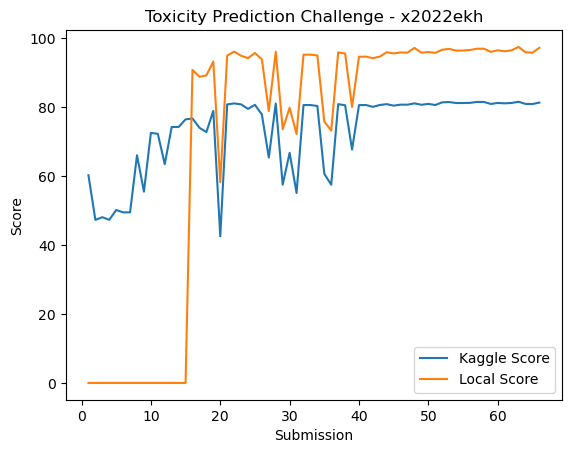

In [343]:
import matplotlib.pyplot as plt
import pandas as pd

plot = pd.read_csv("./monisha_scores.csv")

# score = [60, 47, 48, 47, 50, 49, 49, 65, 55, 72, 72, 63, 74, 74, 76, 76, 73, 72, 78, 42, 80, 81, 80, 79, 80, 77, 65, 80, 57, 66, 55, 80, 80, 80, 60, 57, 80, 80]
# submission = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
# f1score = []

plt.plot(plot["Submission"], plot["Score"].iloc[::-1], label='Kaggle Score')
plt.plot(plot["Submission"], plot["F1Score-f"].iloc[::-1], label='Local Score')

plt.xlabel('Submission')
plt.ylabel('Score')
# plt.legend(['Accuracy'])
# plt.legend(['F1 Score'])
plt.legend()

plt.title("Toxicity Prediction Challenge - x2022ekh")
plt.savefig('toxicityChallenge_x2022ekh.png')
plt.show()
